# Predicting crop yield from environmental factors

## Research question

"Can crop yields be predicted with environmental factors like rainfall, soil type or fertilization"

## Dataset

https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield?resource=download

## Visualizations

In this section the dataset is loaded into a dataframe to visualize the data and possible correlations between attributes

In [1]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("./dataset-2/yield_df.csv")

# Display dataset info
df.info()

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


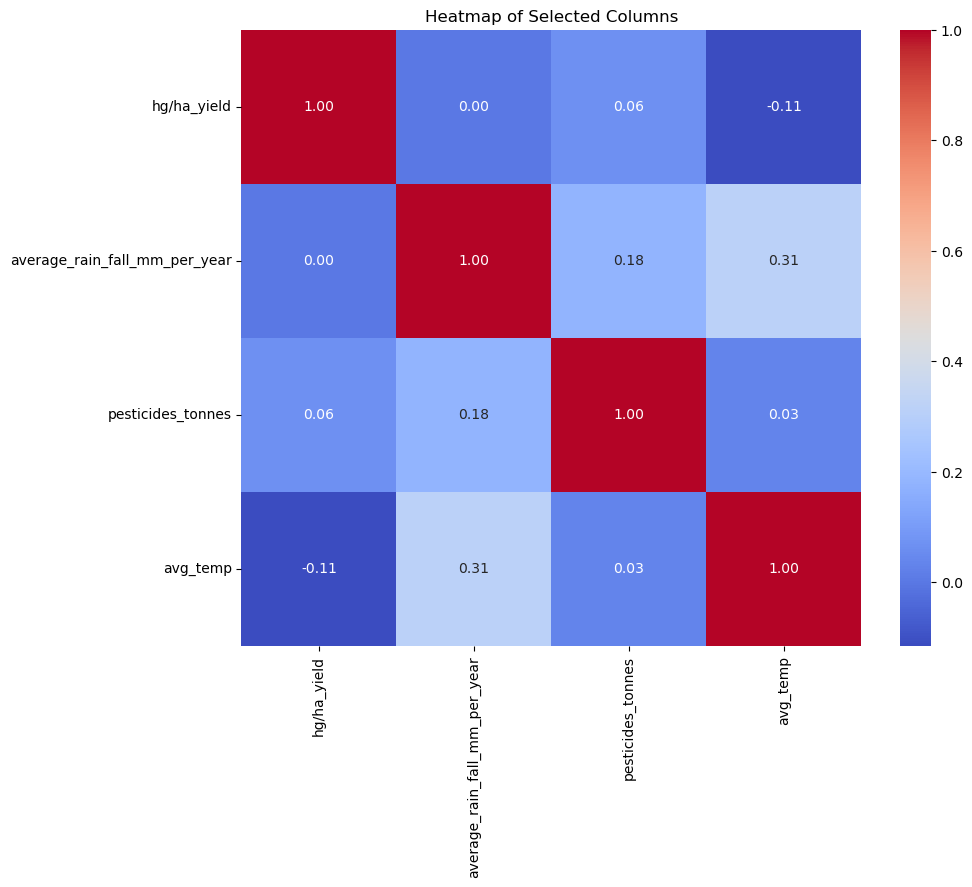

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude columns 0, 1, 2, and 3 by their index
df_subset = df.iloc[:, 4:]

# Calculate the correlation matrix for the subset of the data
correlation_matrix = df_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap of Selected Columns")
plt.show()


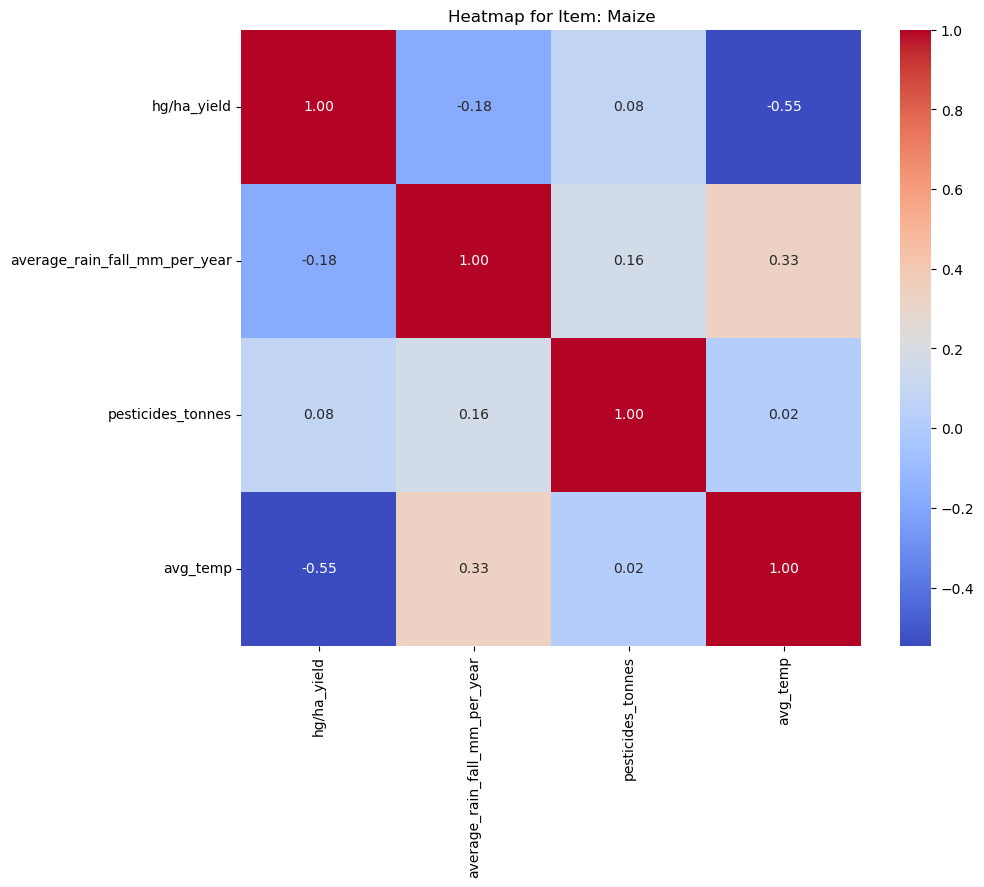

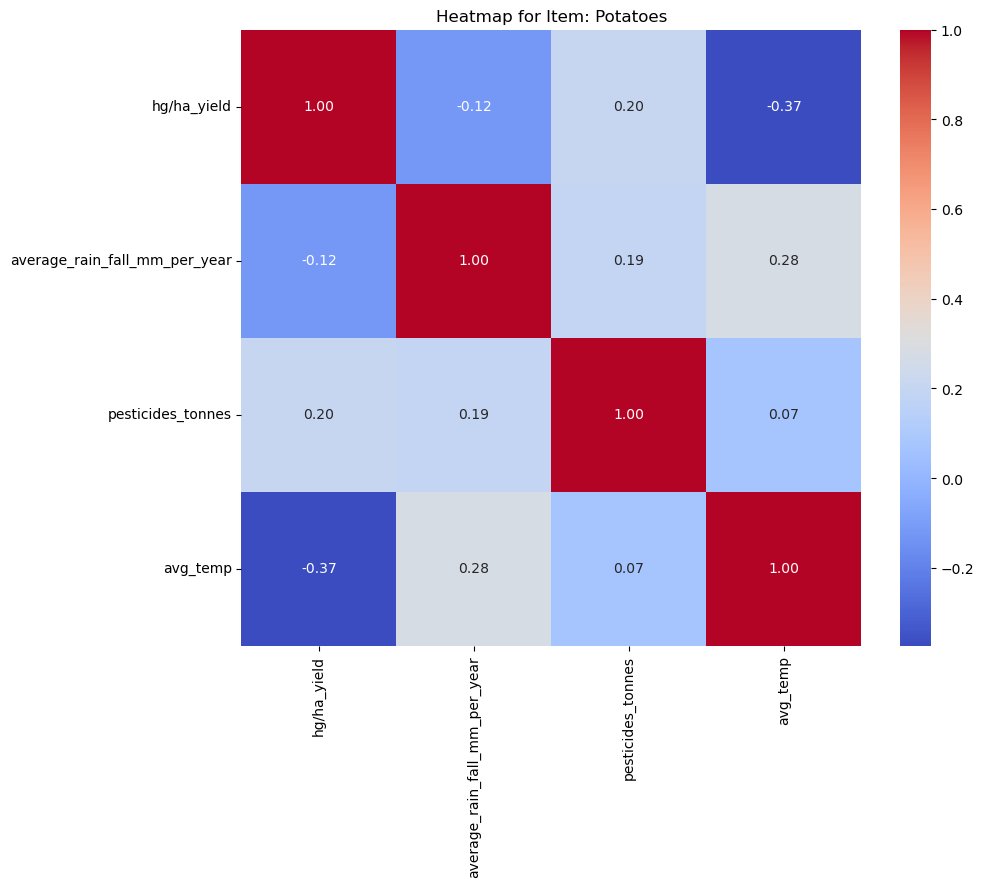

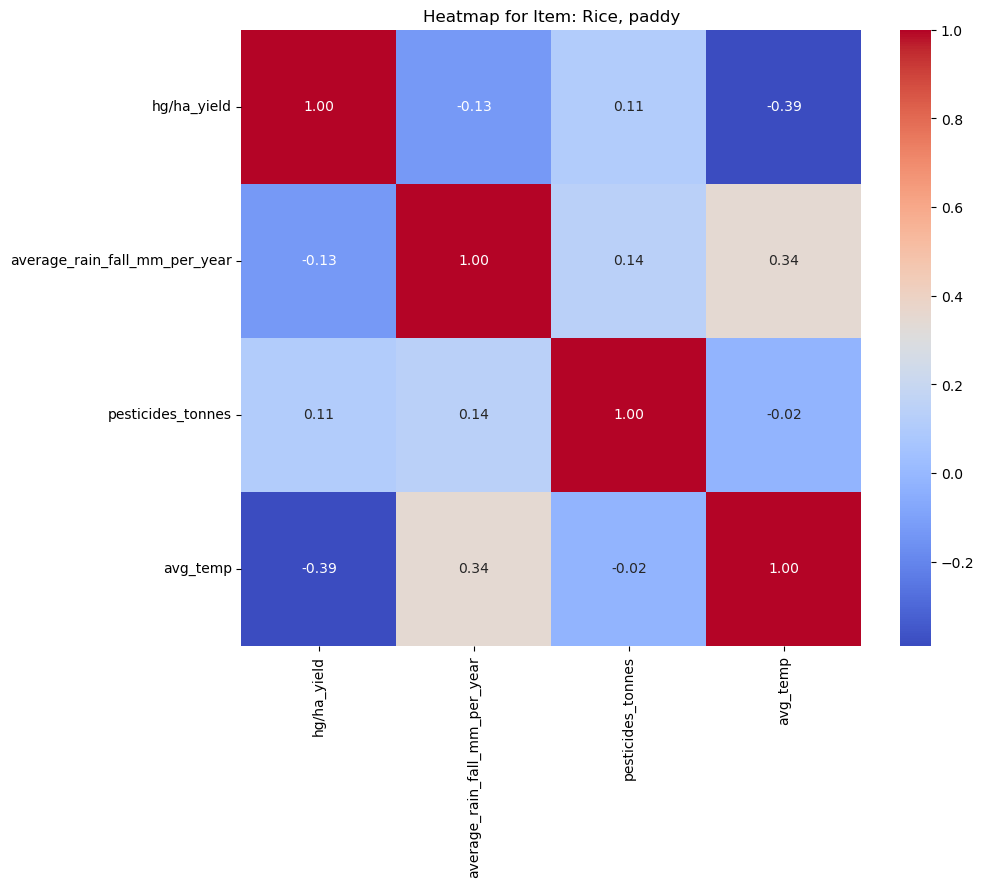

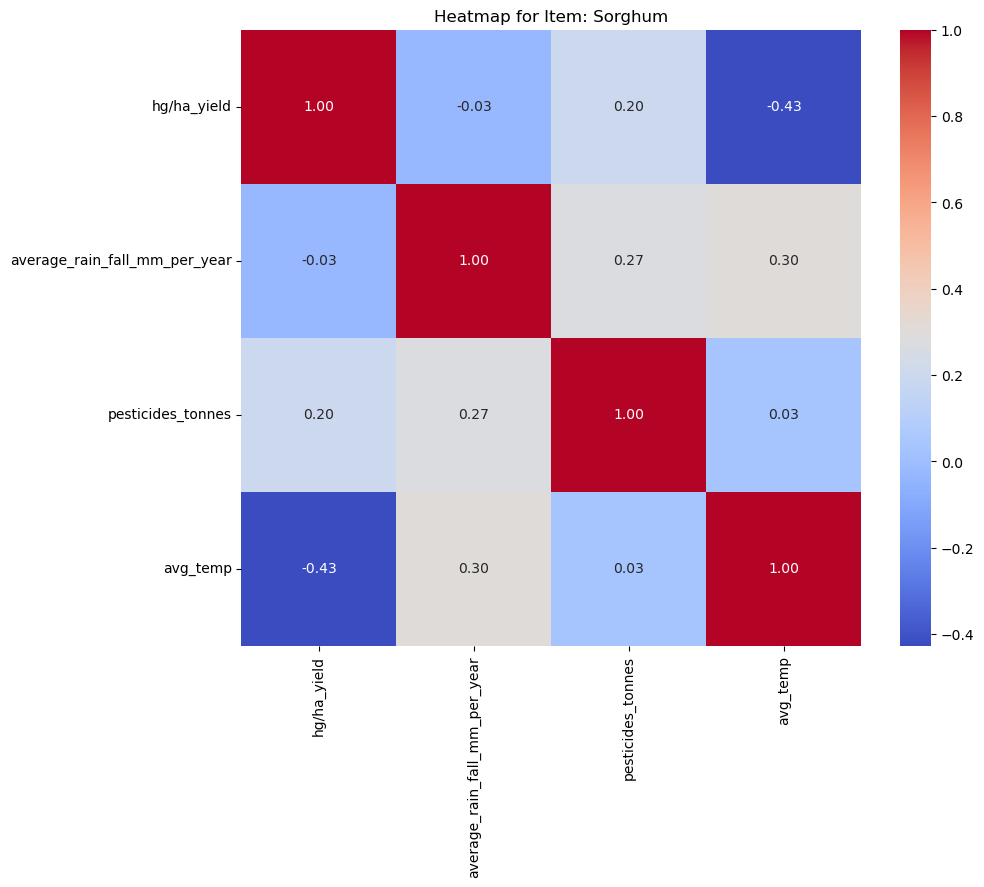

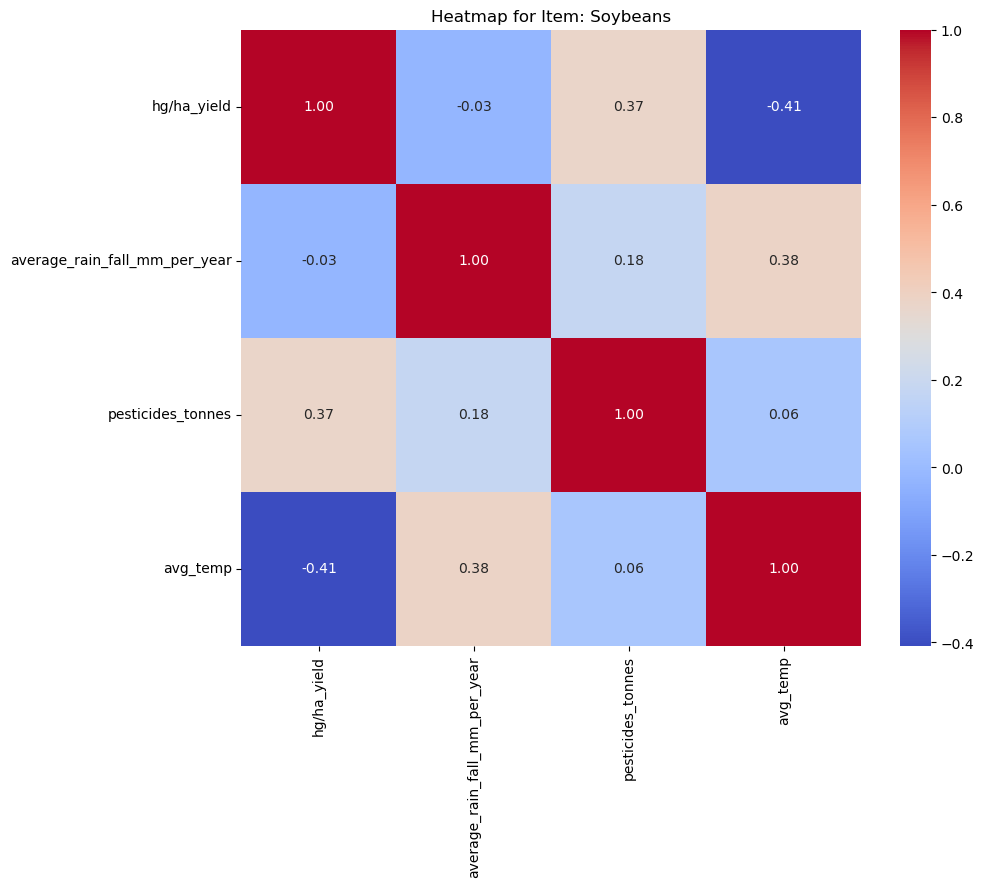

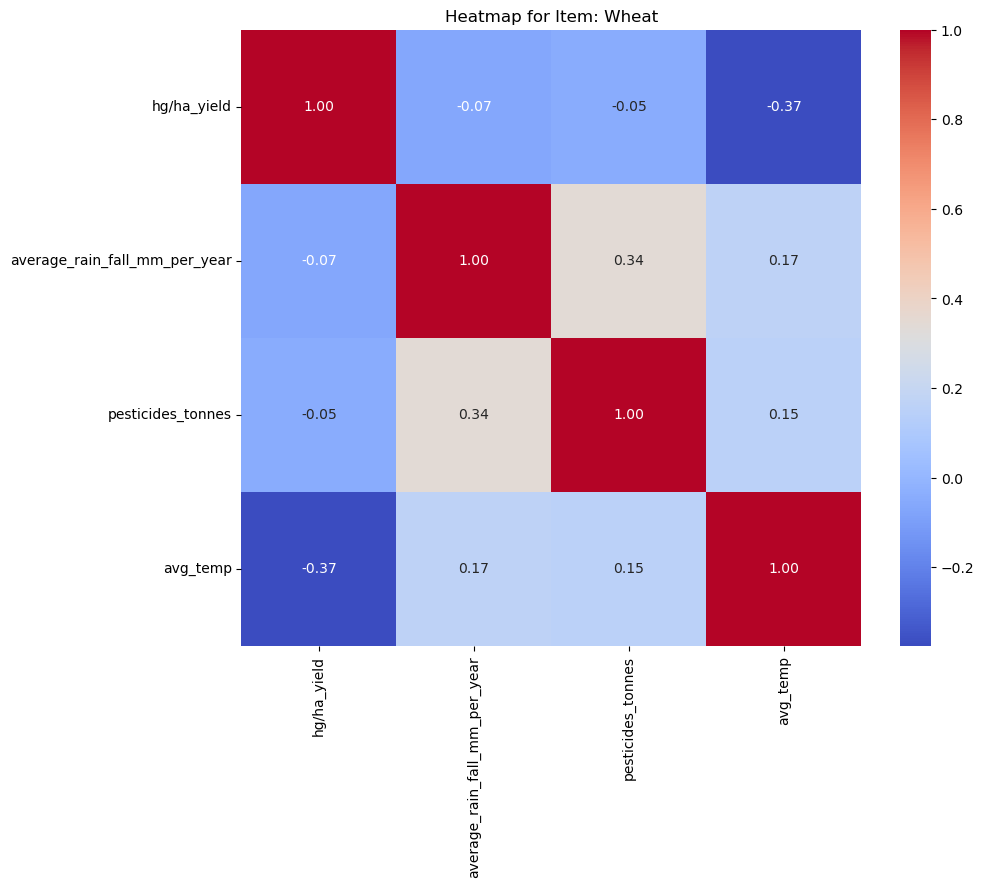

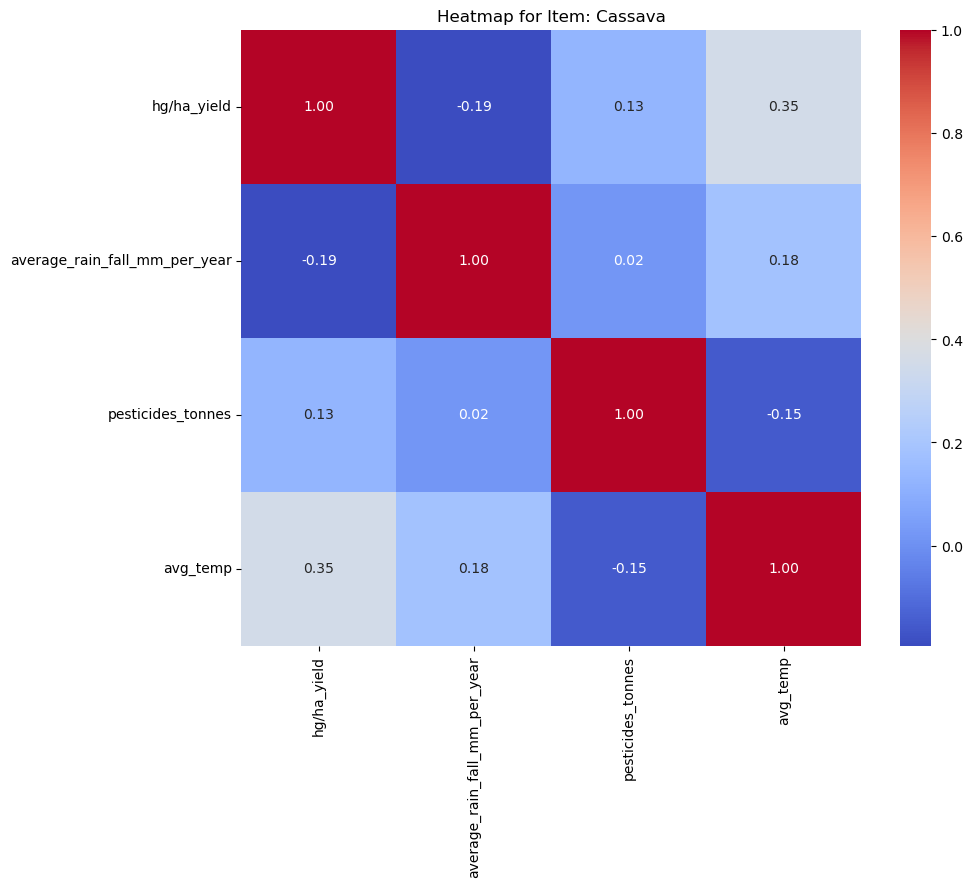

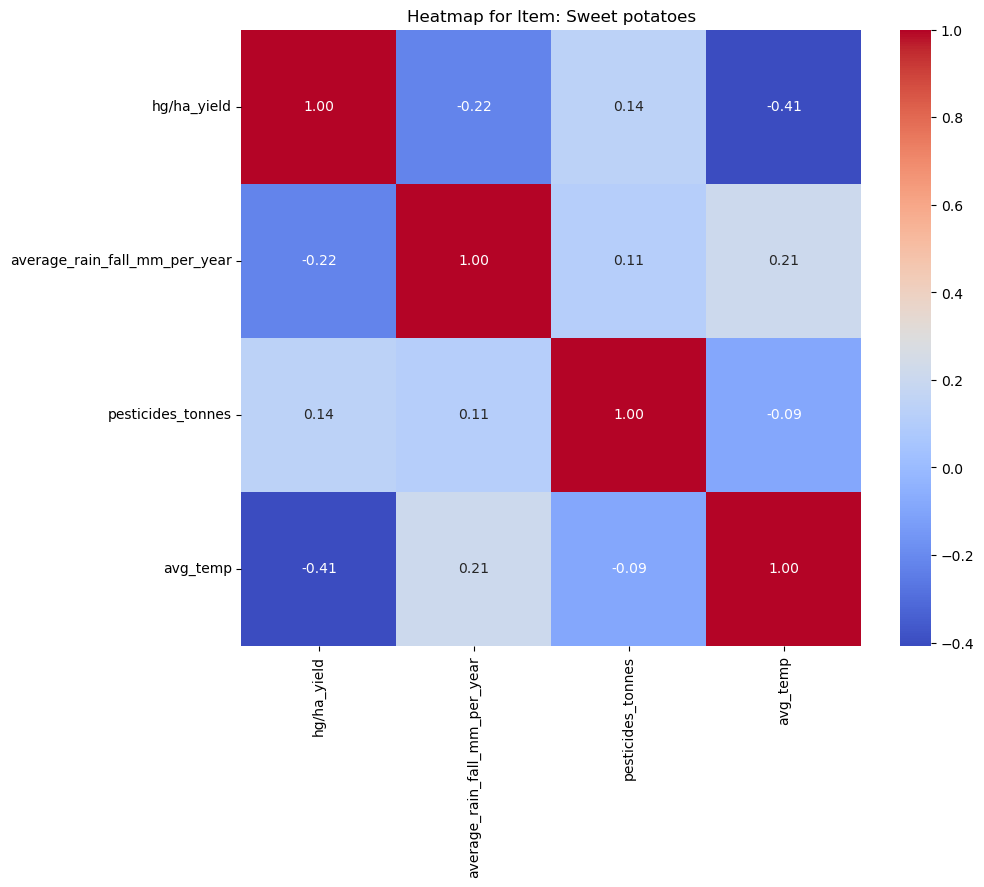

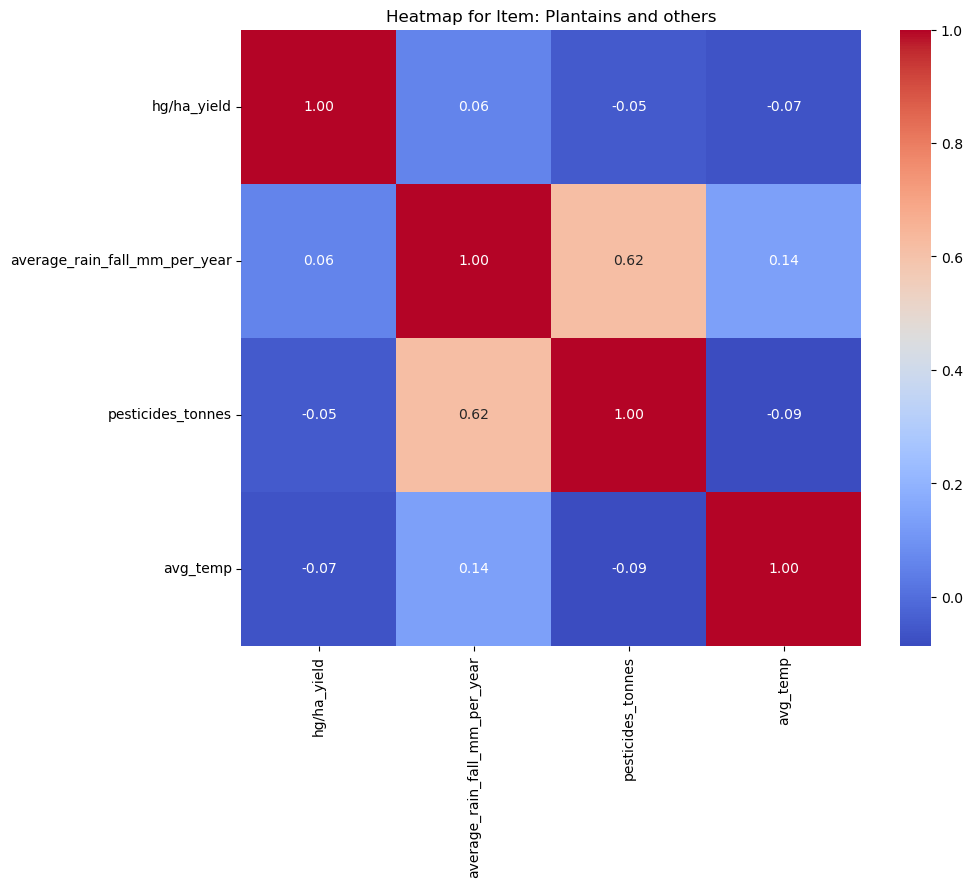

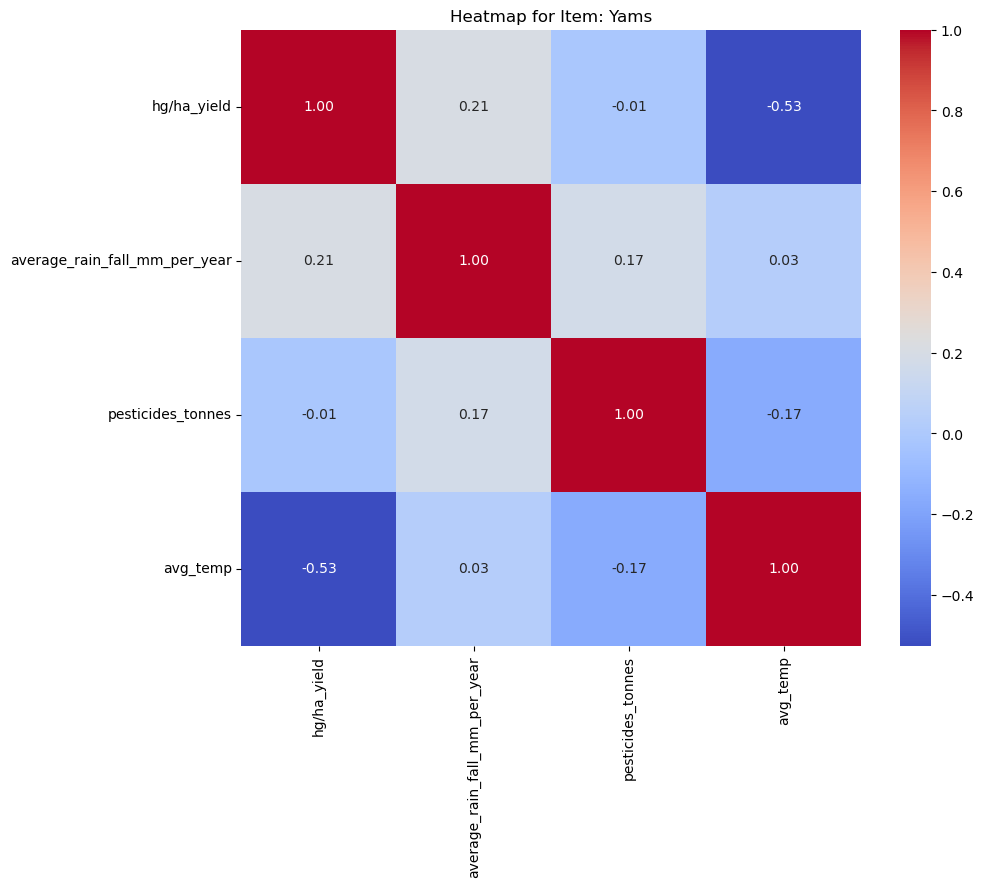

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each unique item in the 'Item' column
for item in df['Item'].unique():
    # Filter the dataframe for the current item
    df_item = df[df['Item'] == item].iloc[:, 4:]
    
    # Calculate the correlation matrix for the subset of the data
    correlation_matrix = df_item.corr()
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f"Heatmap for Item: {item}")
    plt.show()


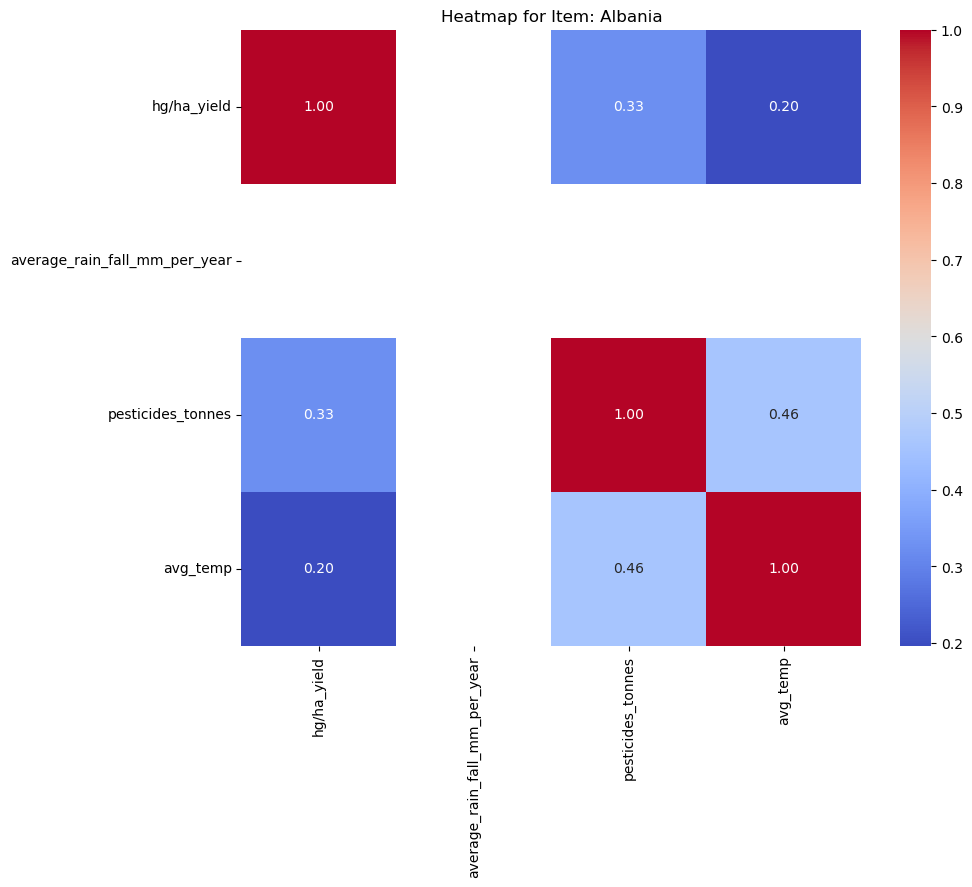

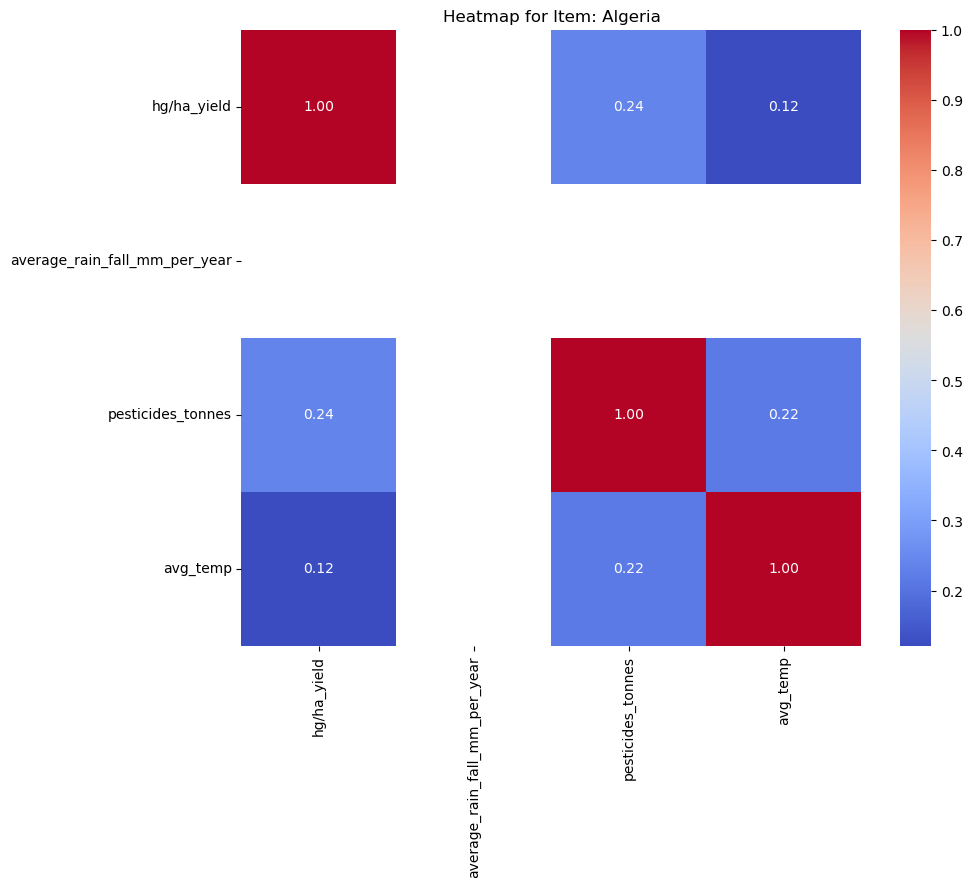

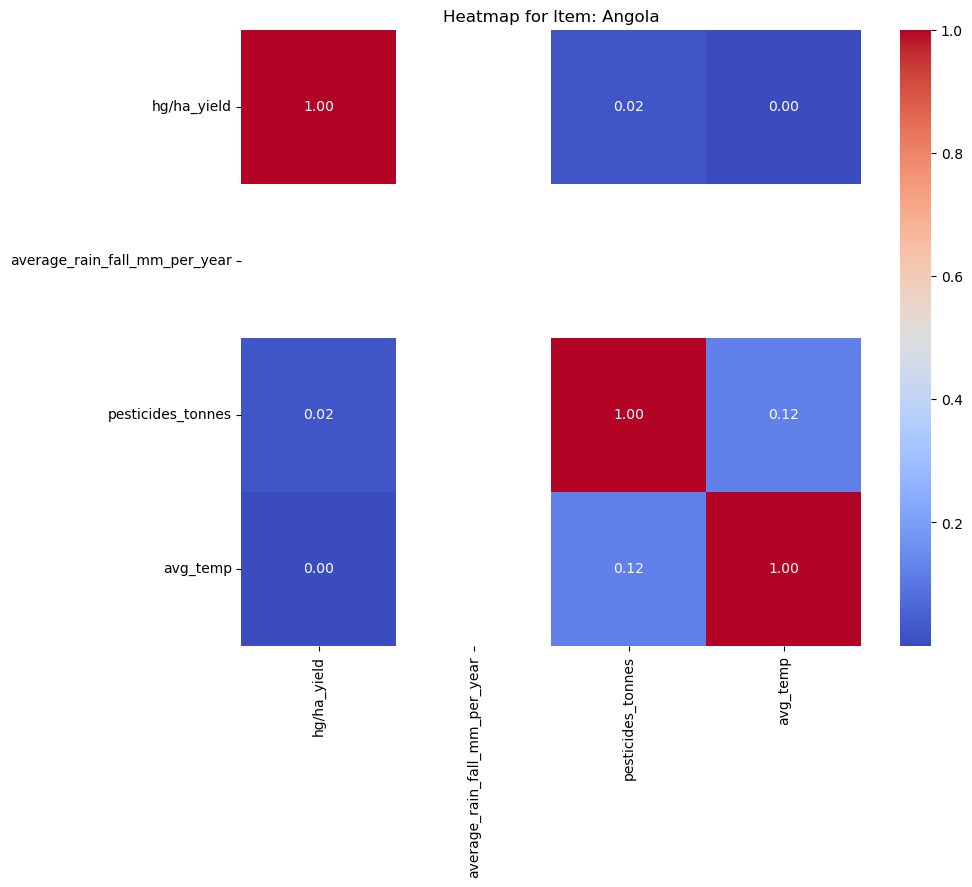

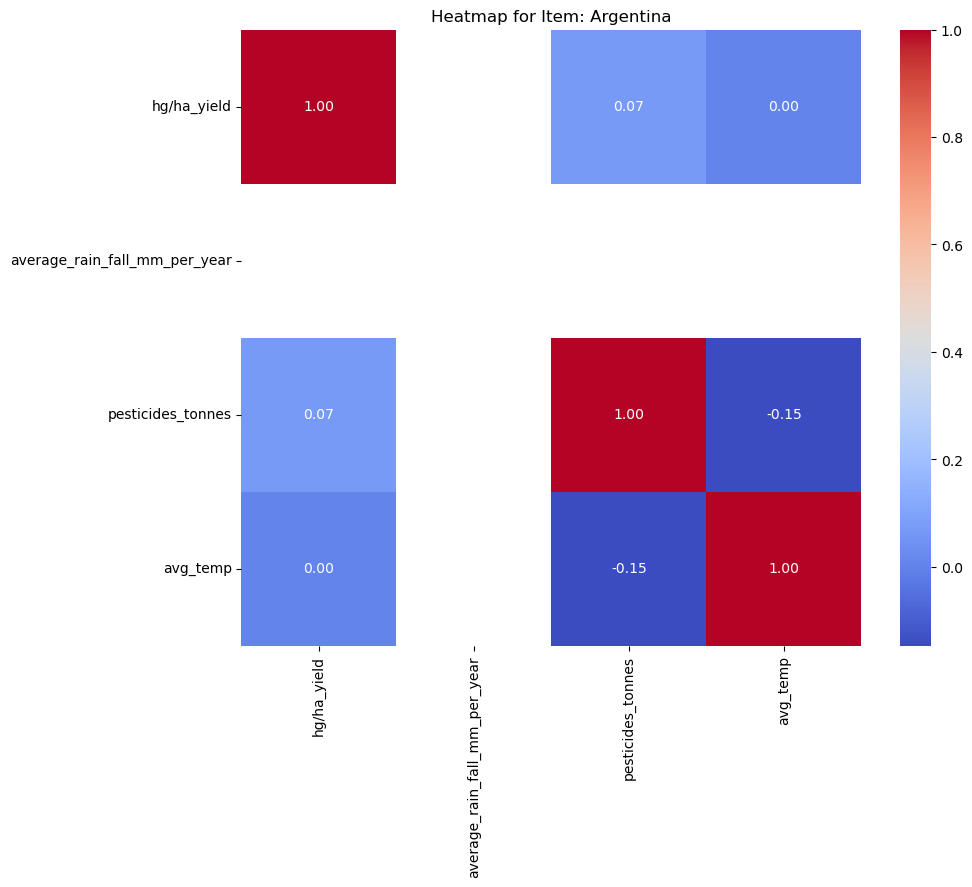

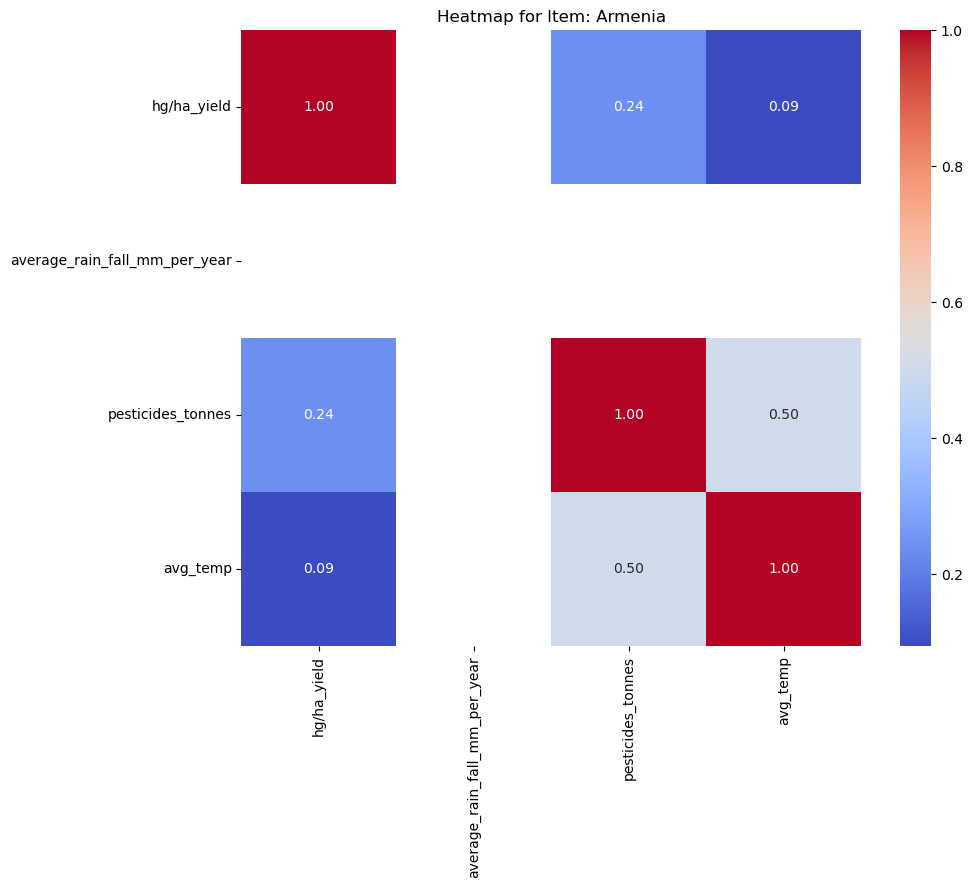

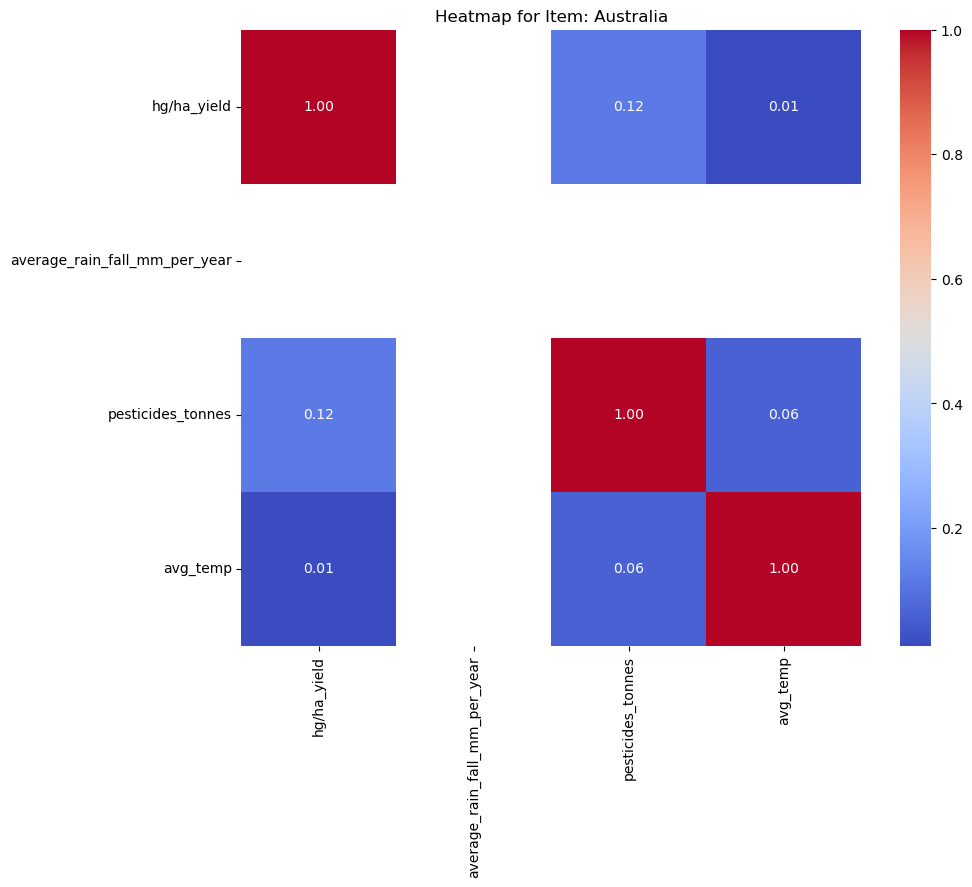

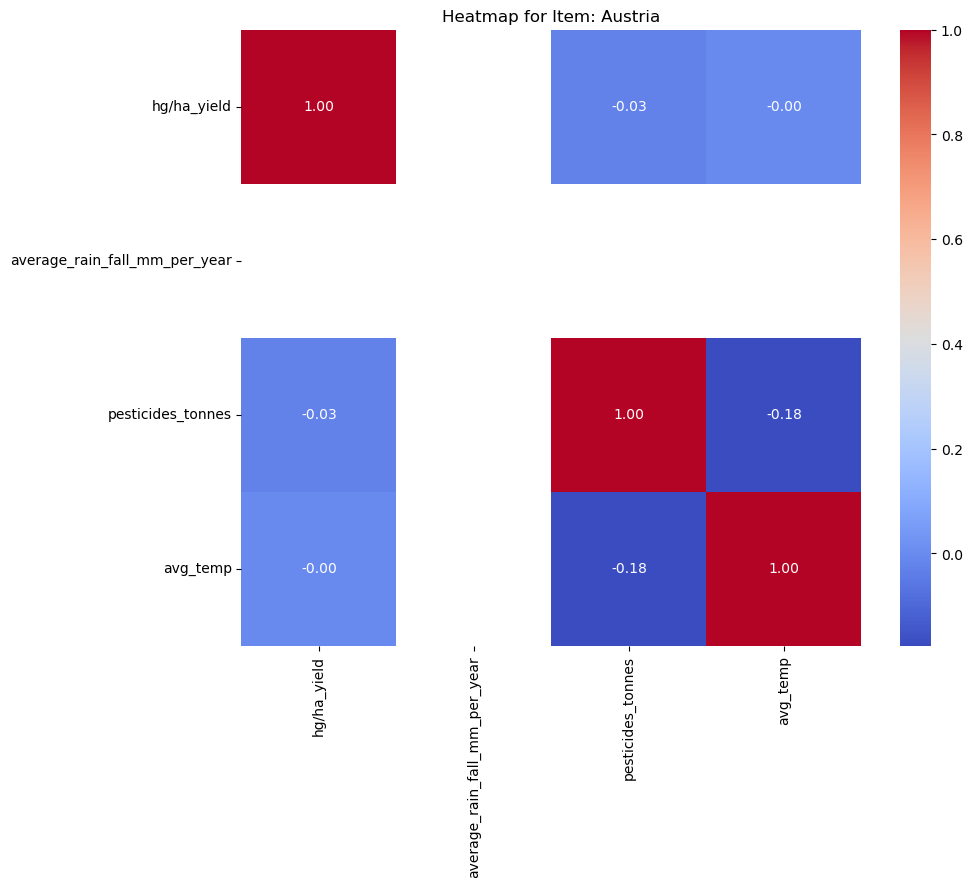

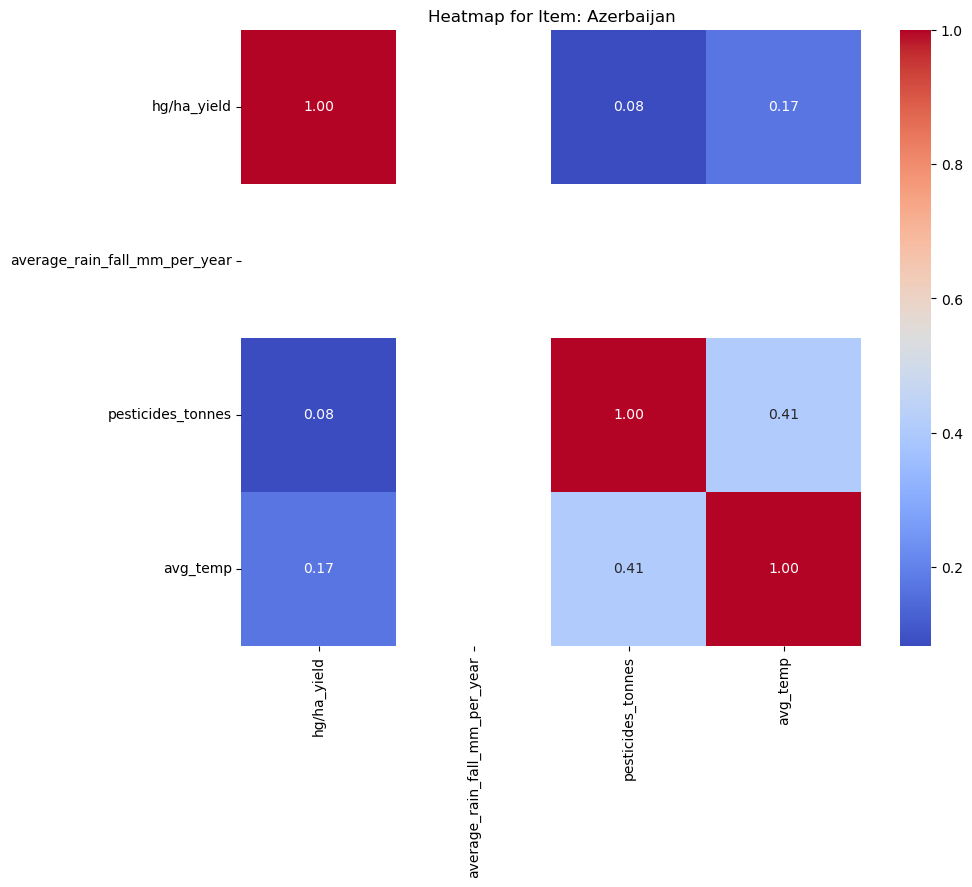

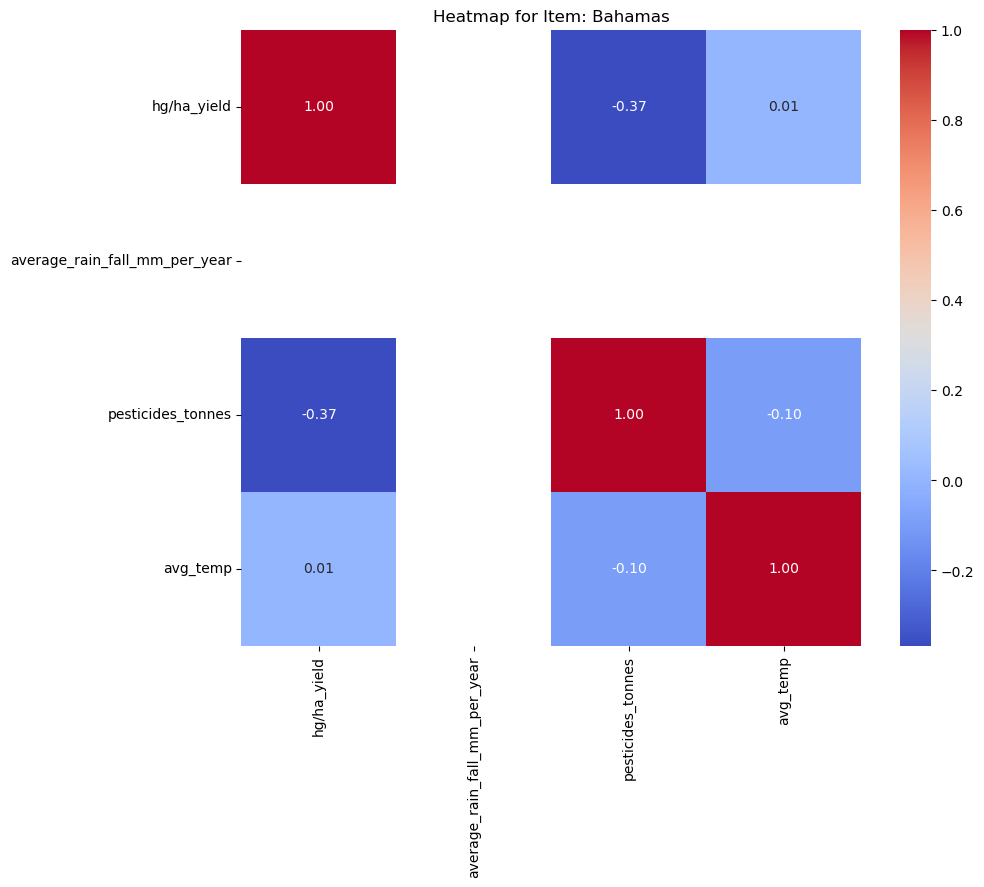

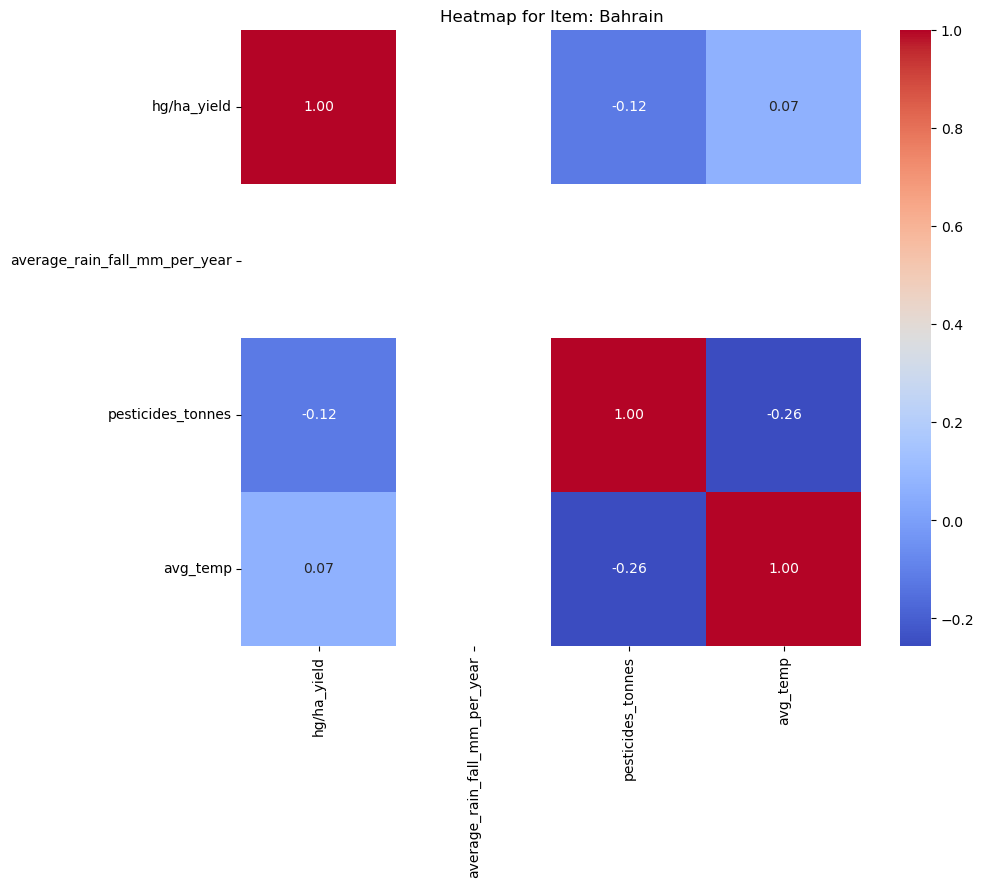

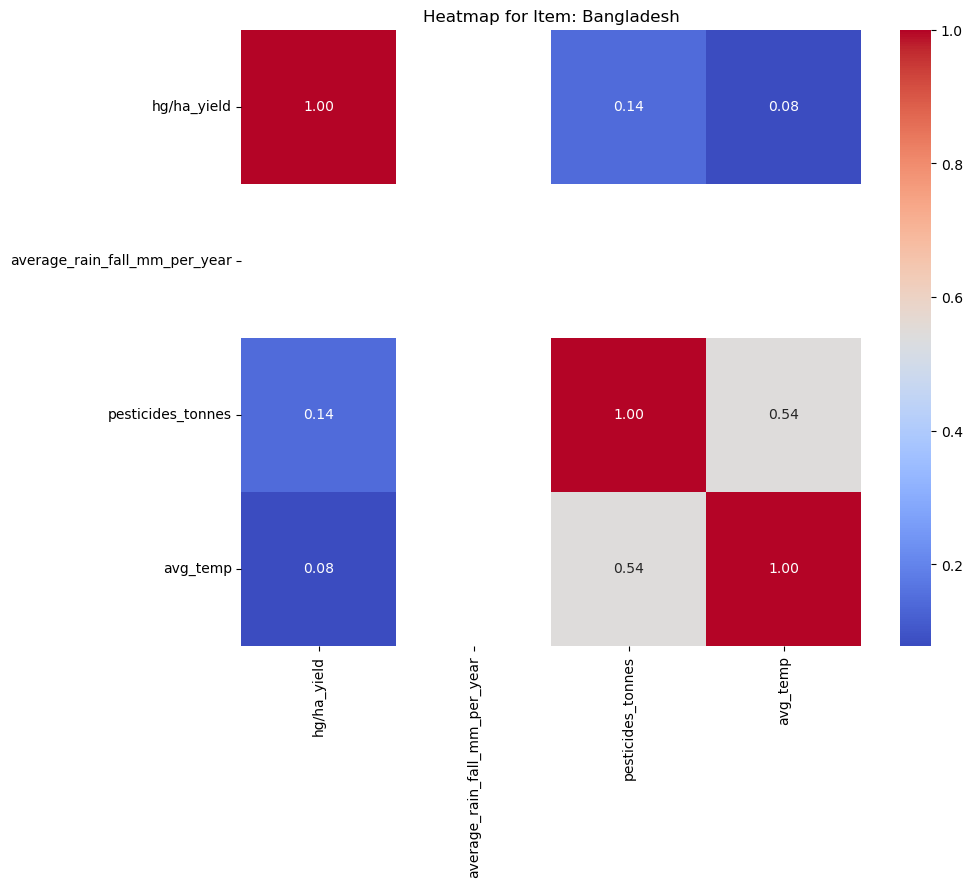

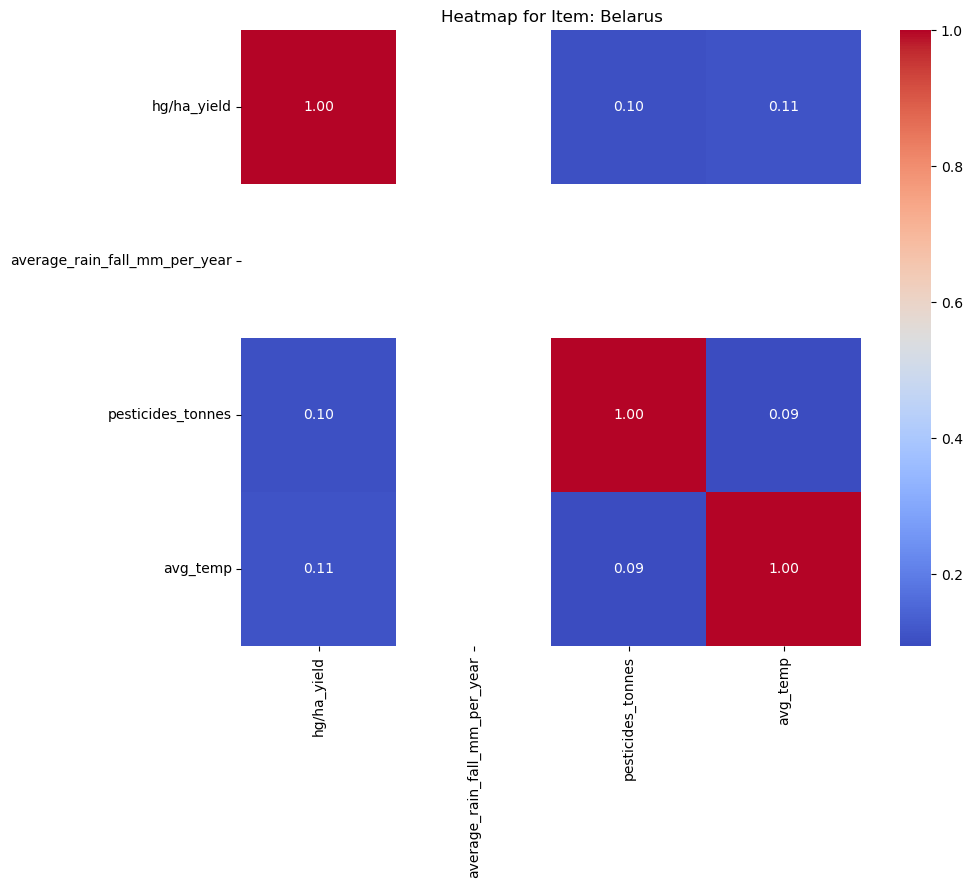

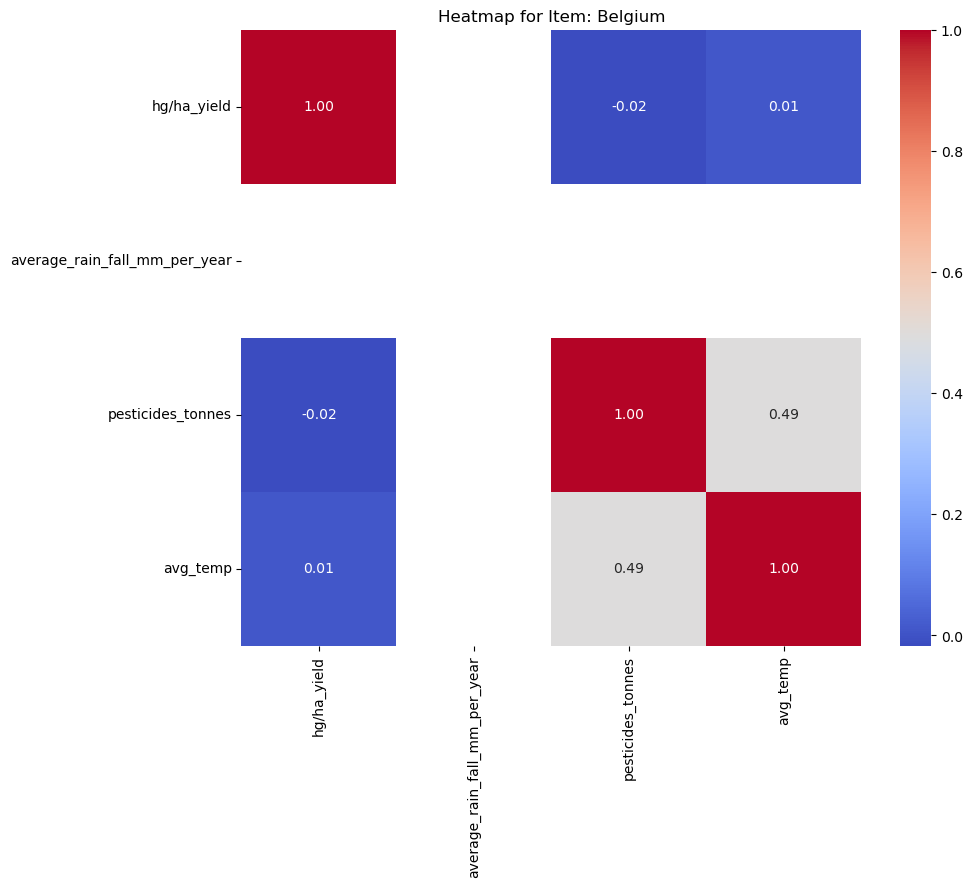

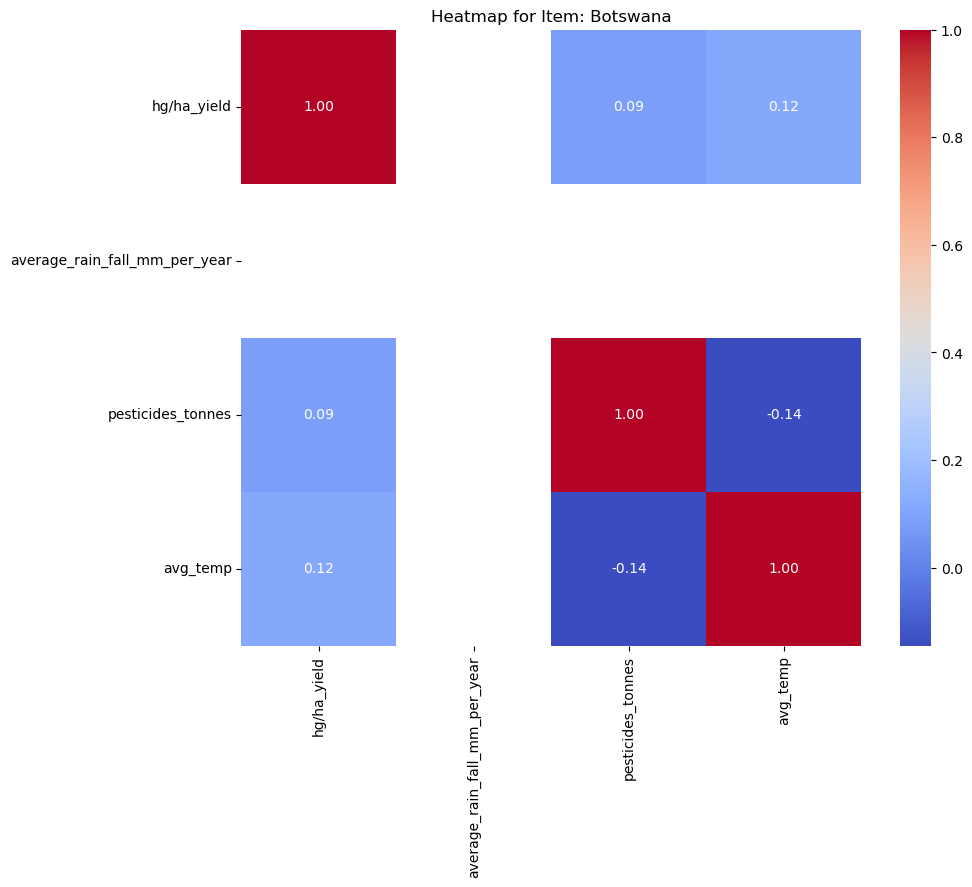

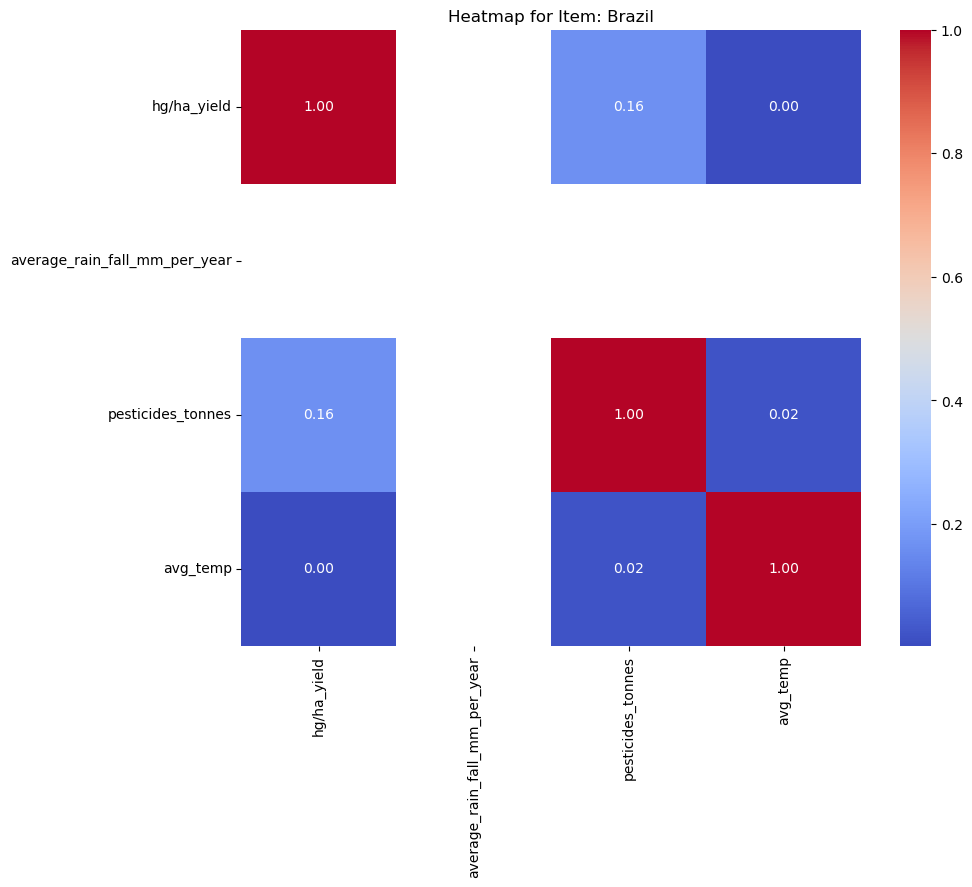

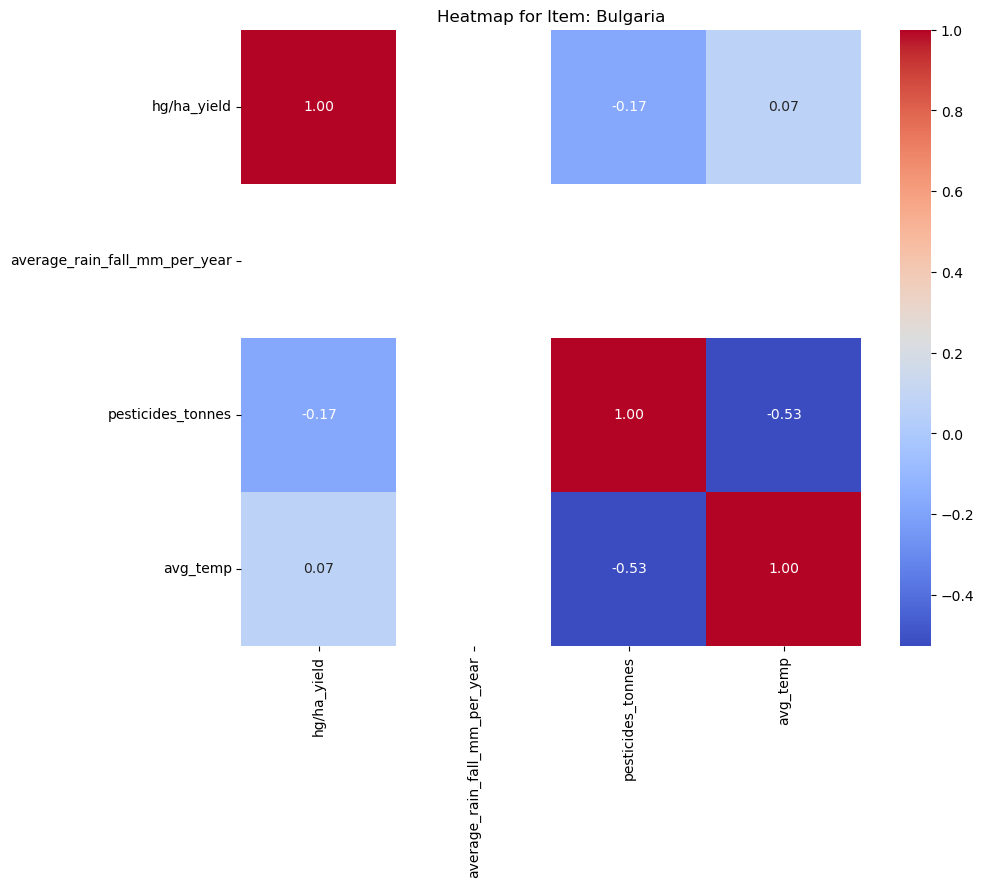

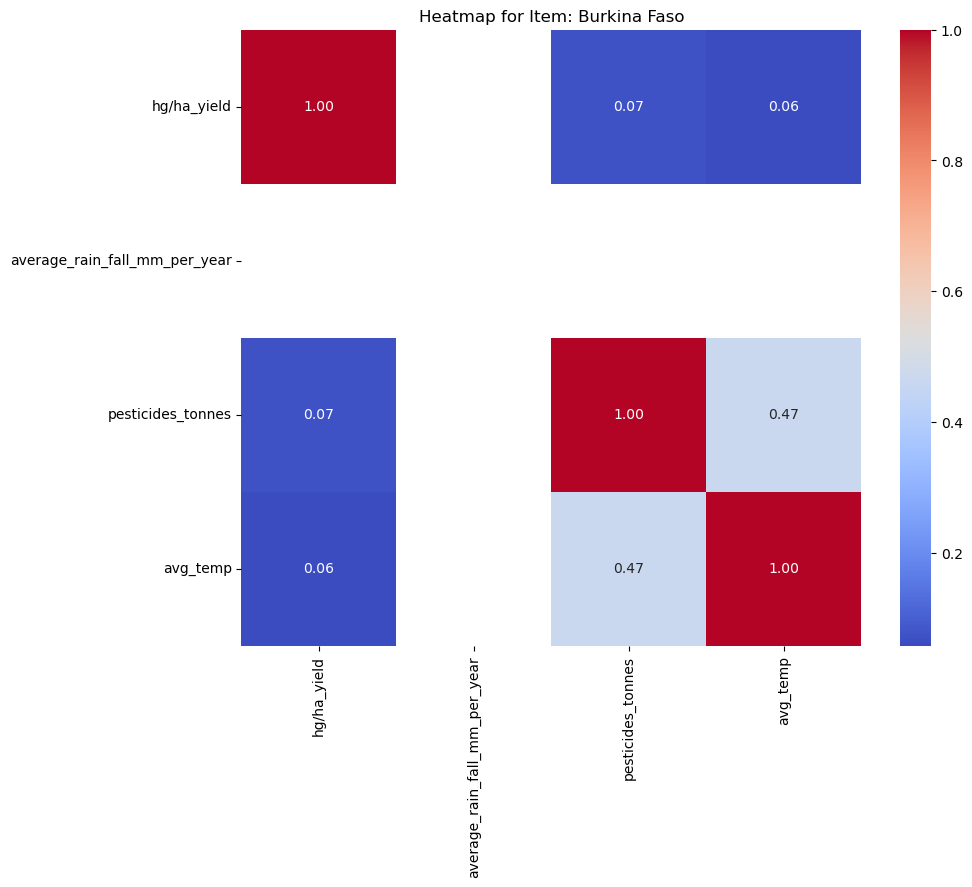

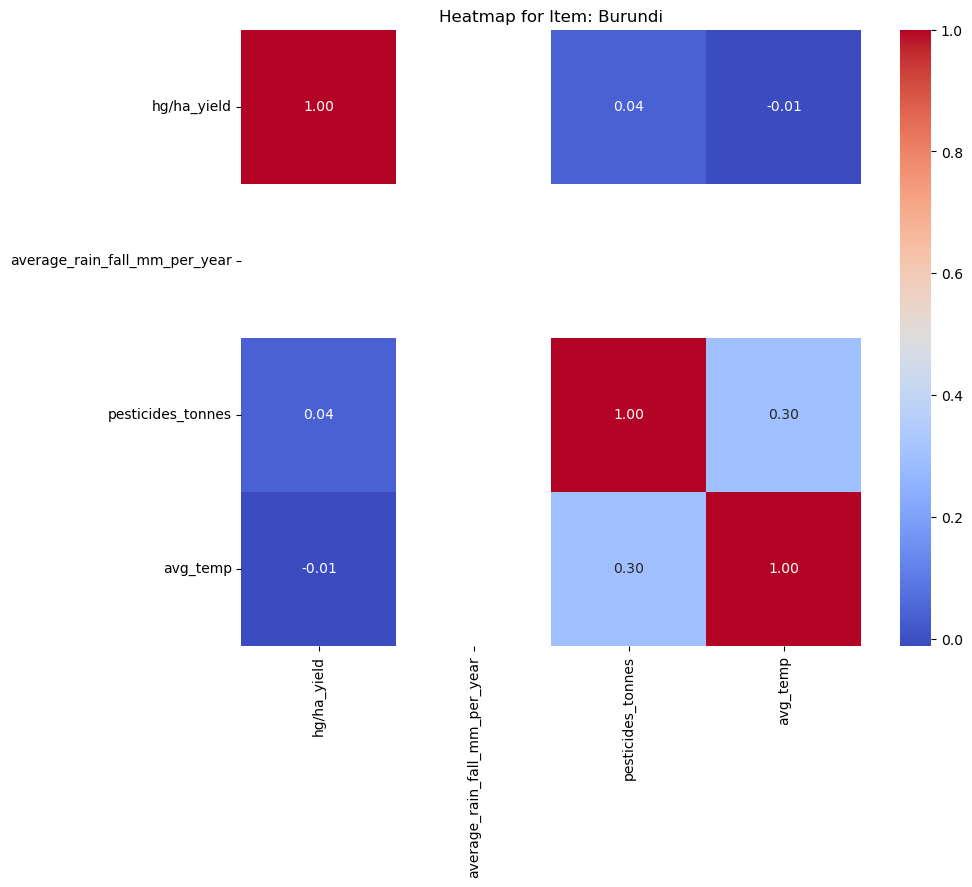

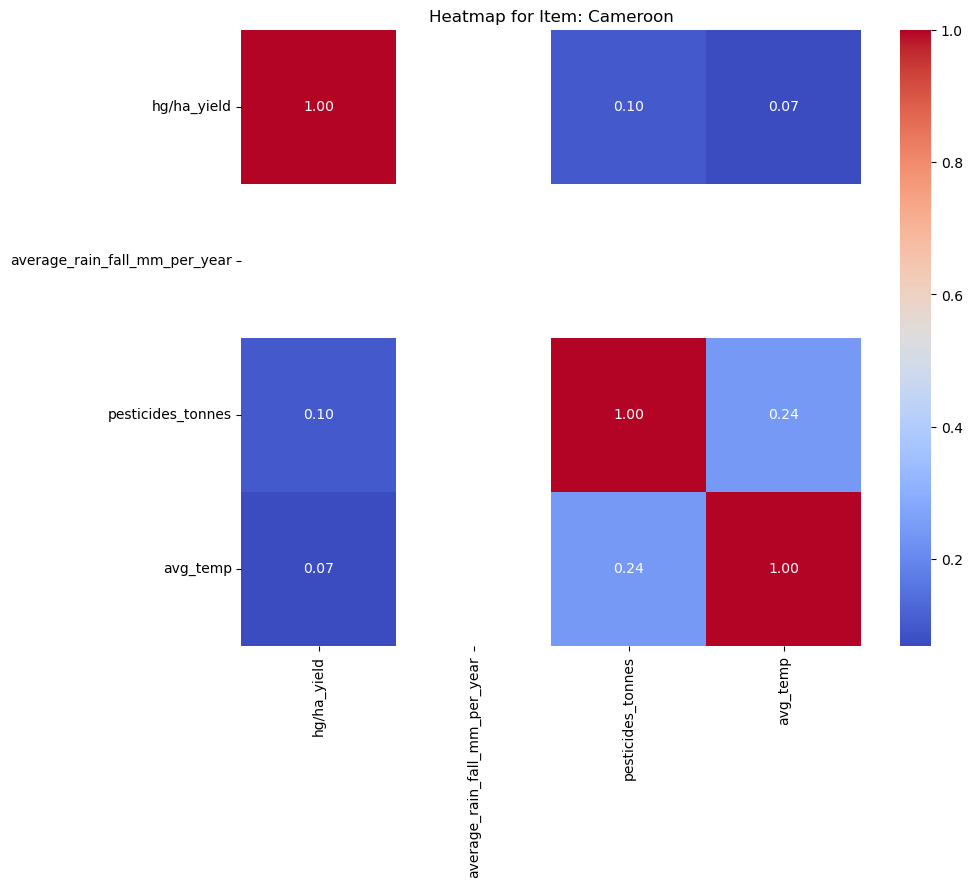

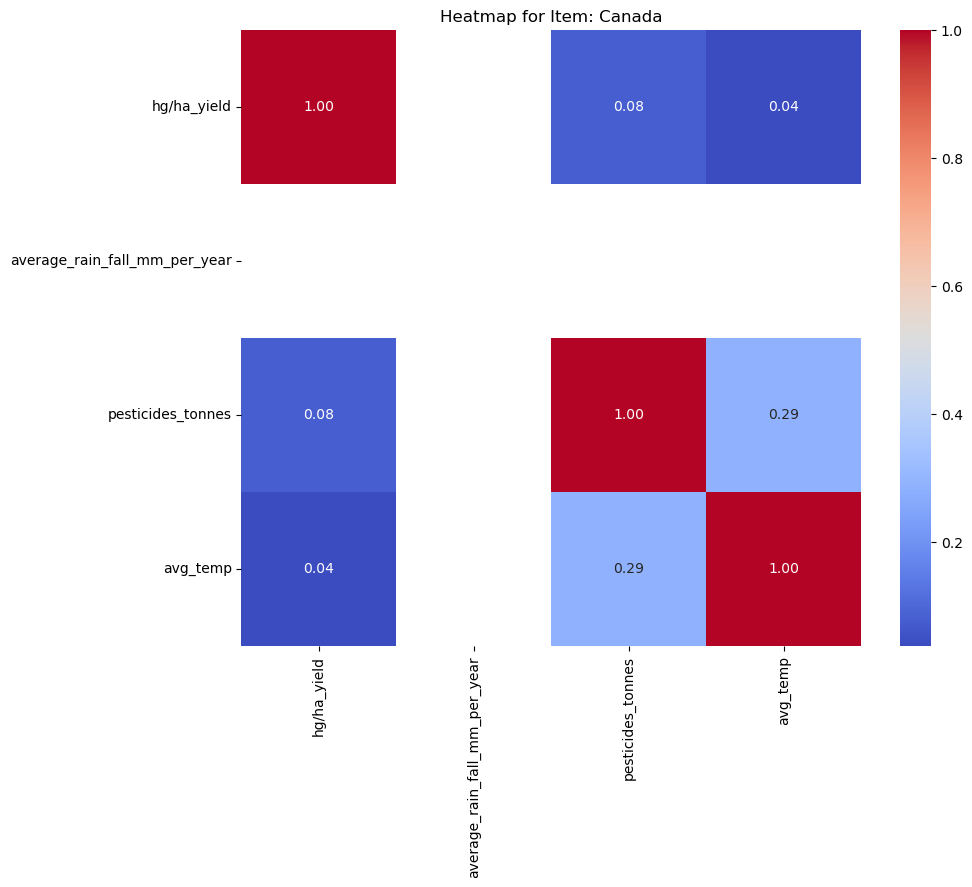

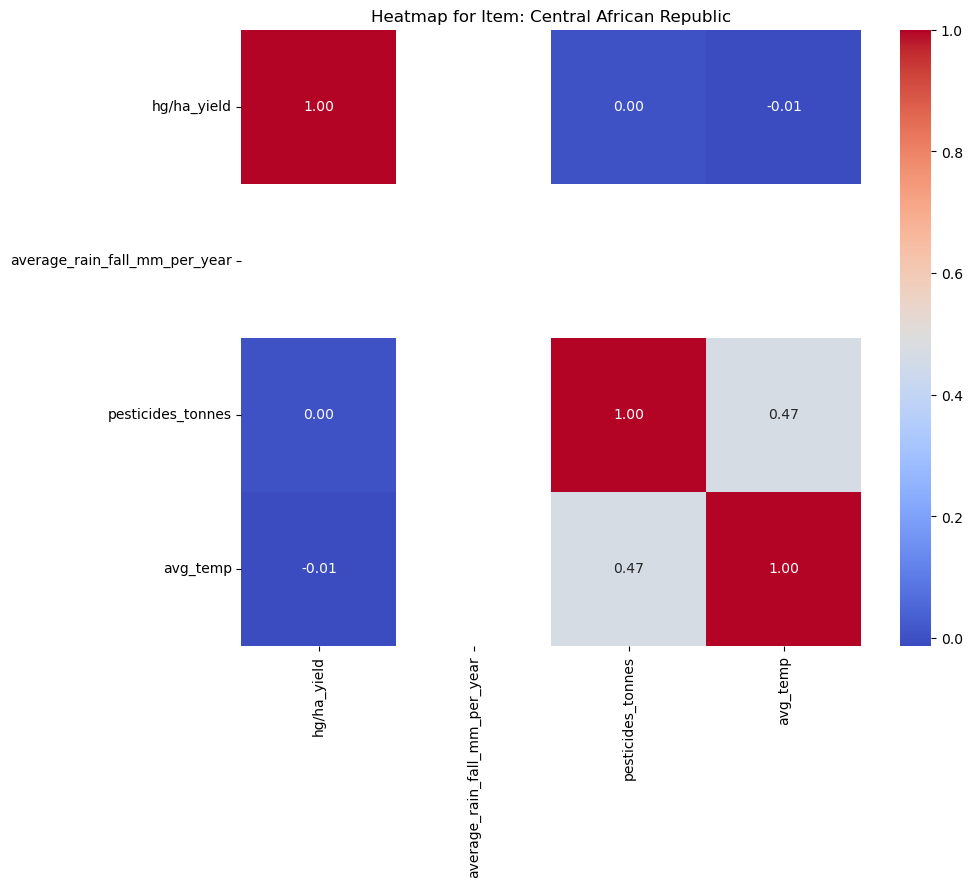

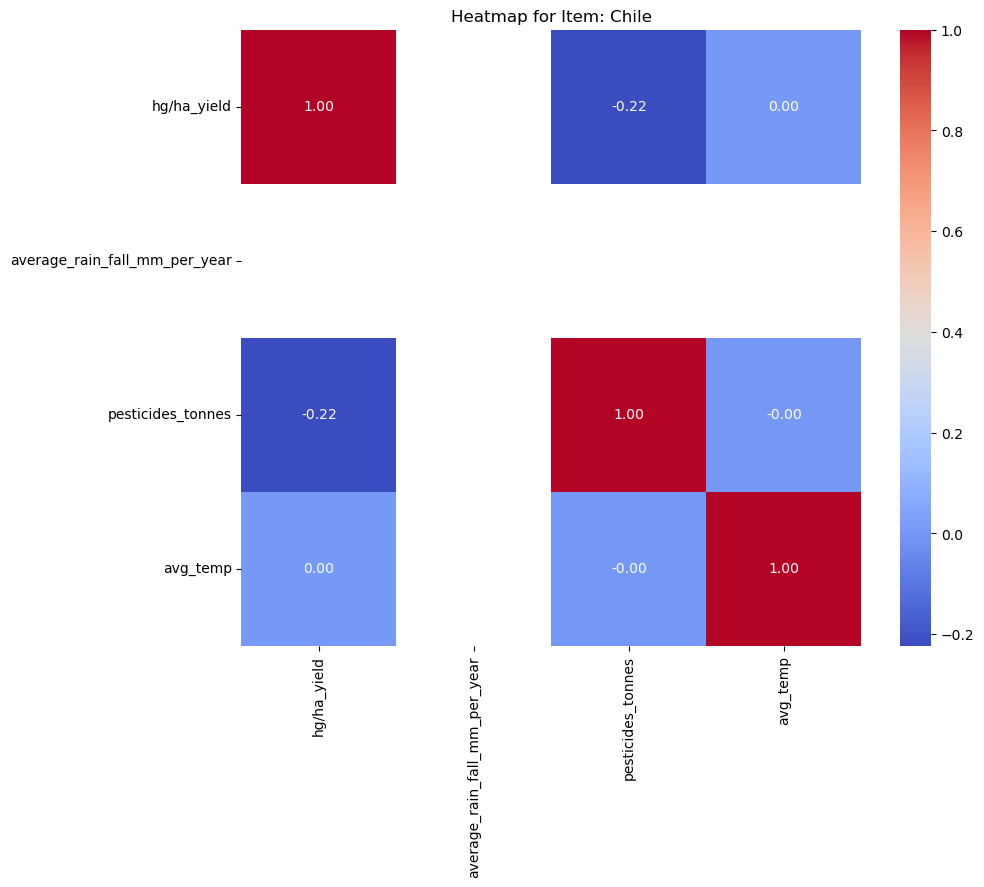

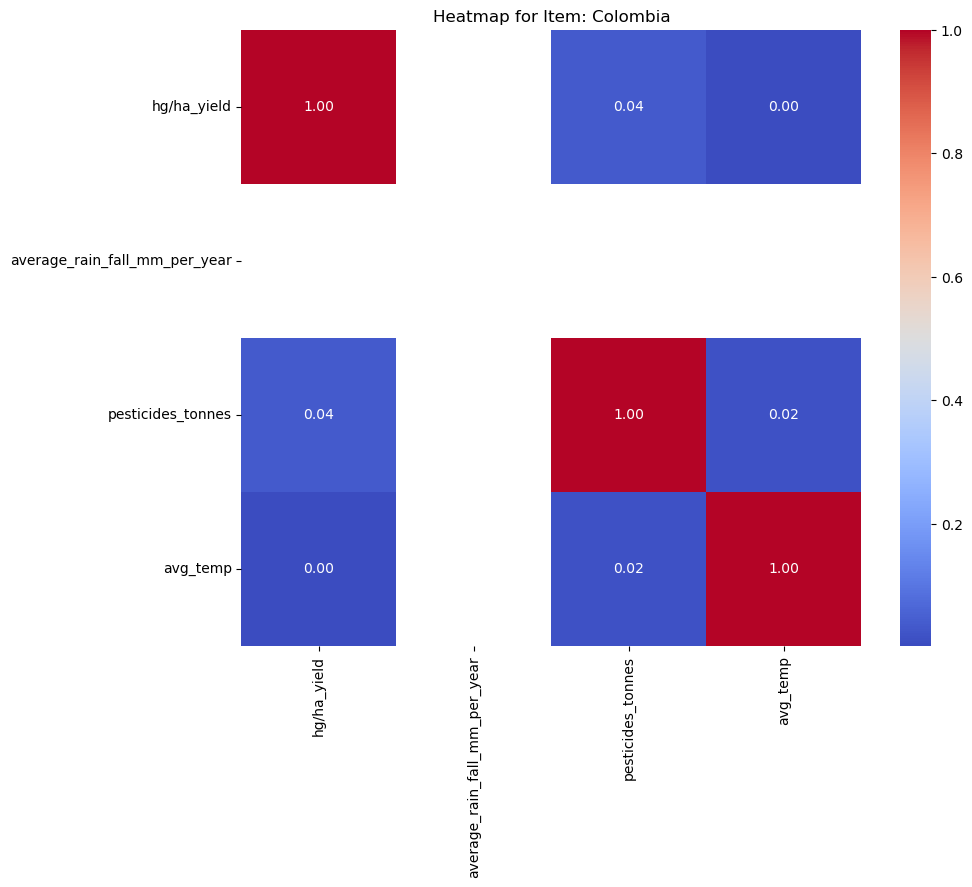

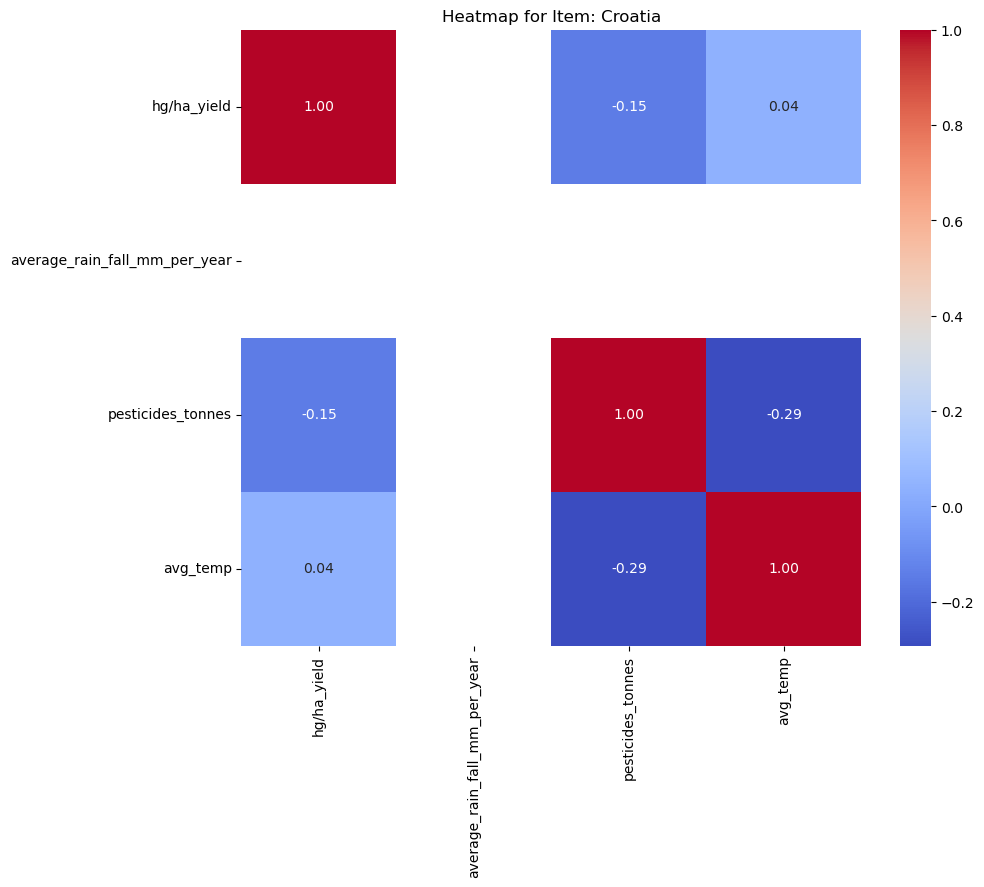

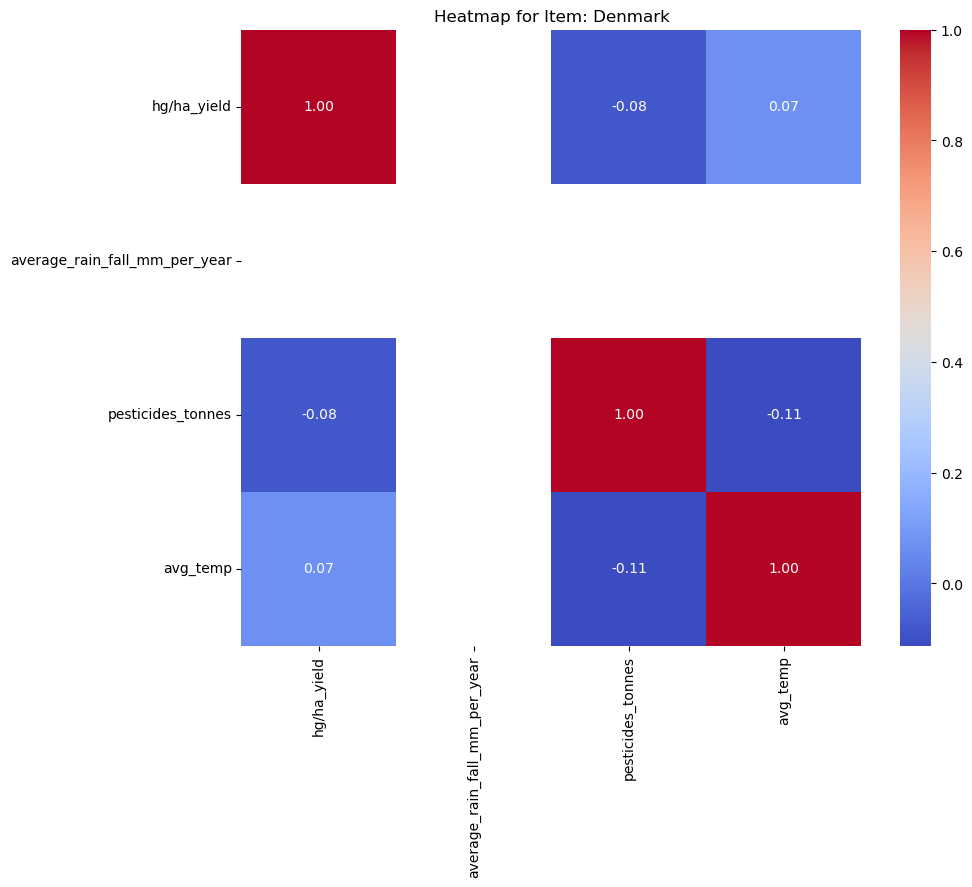

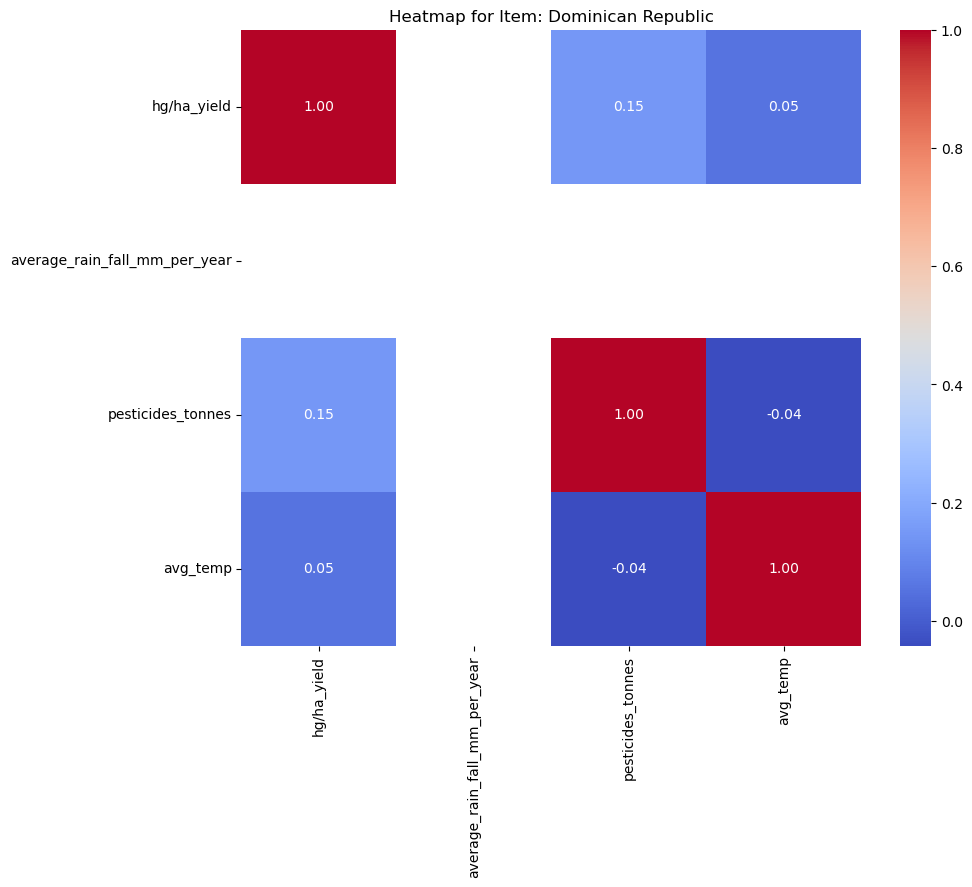

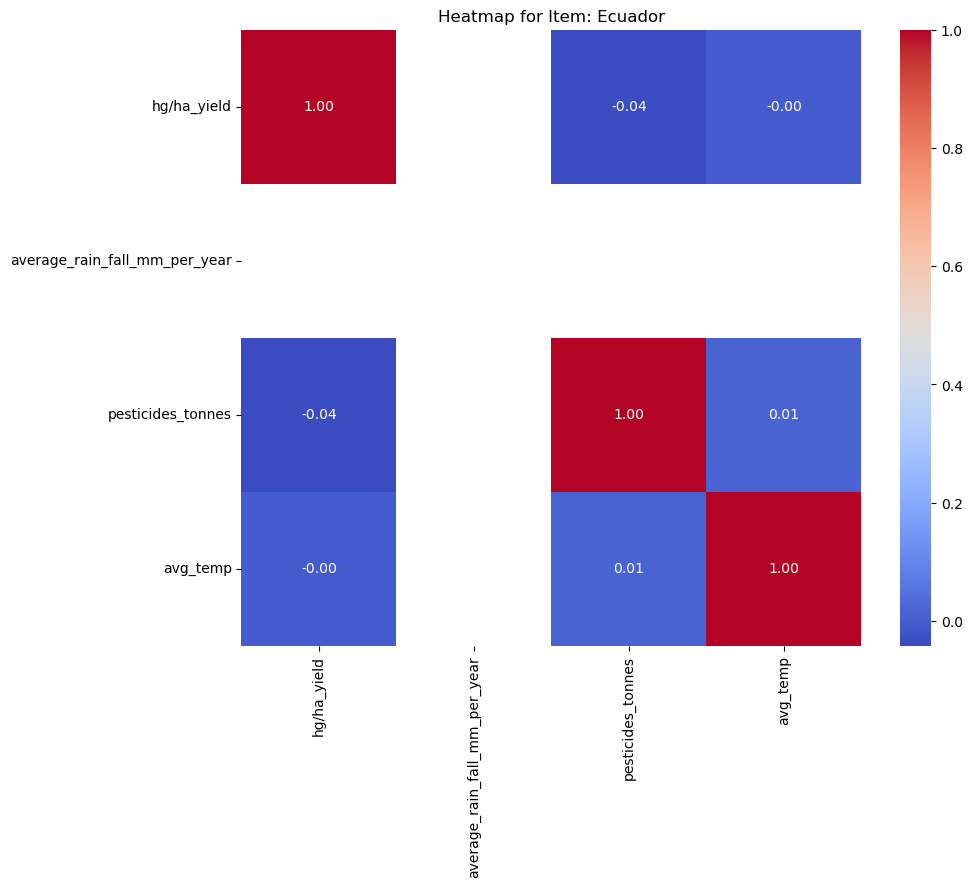

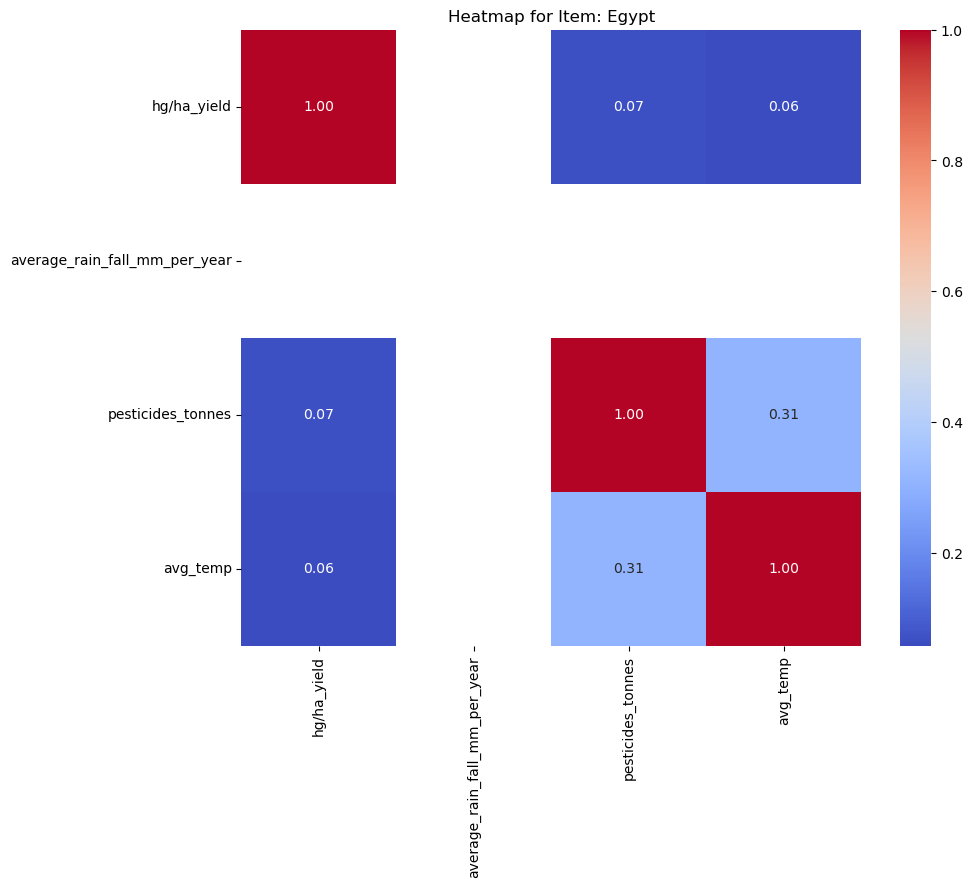

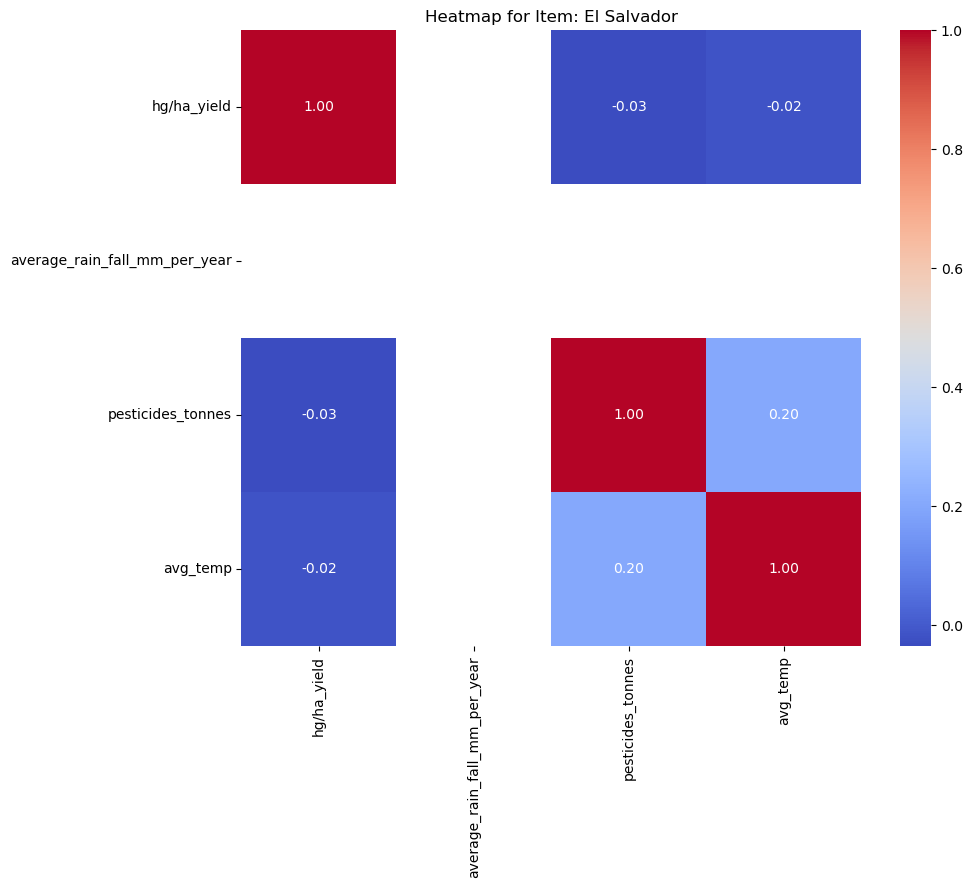

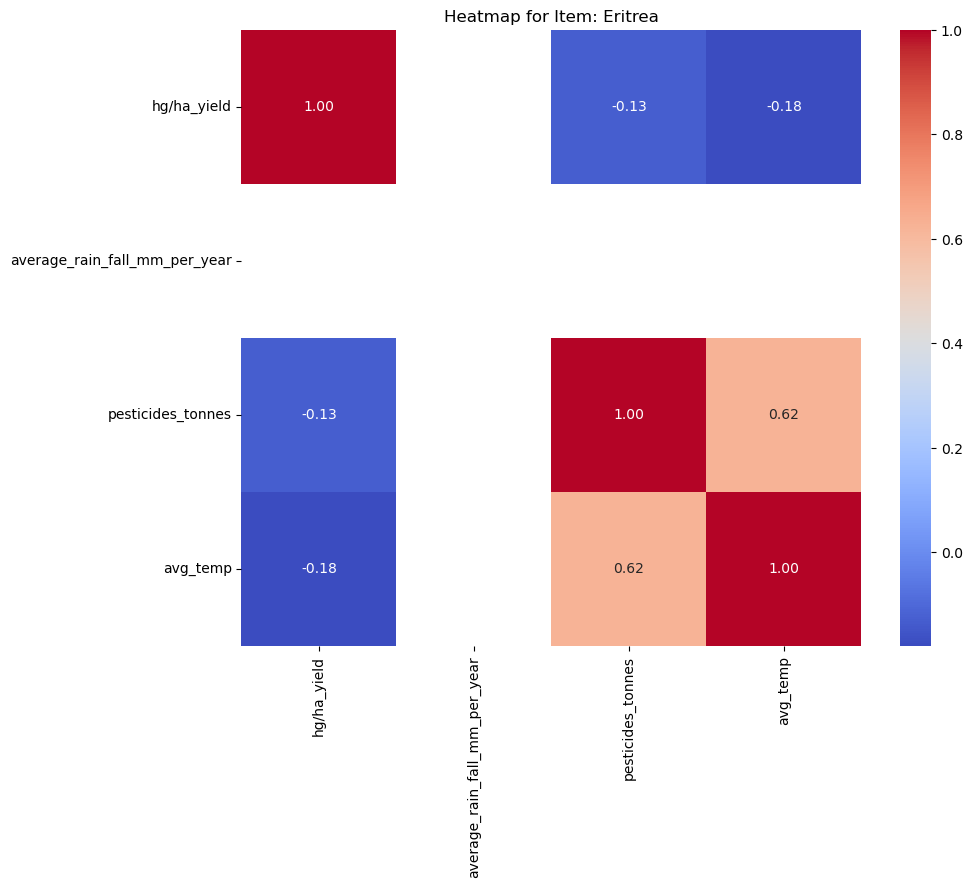

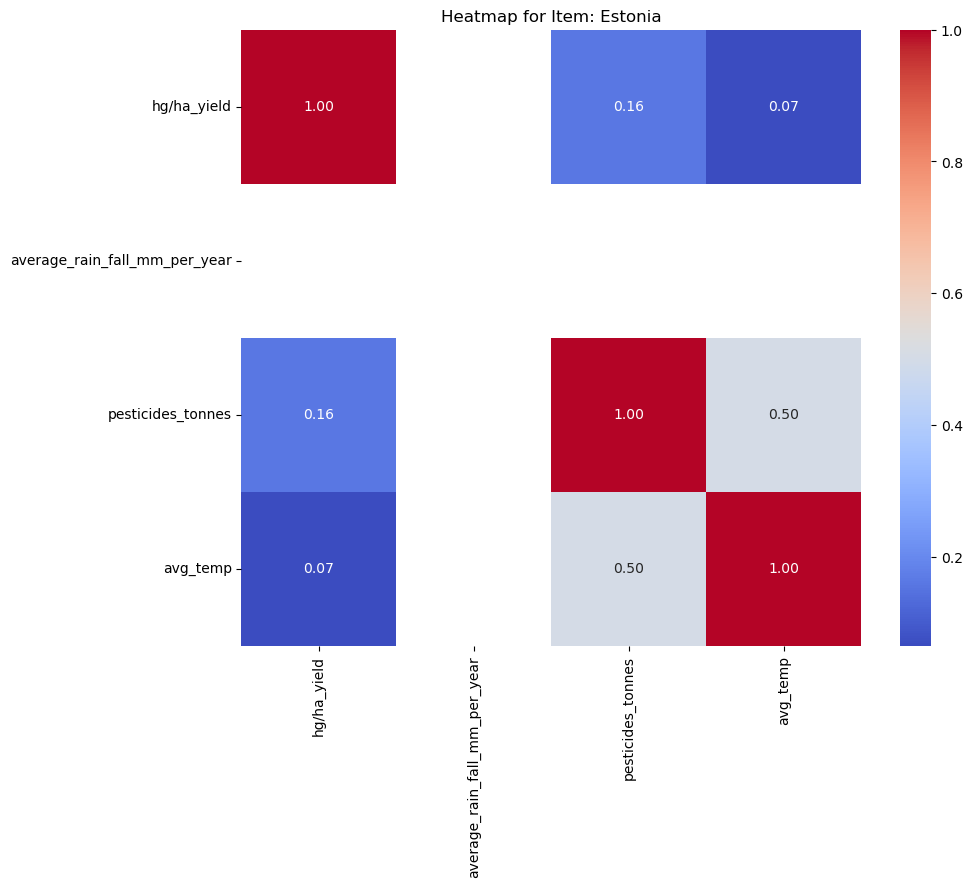

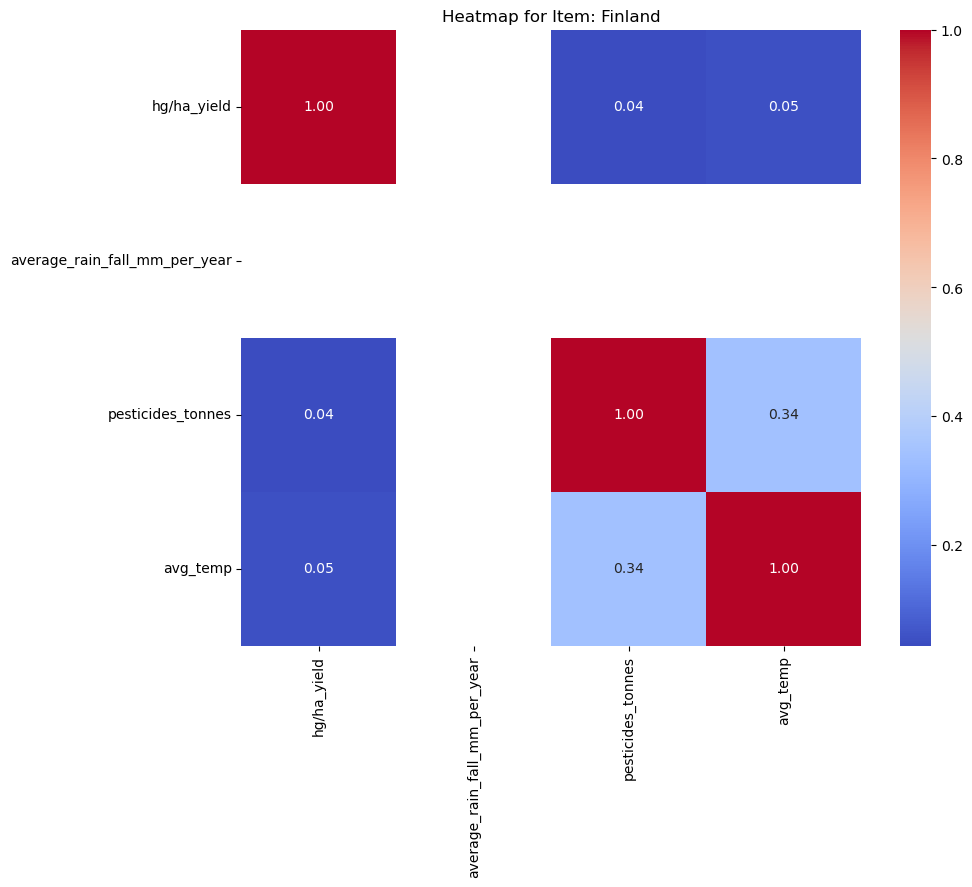

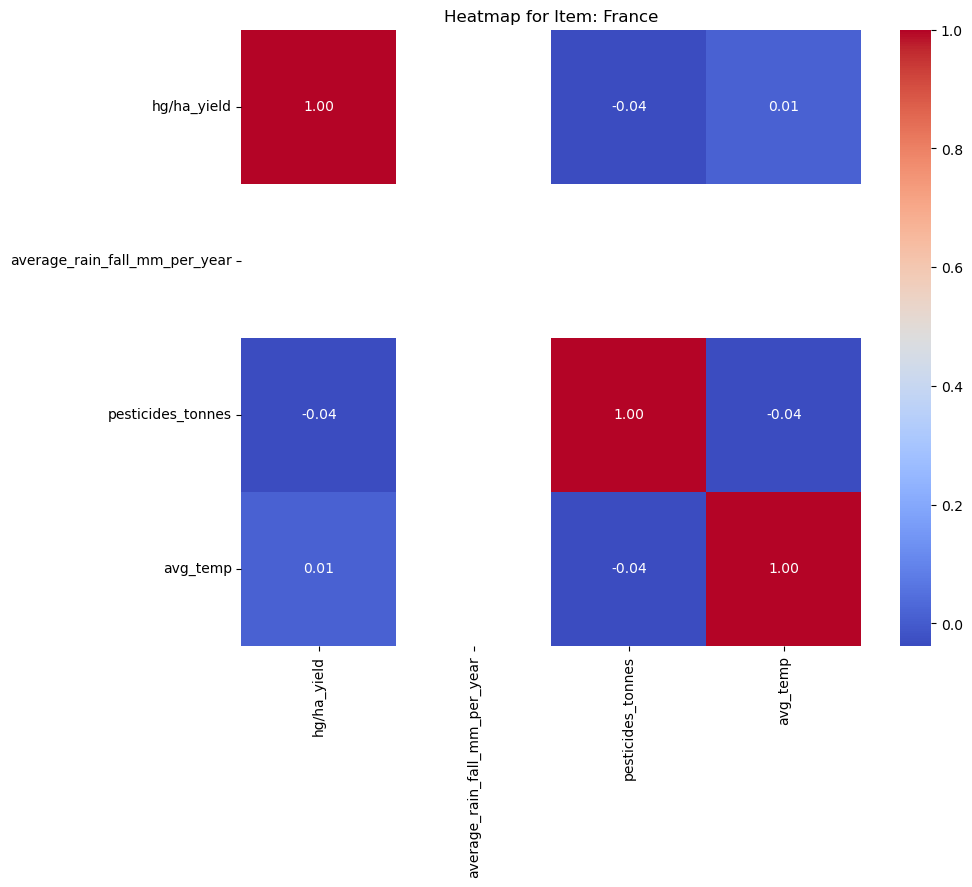

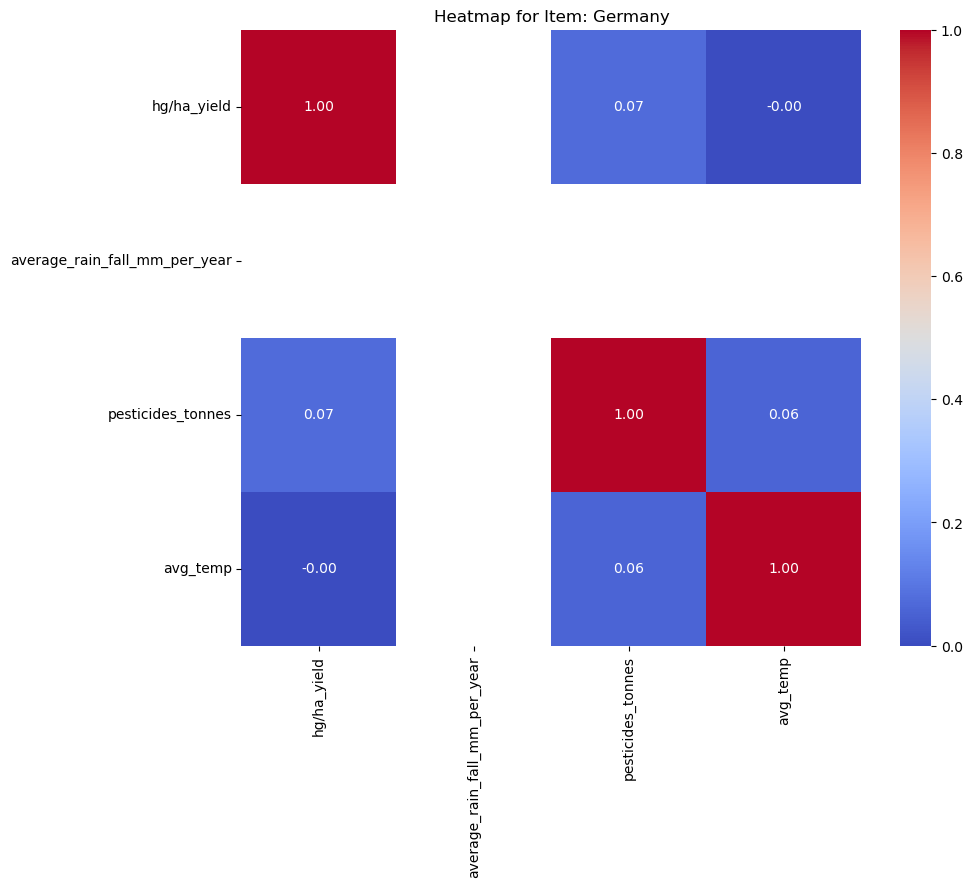

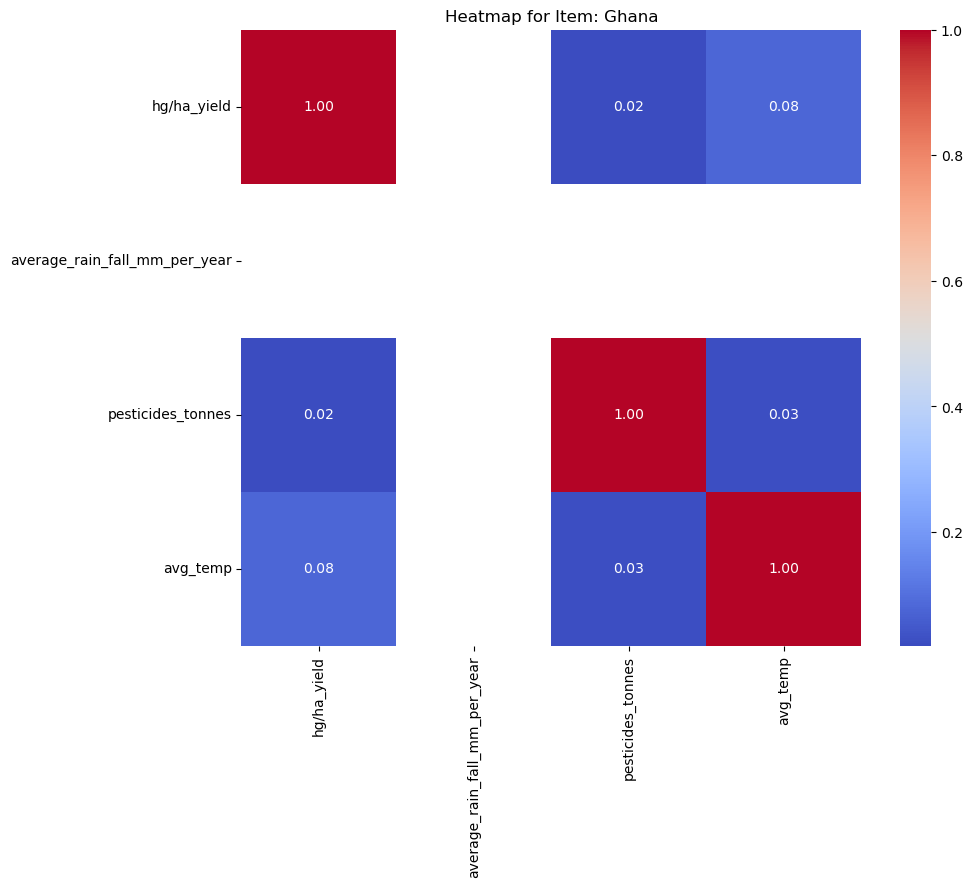

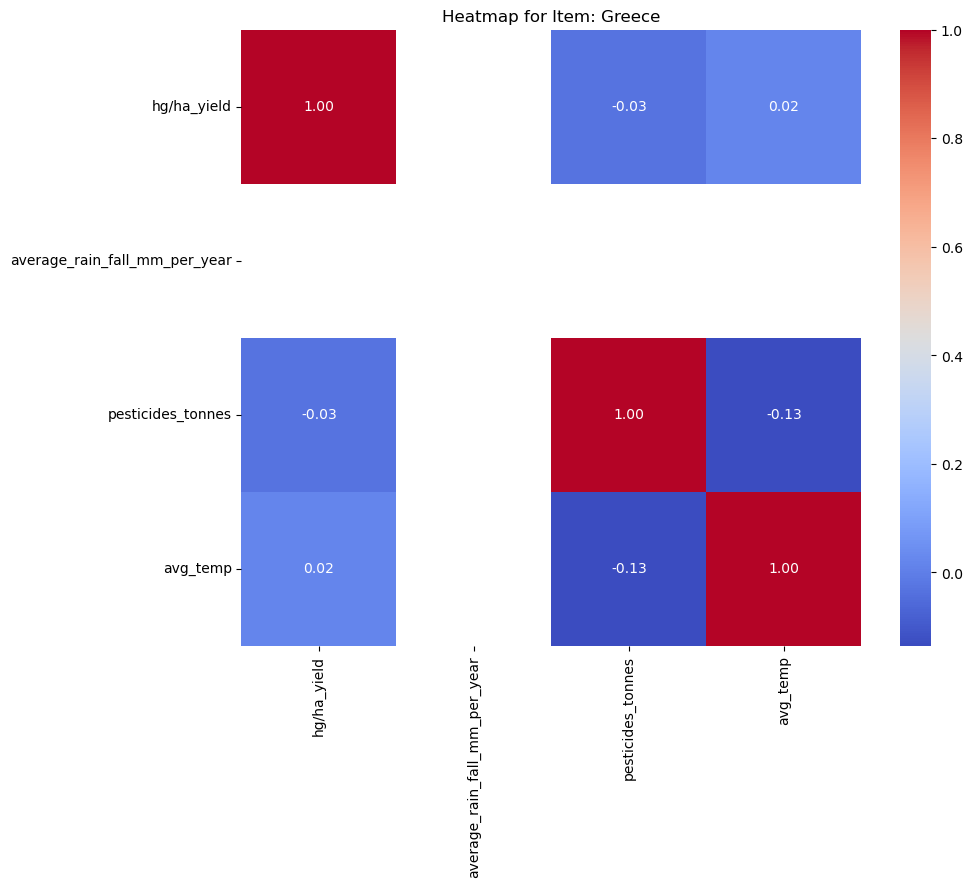

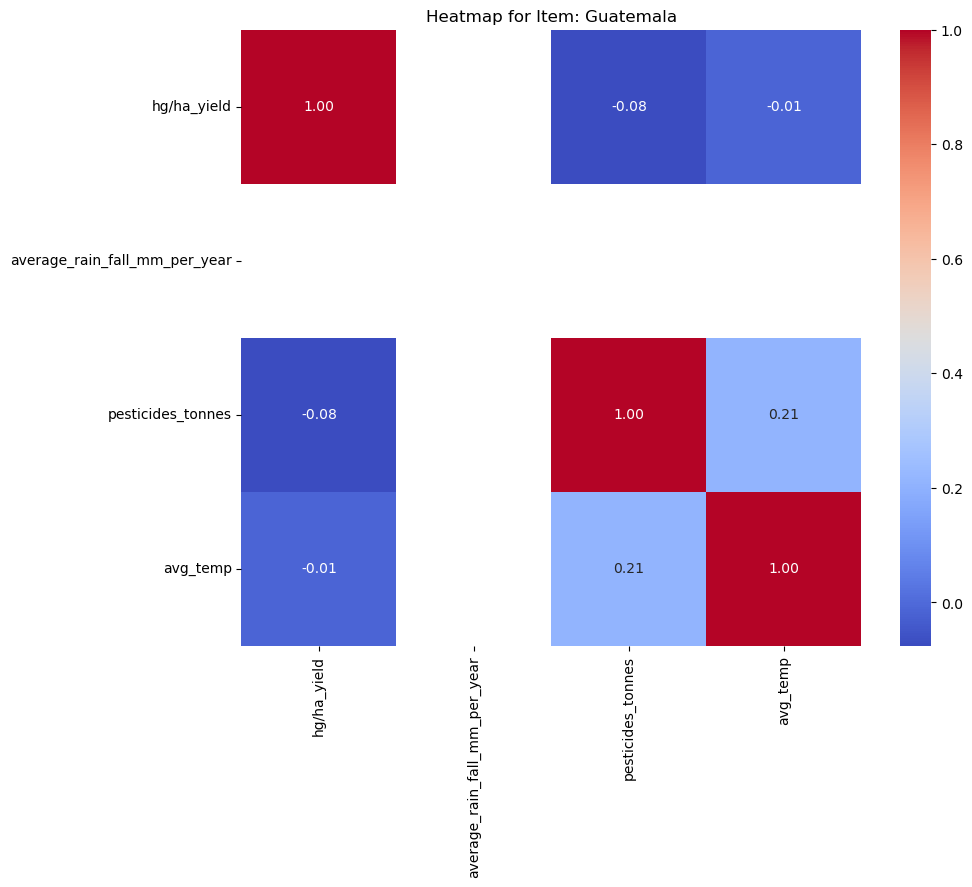

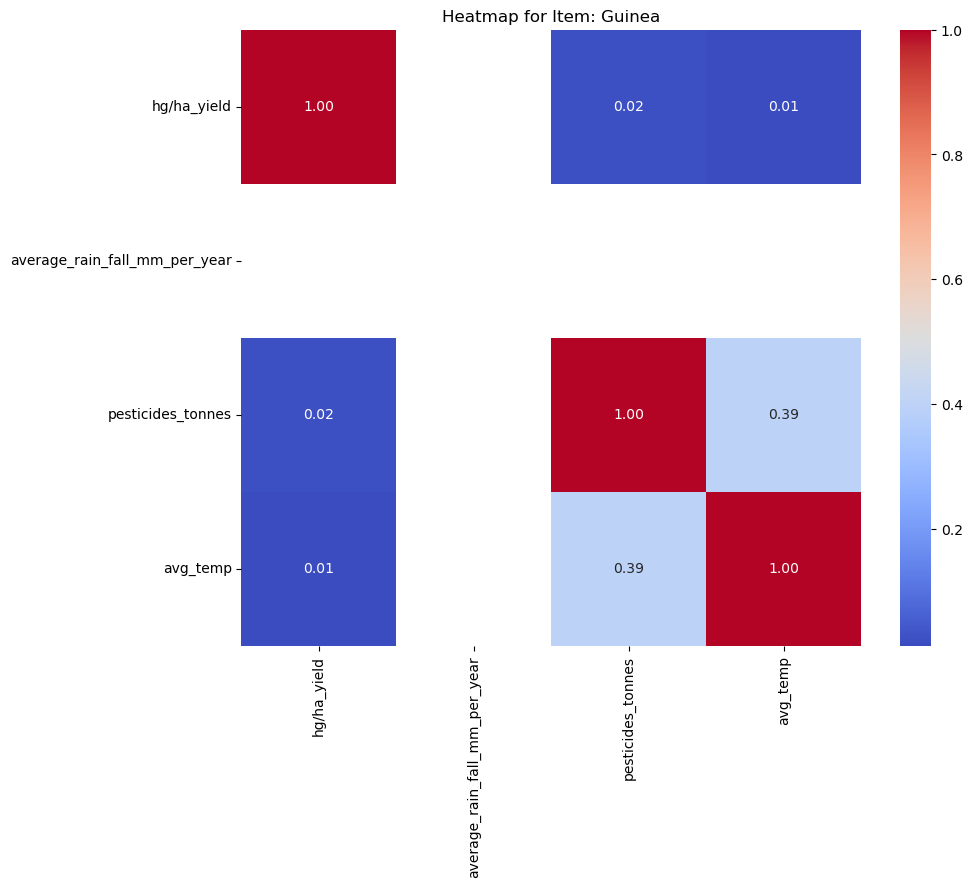

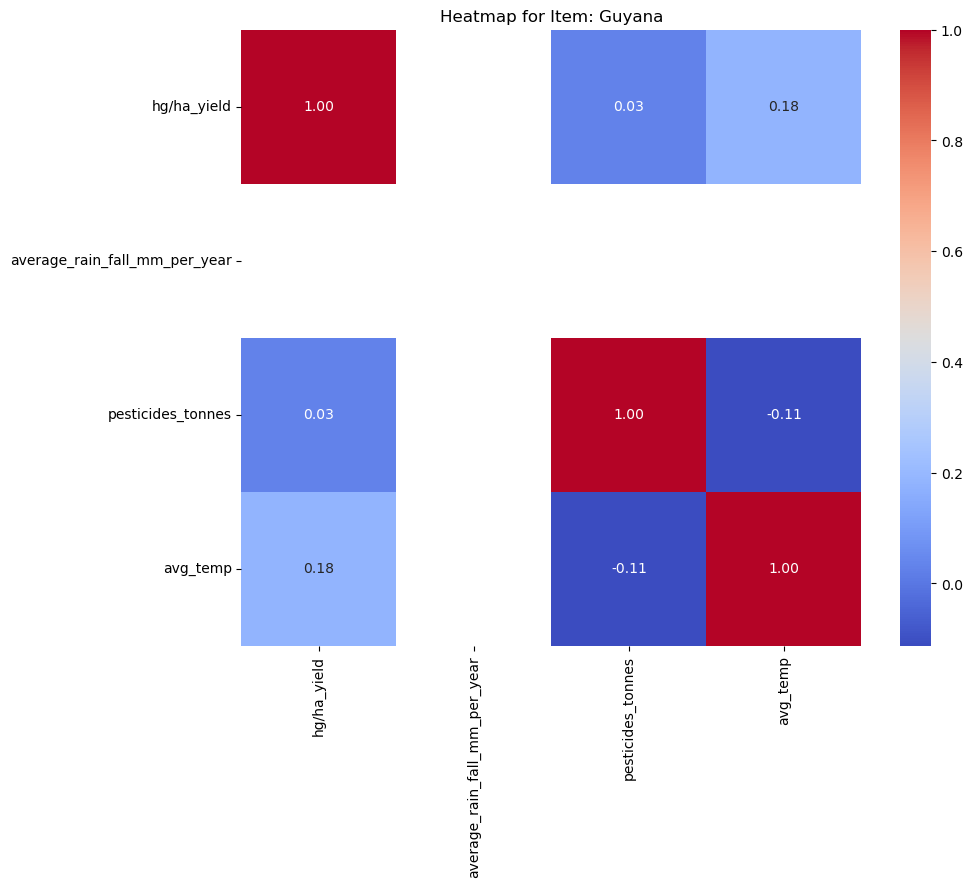

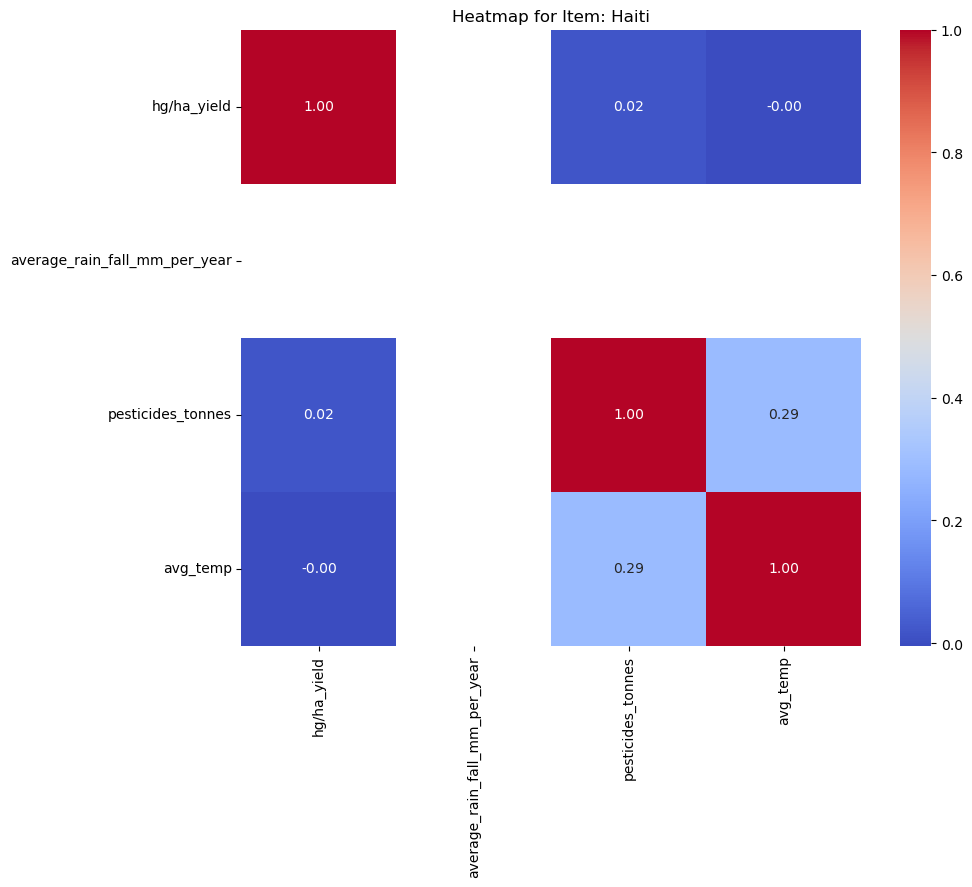

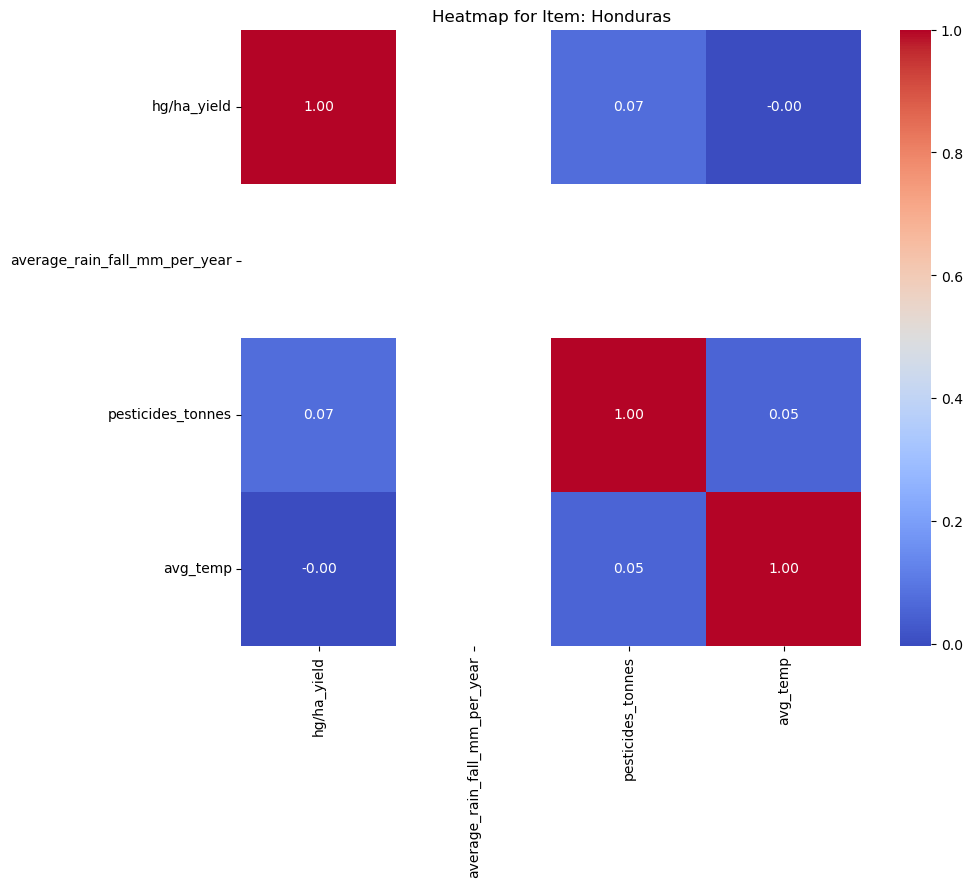

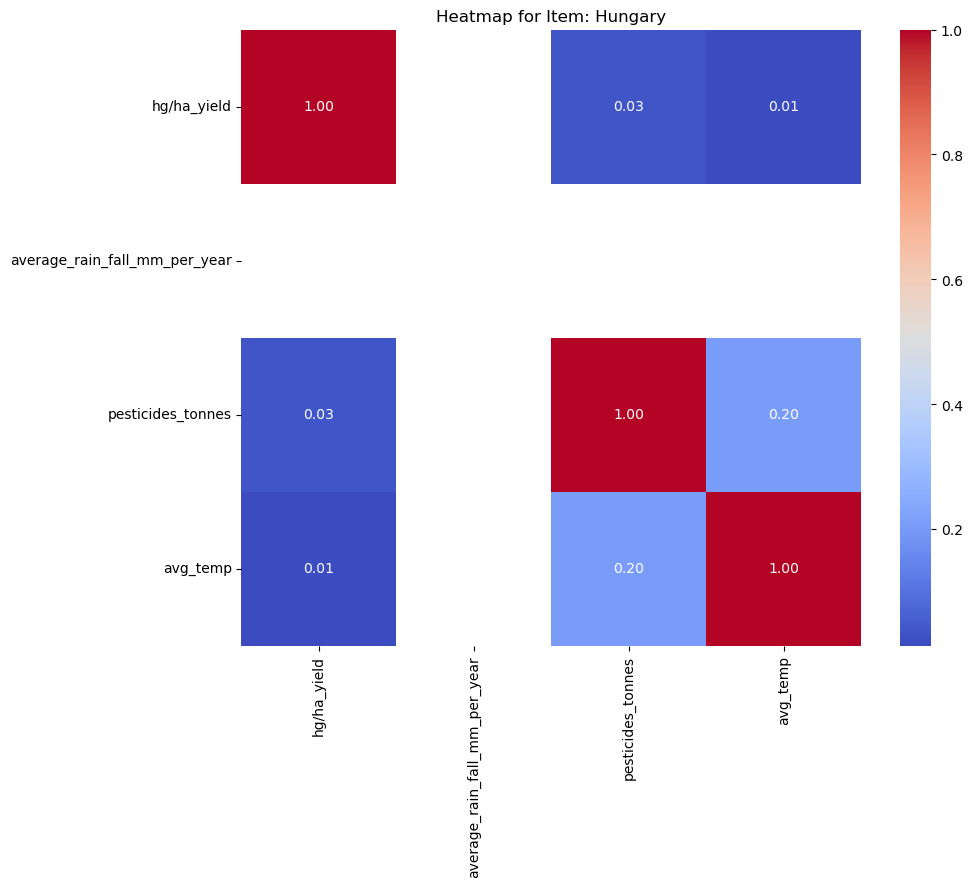

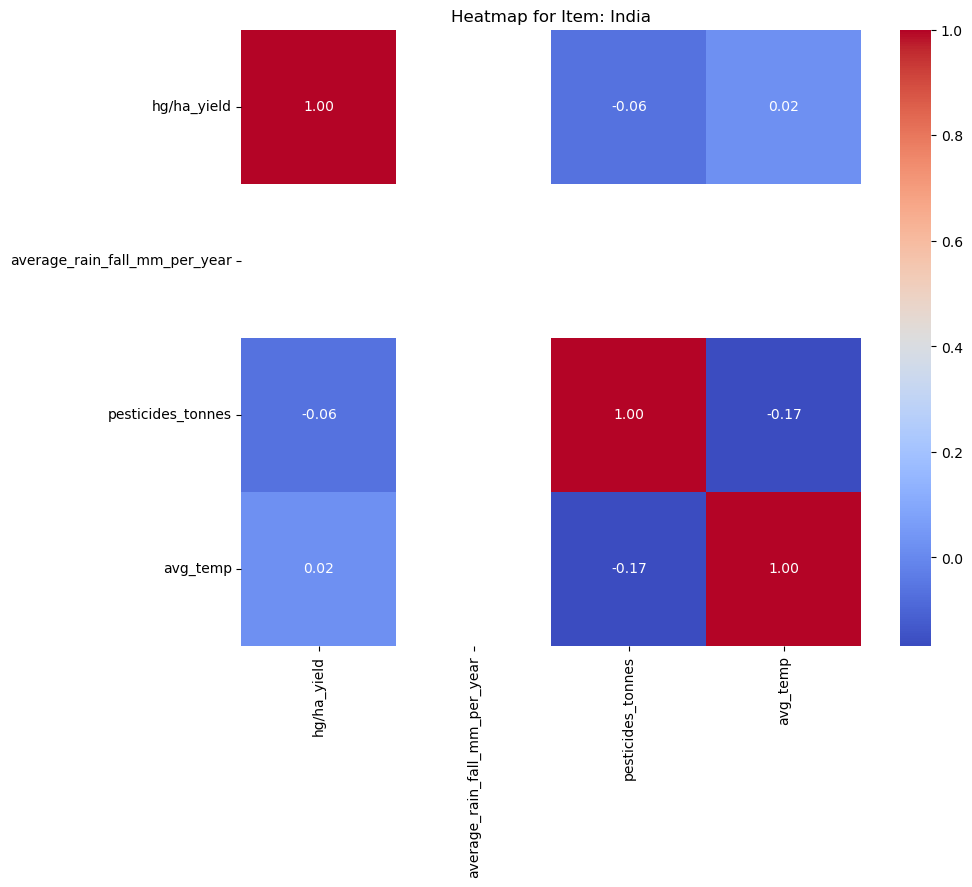

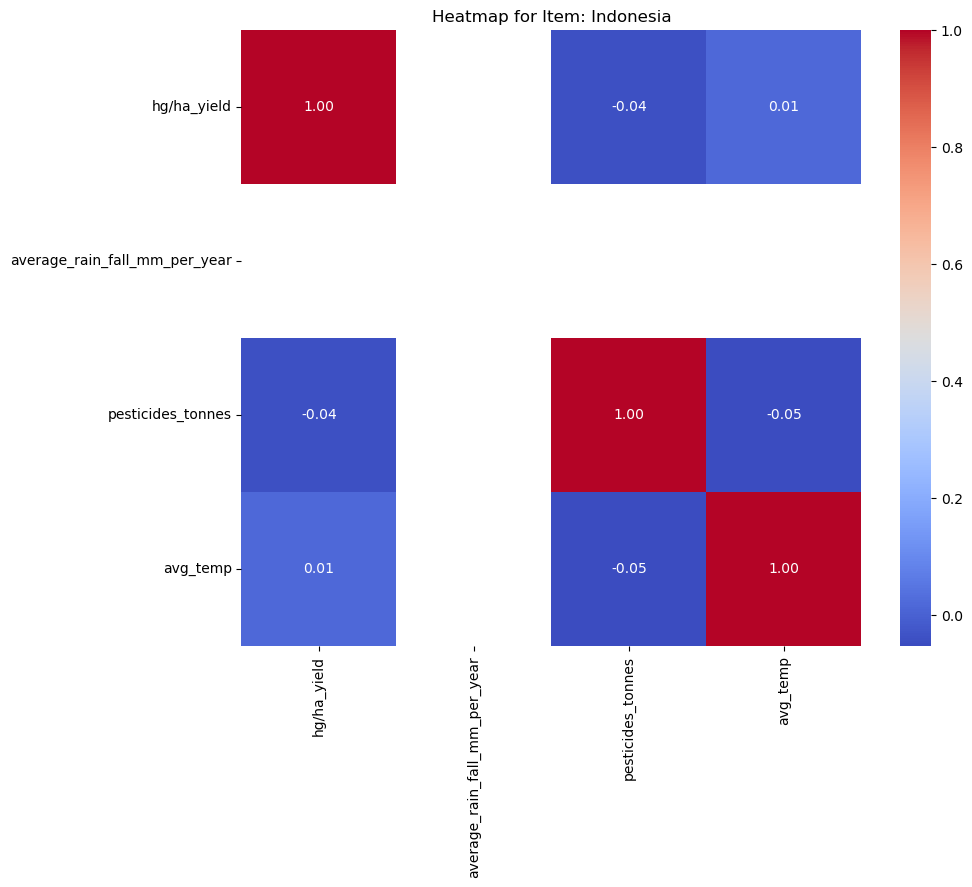

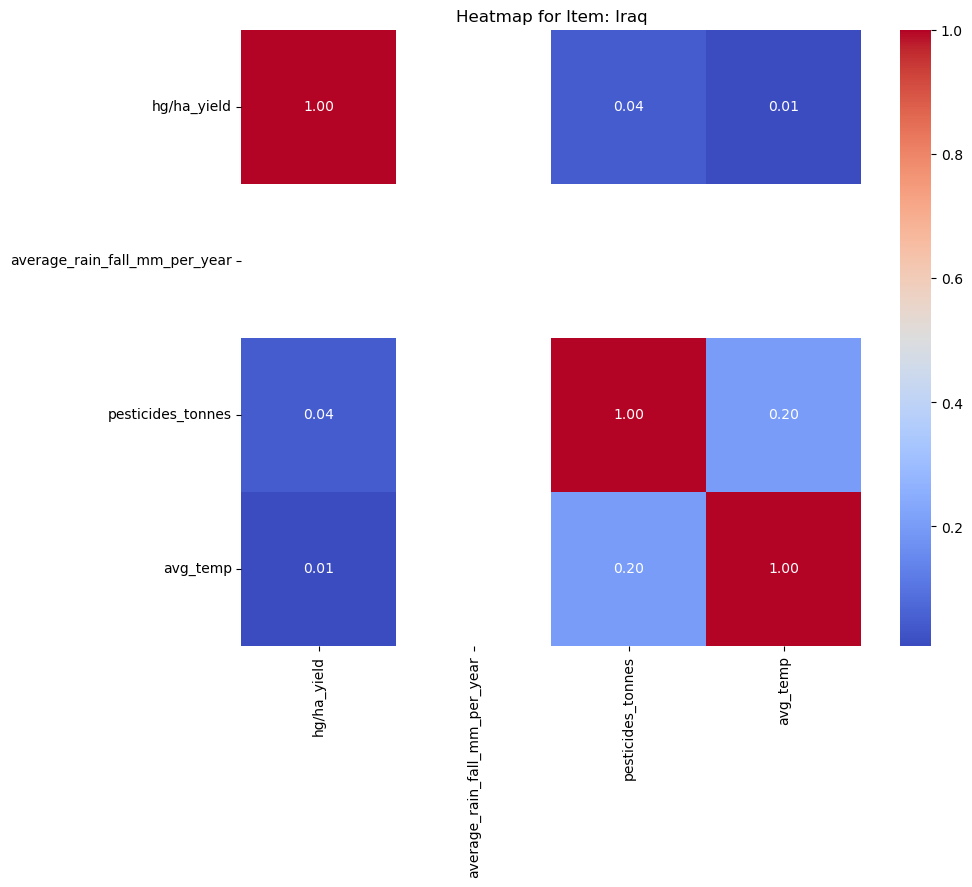

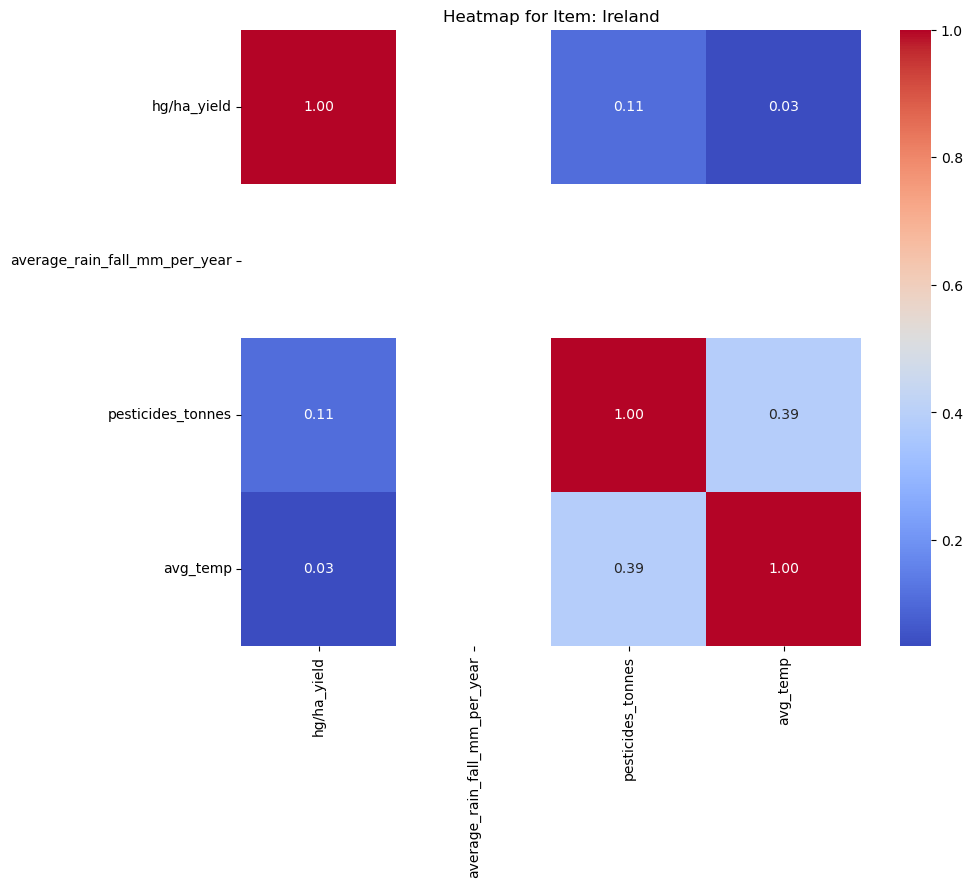

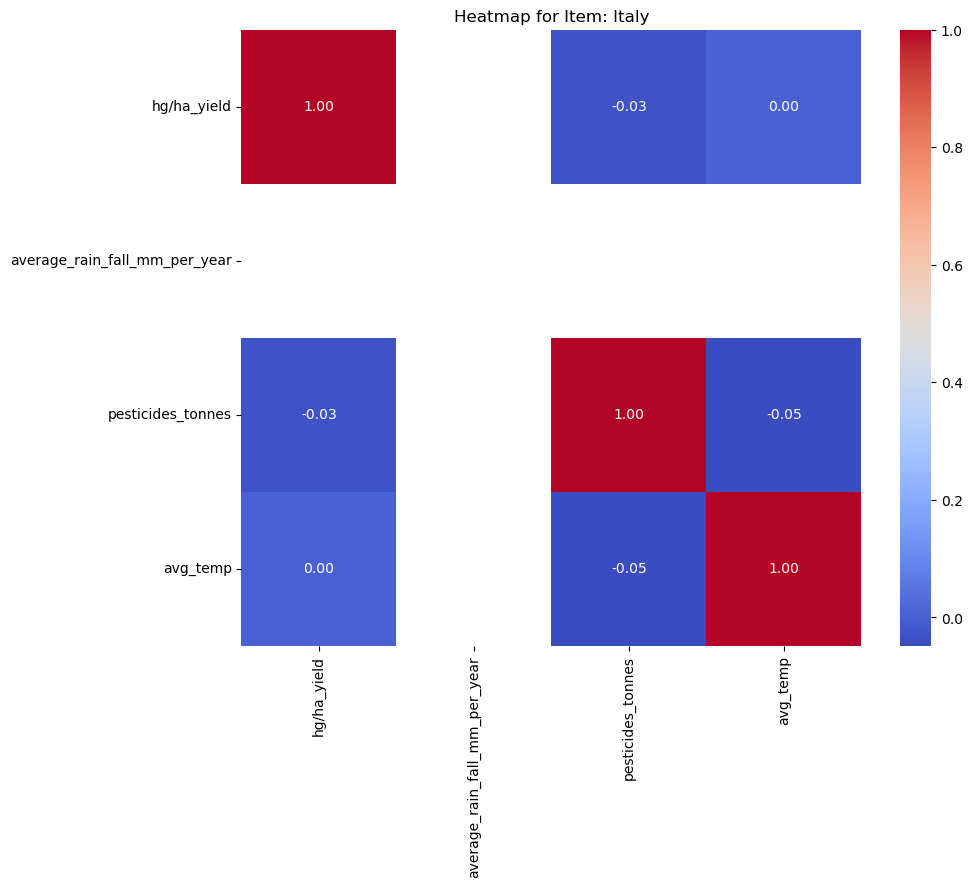

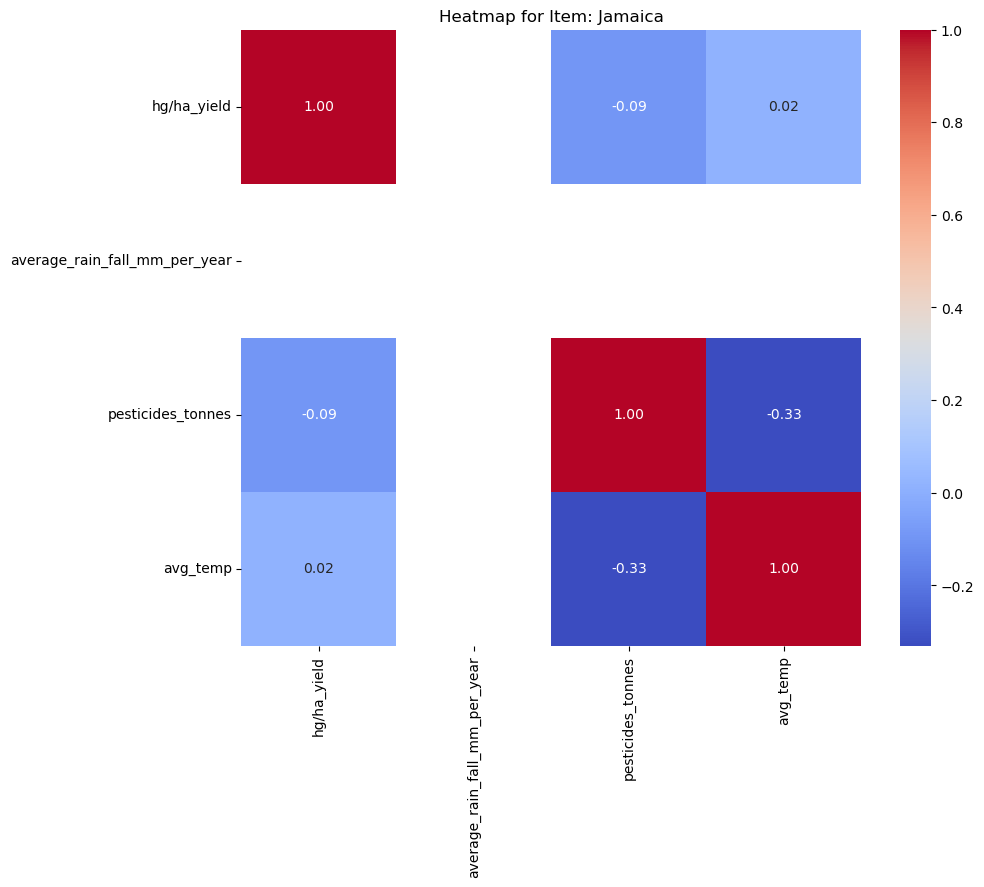

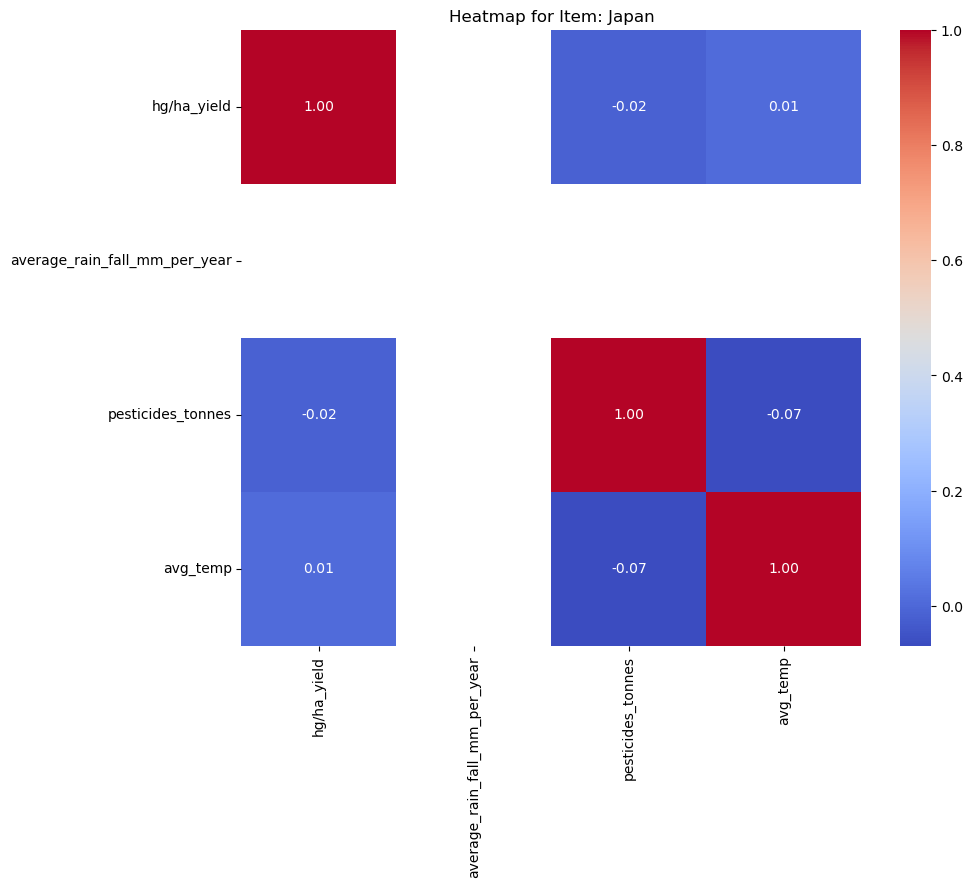

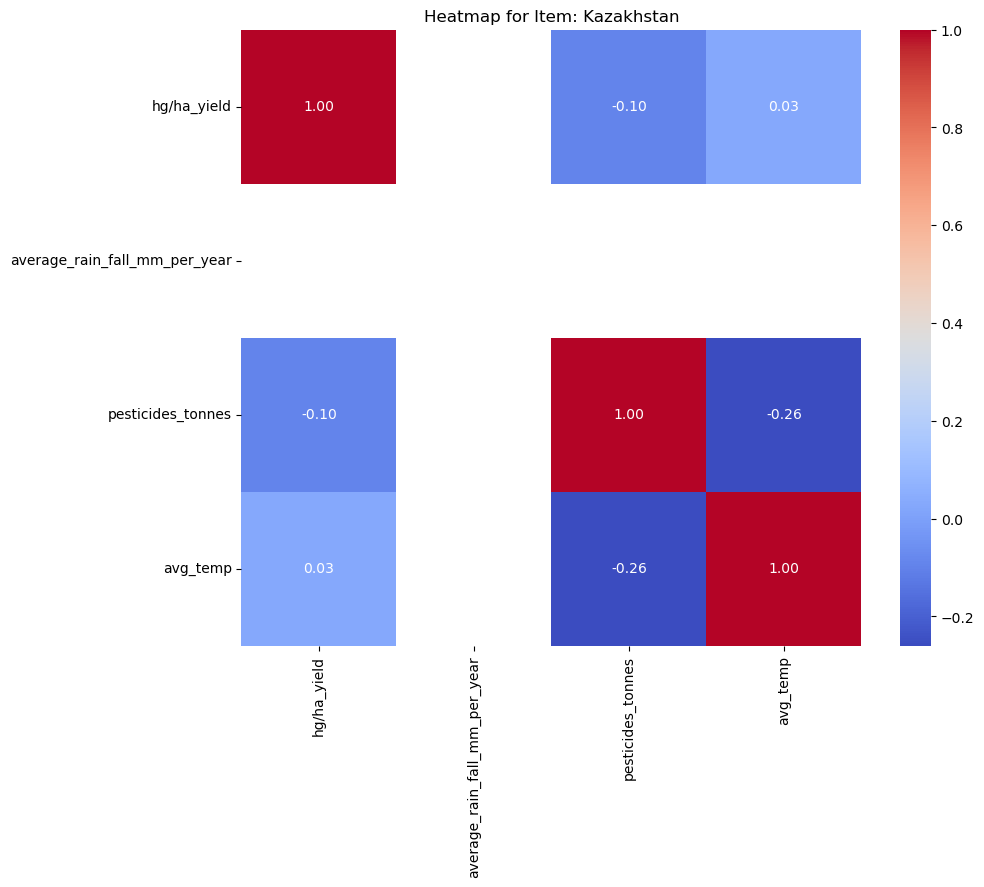

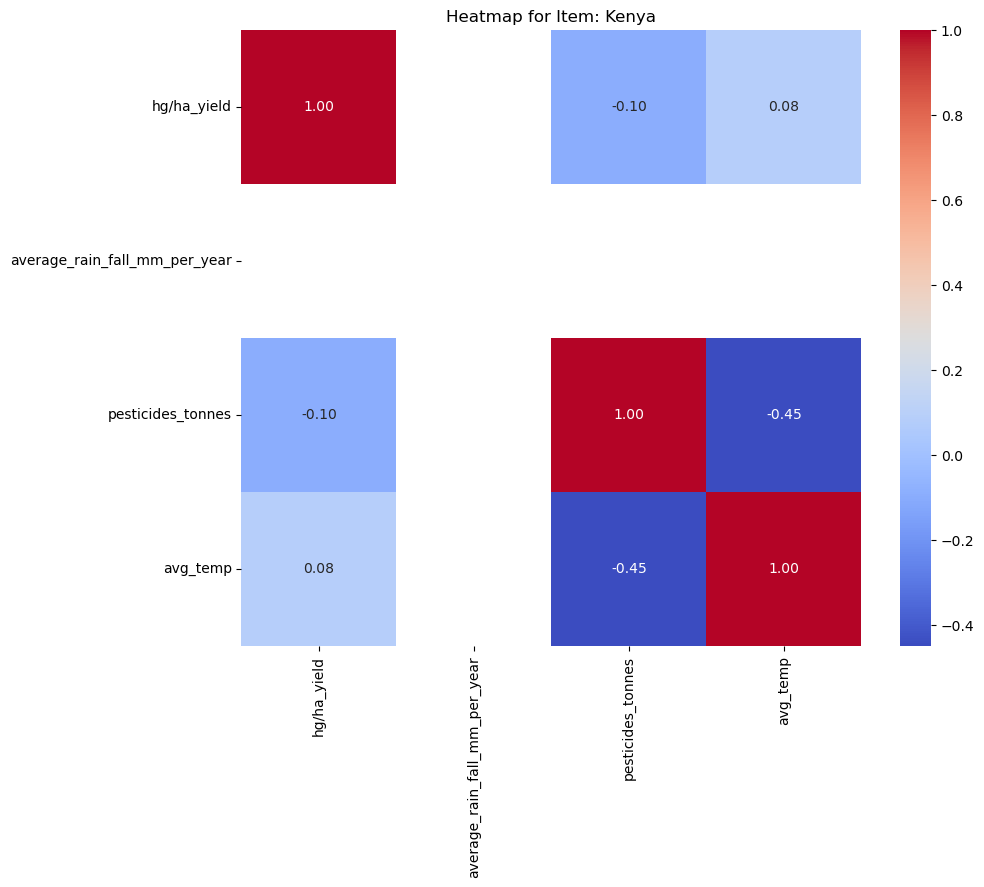

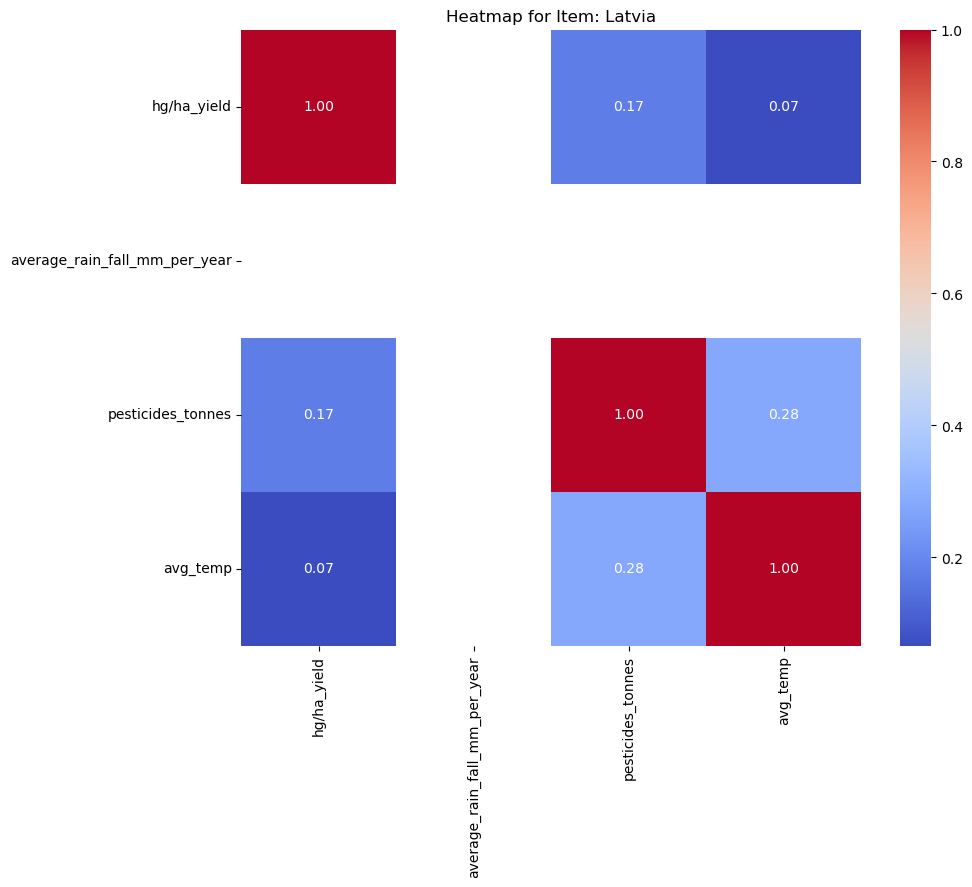

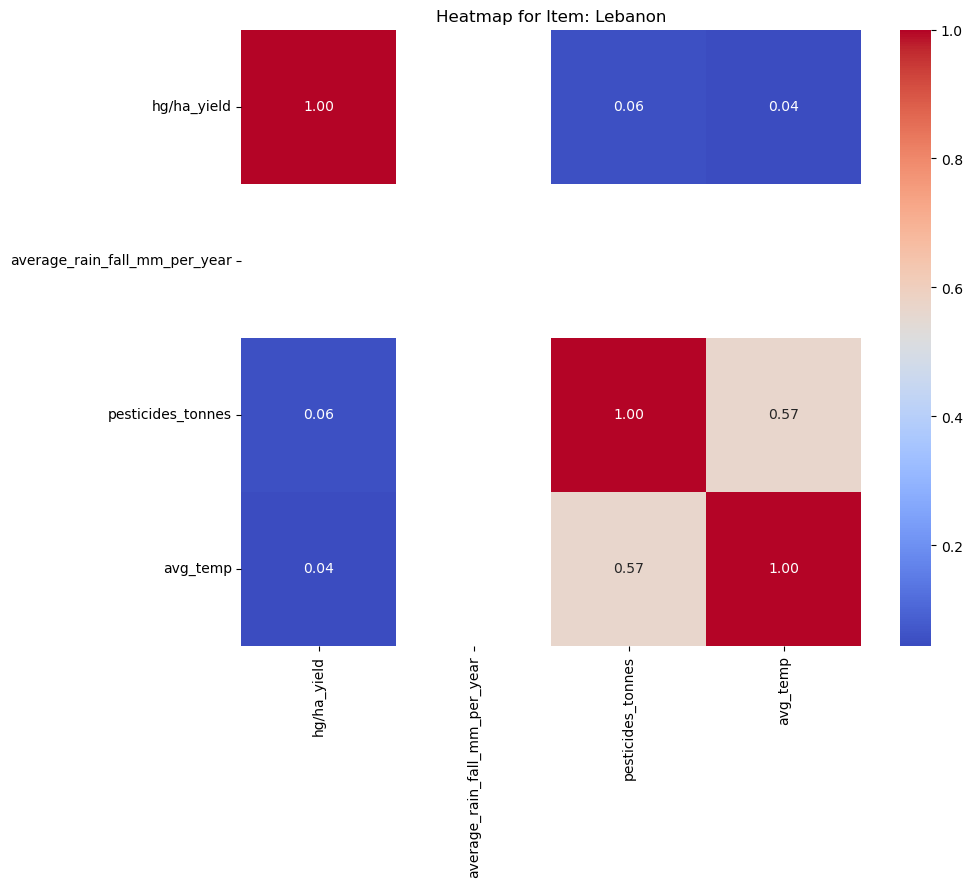

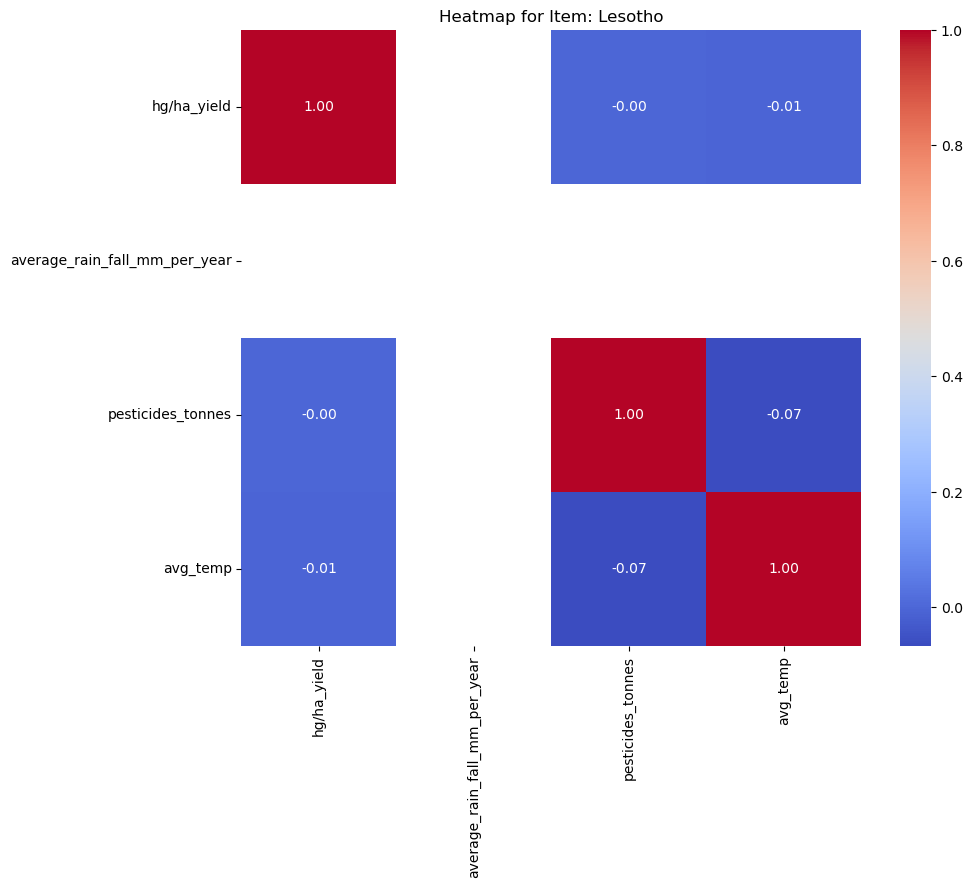

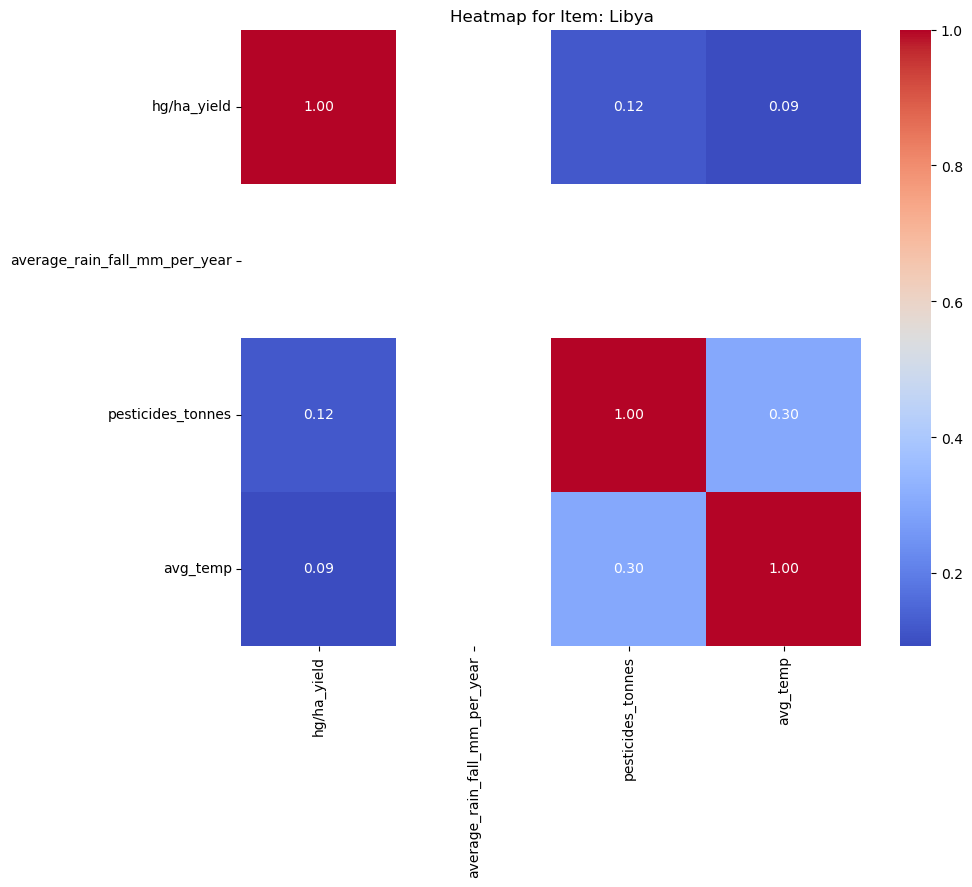

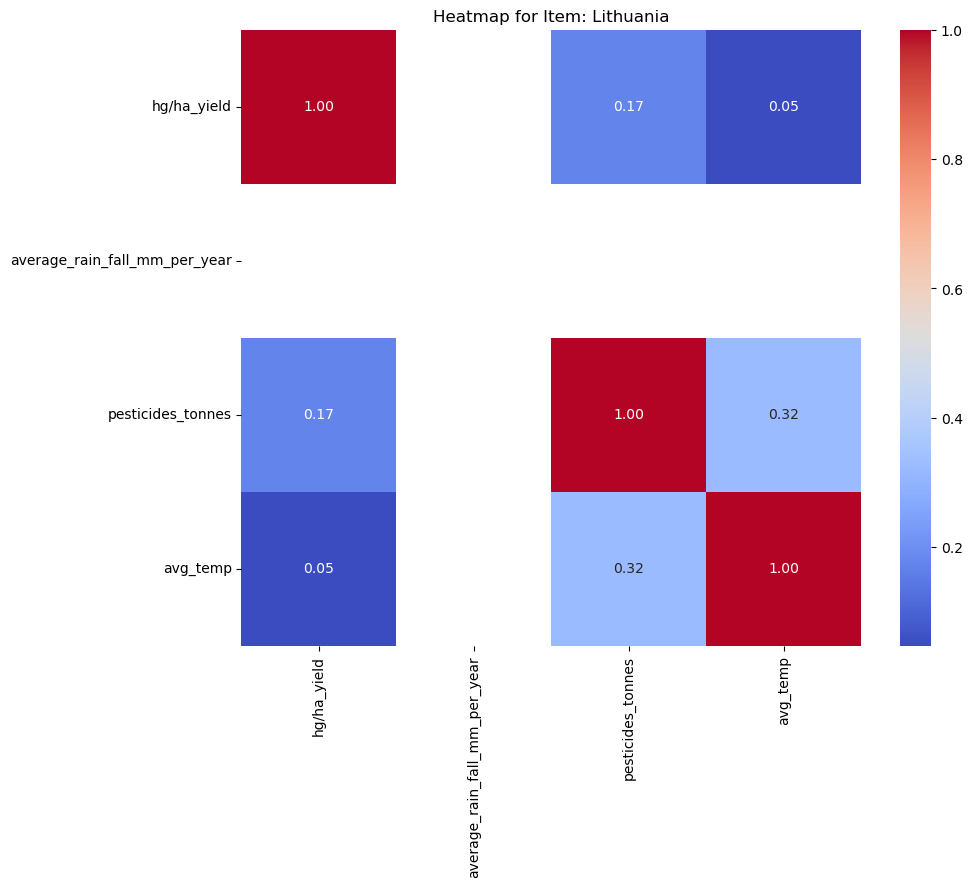

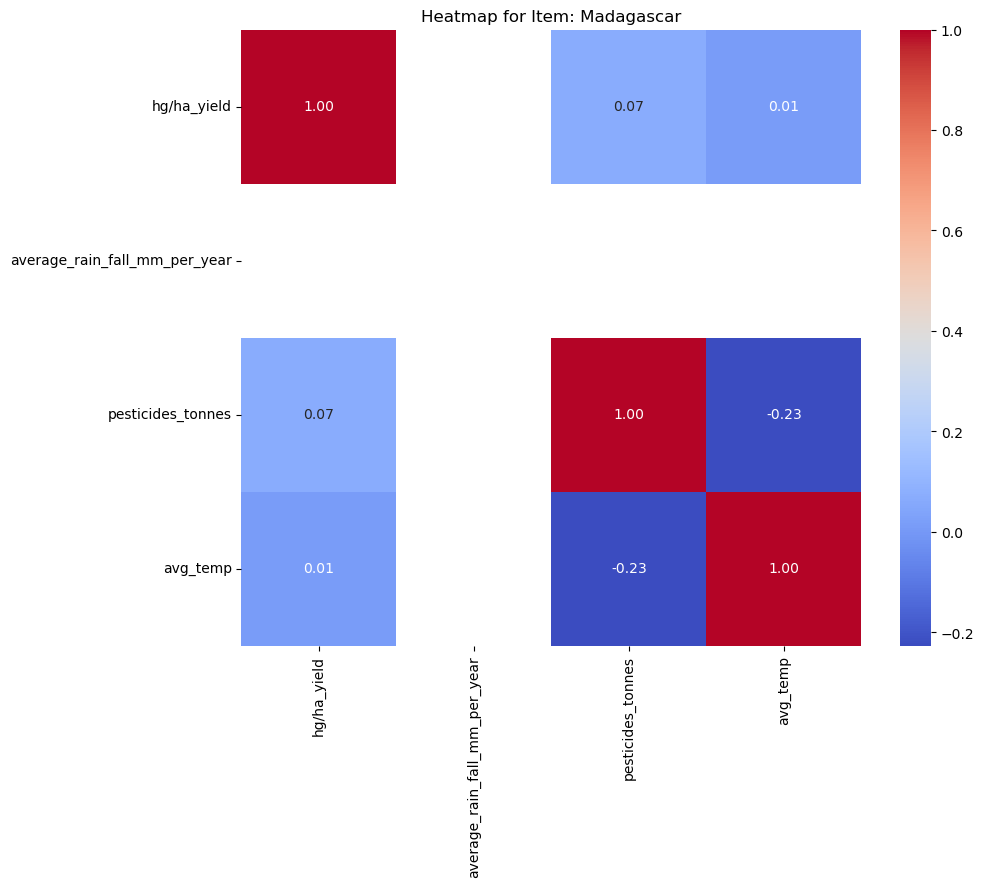

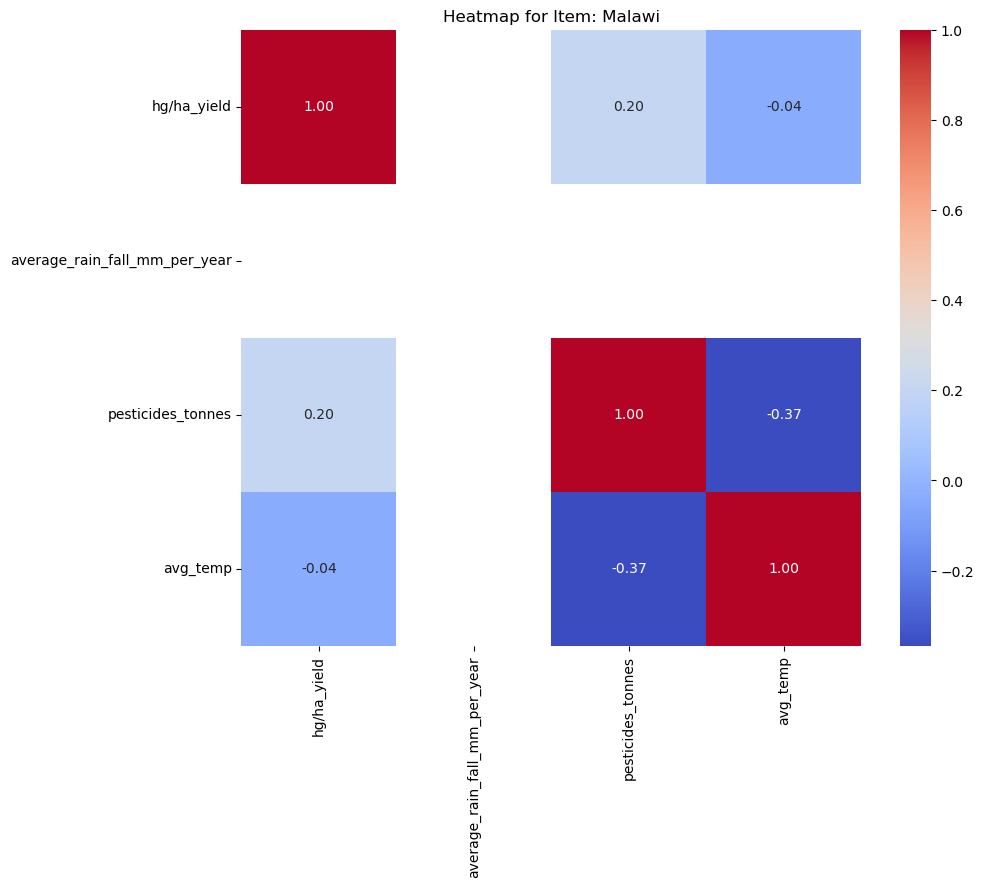

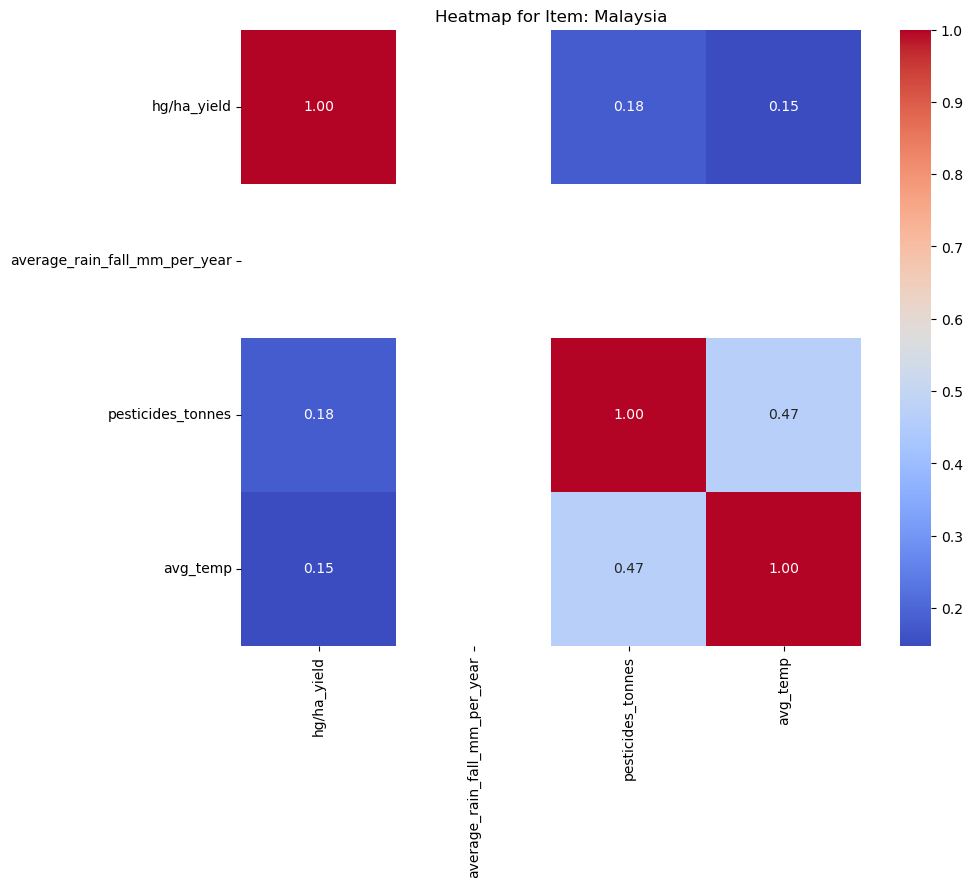

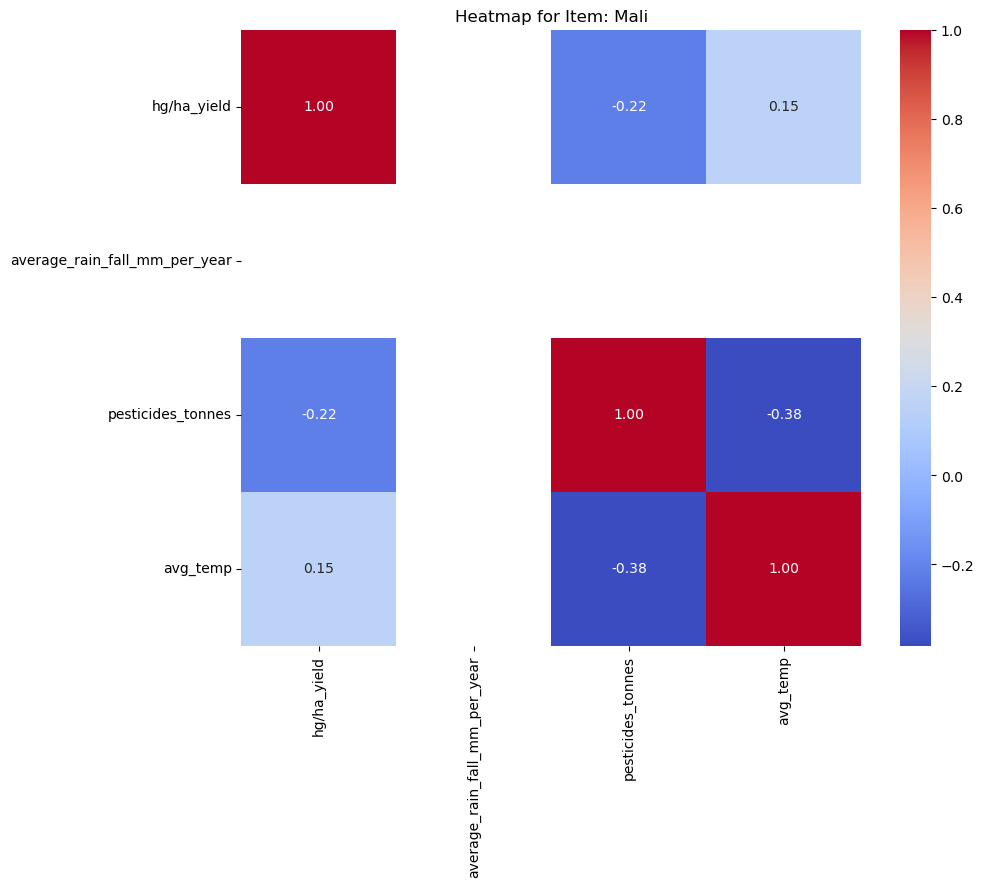

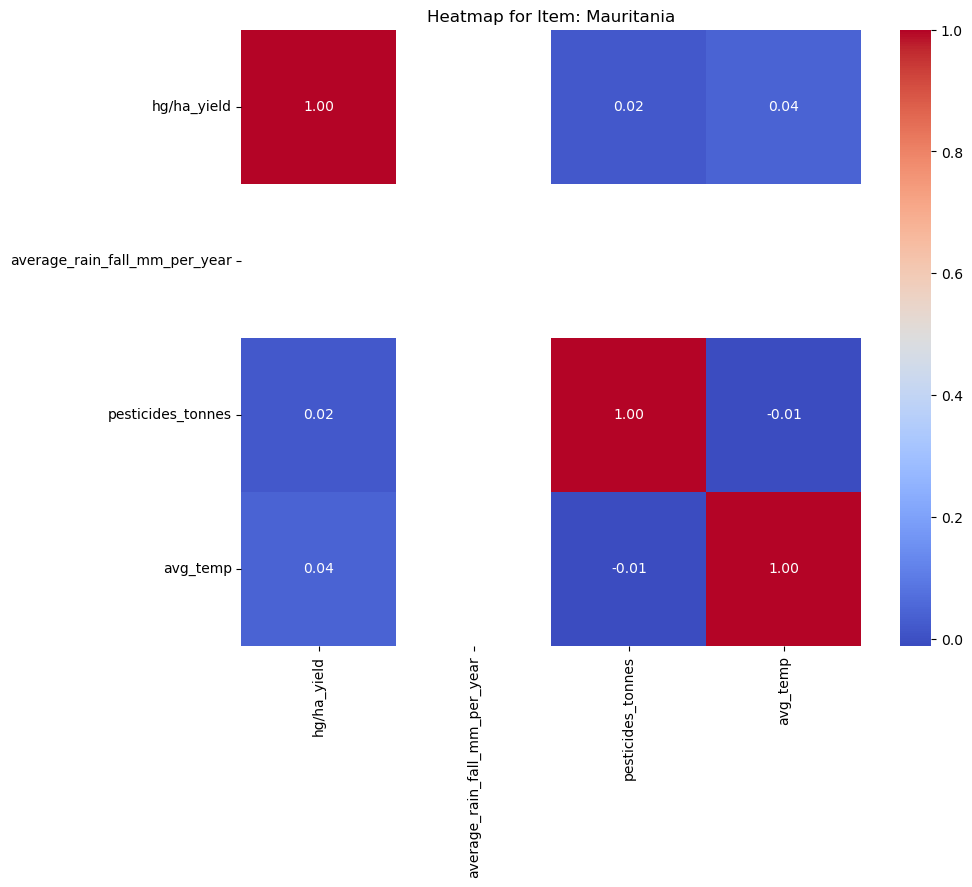

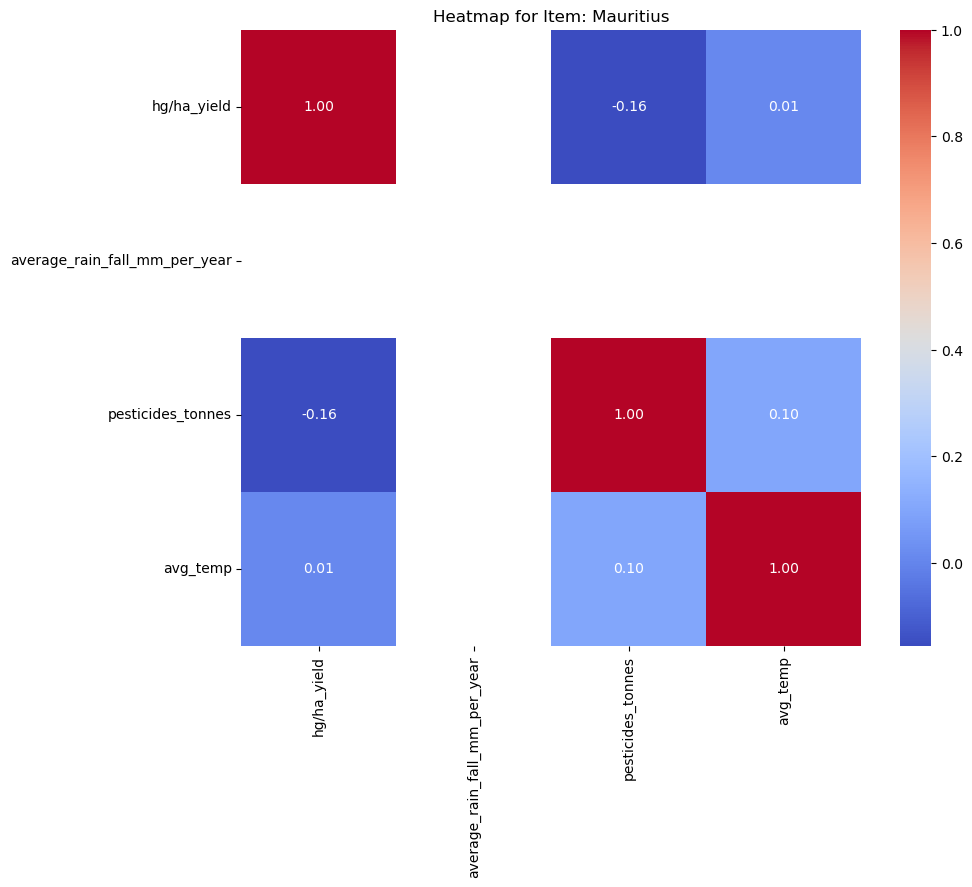

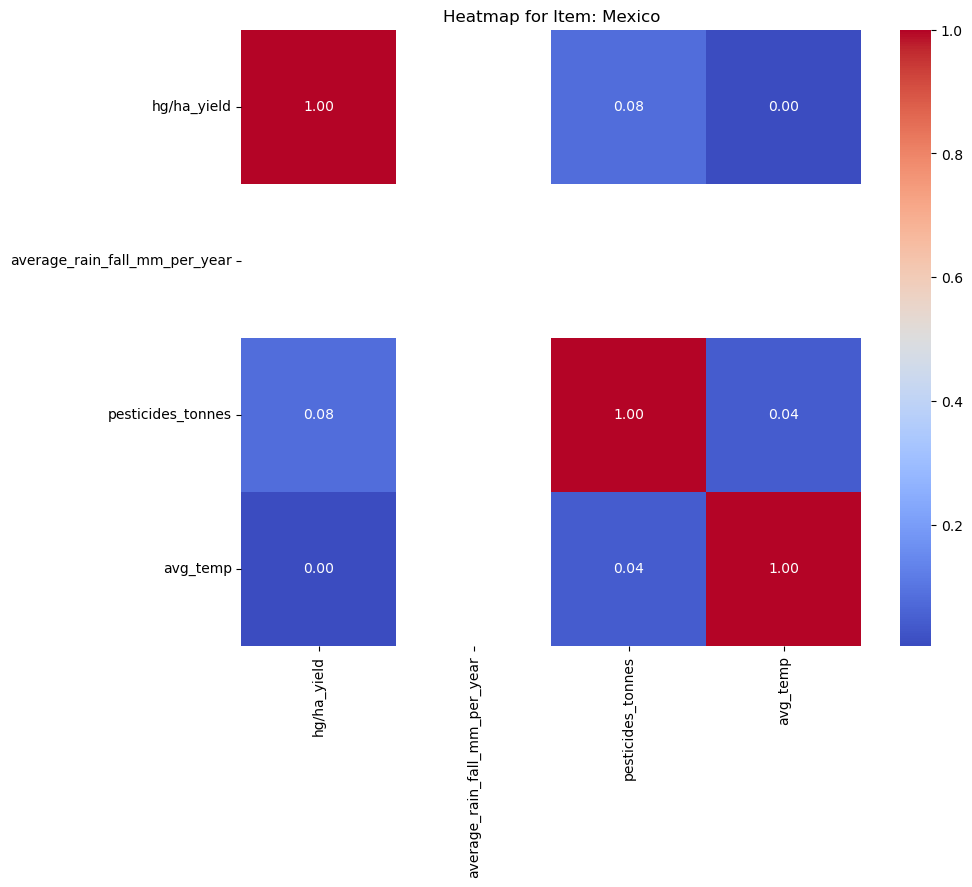

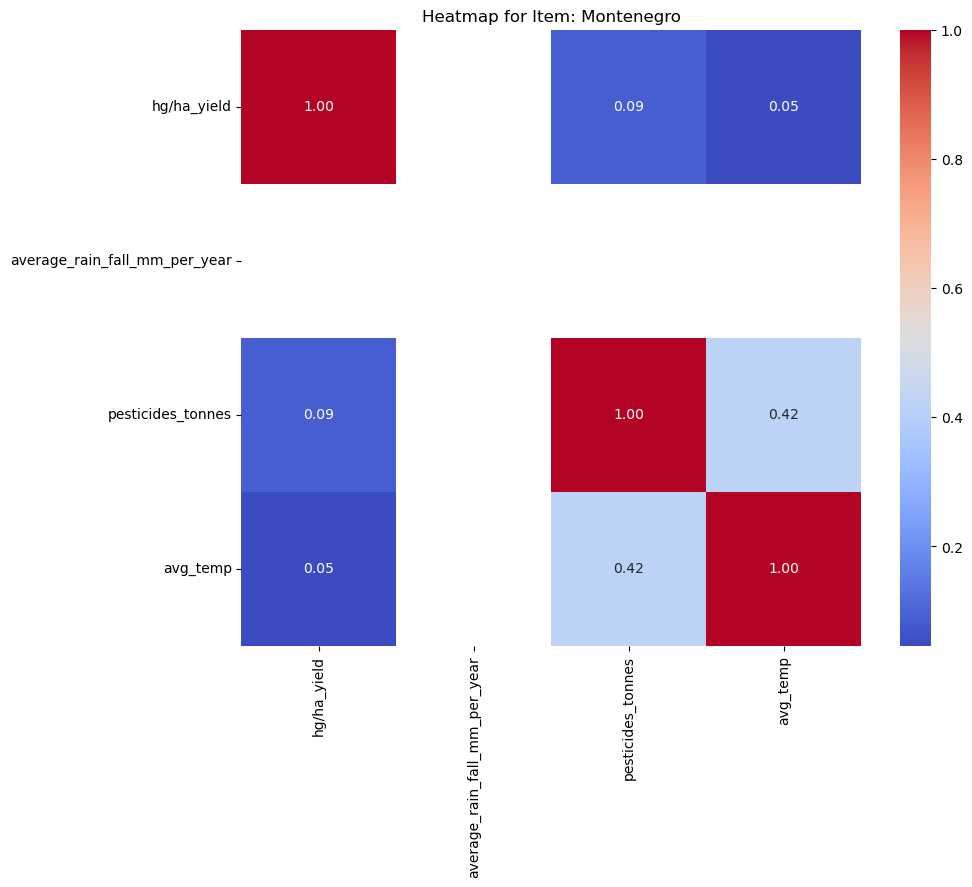

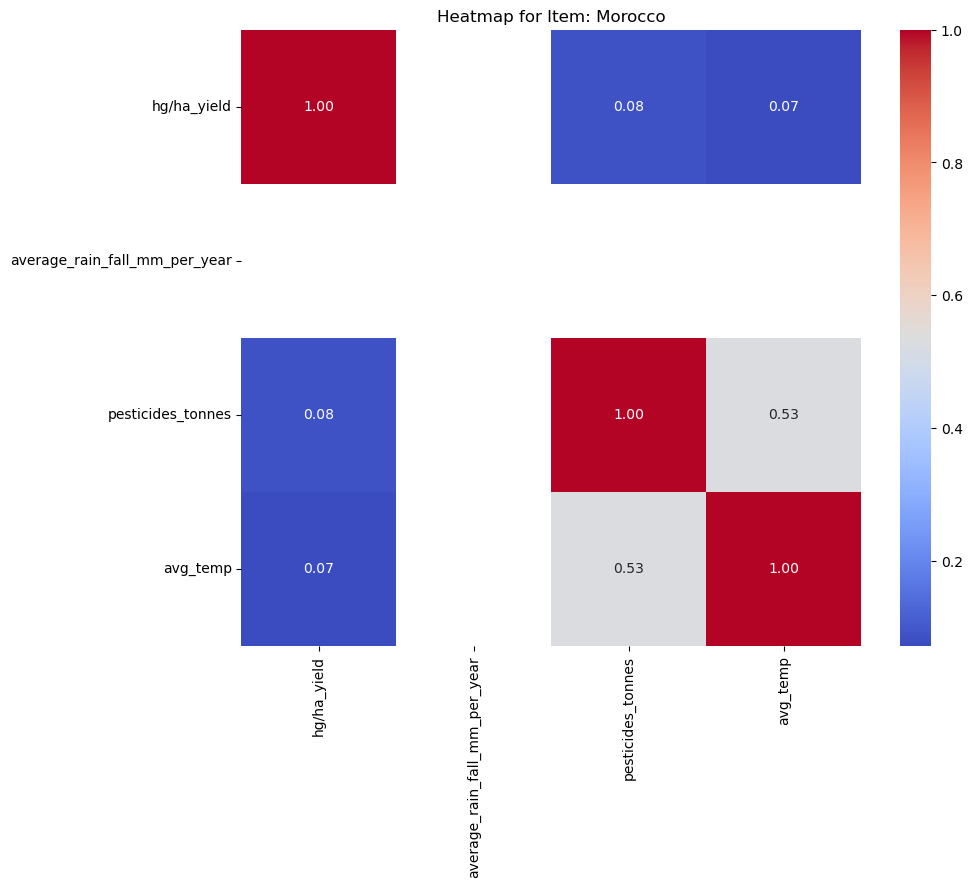

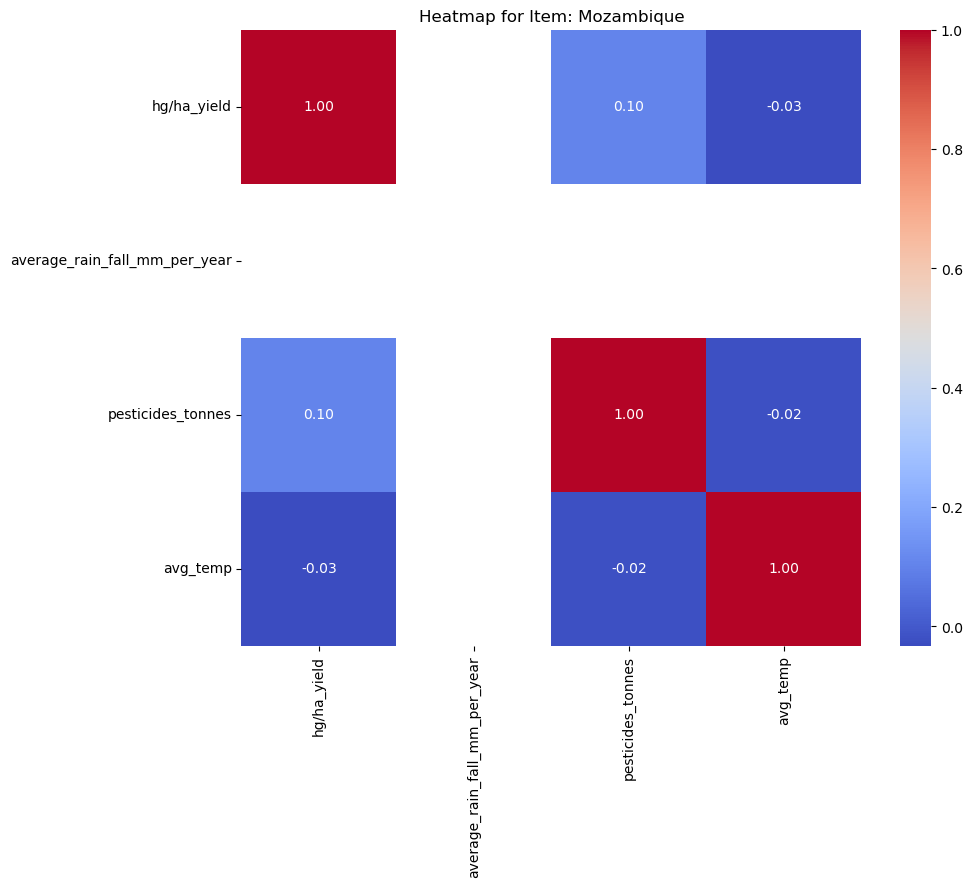

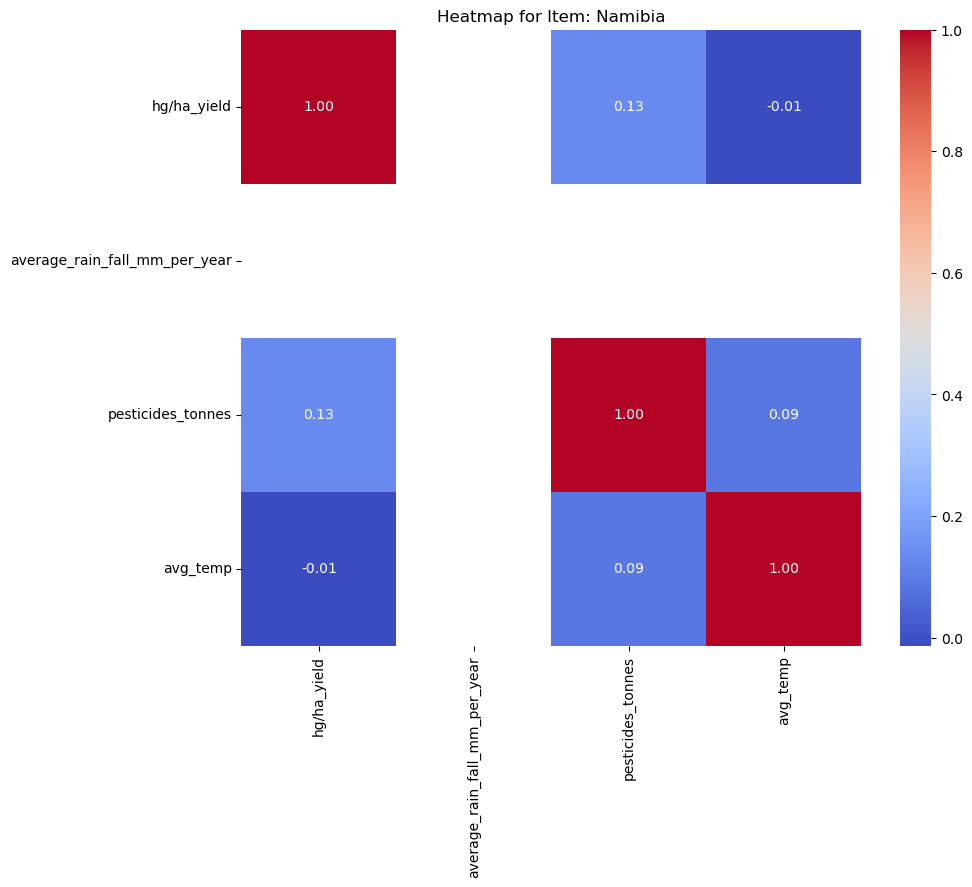

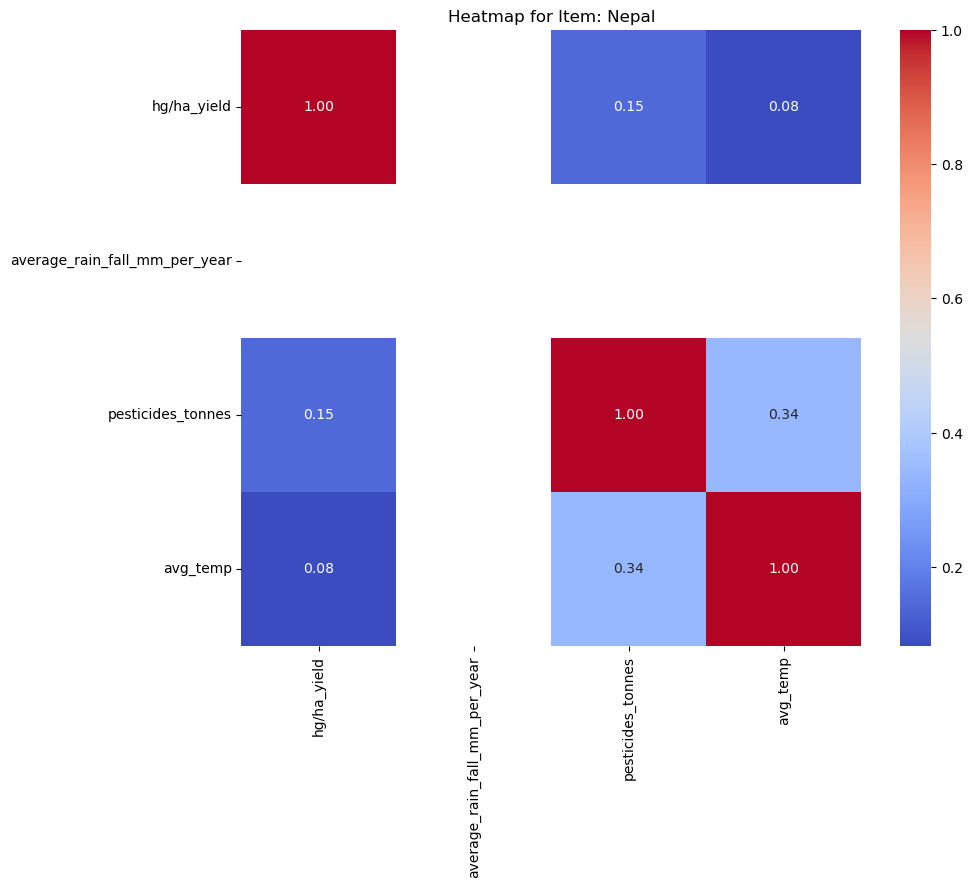

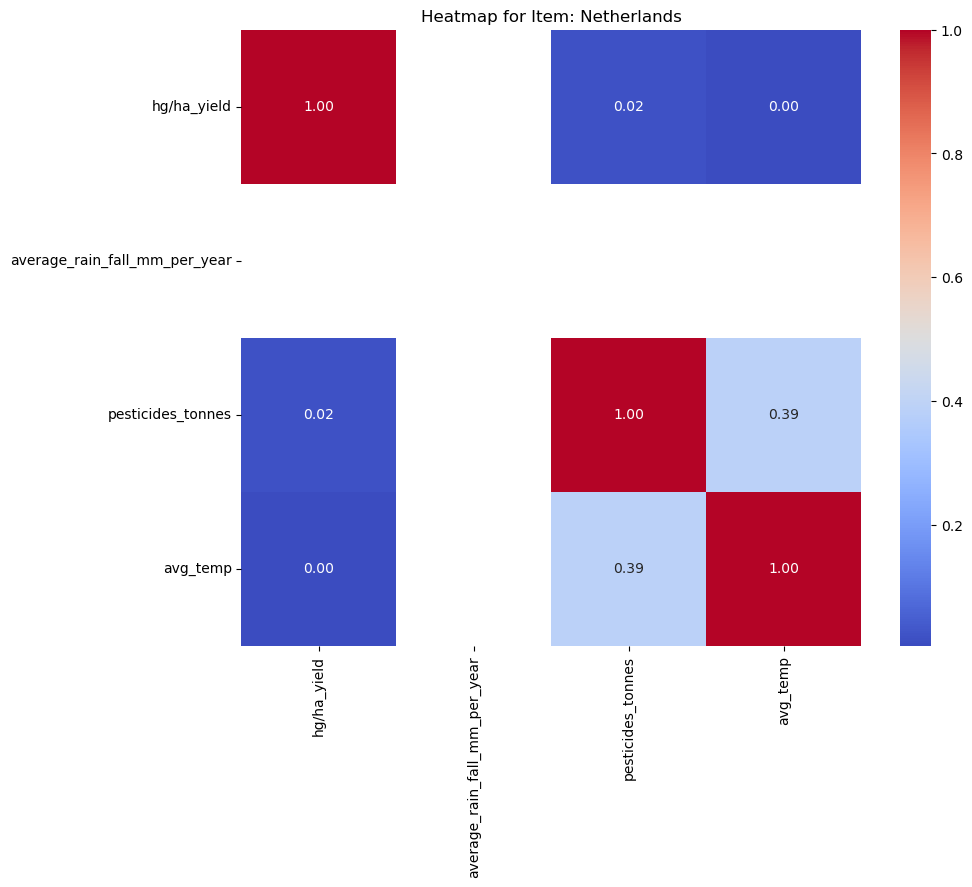

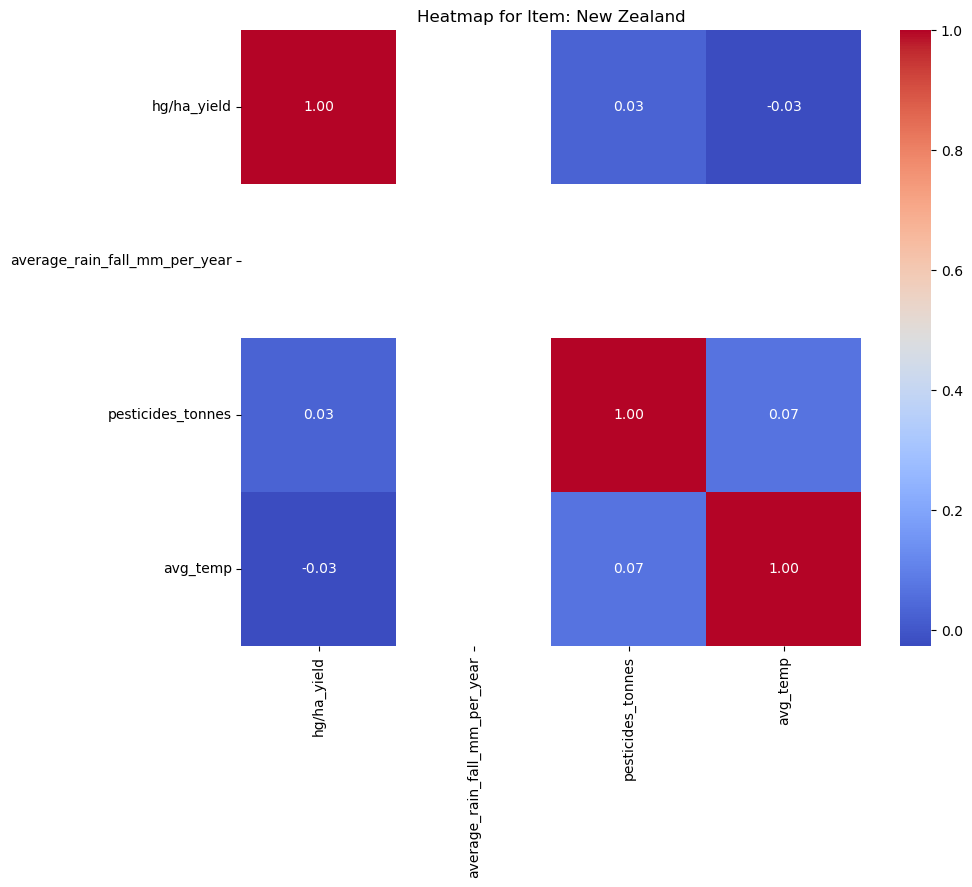

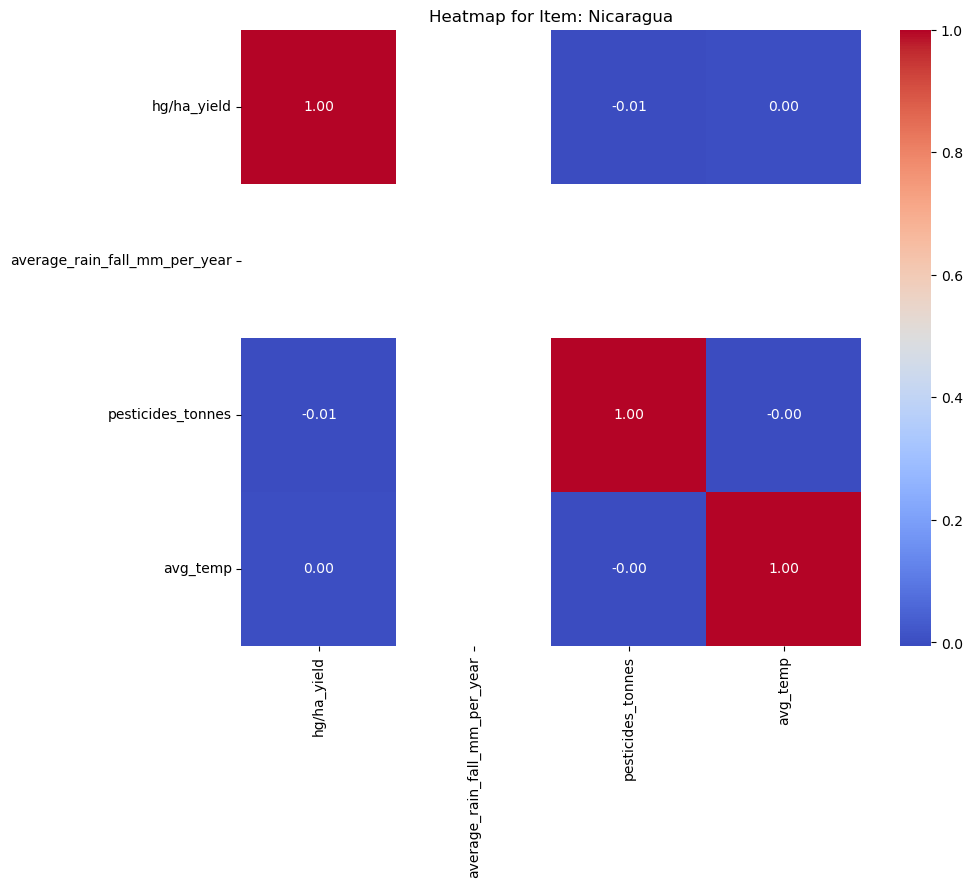

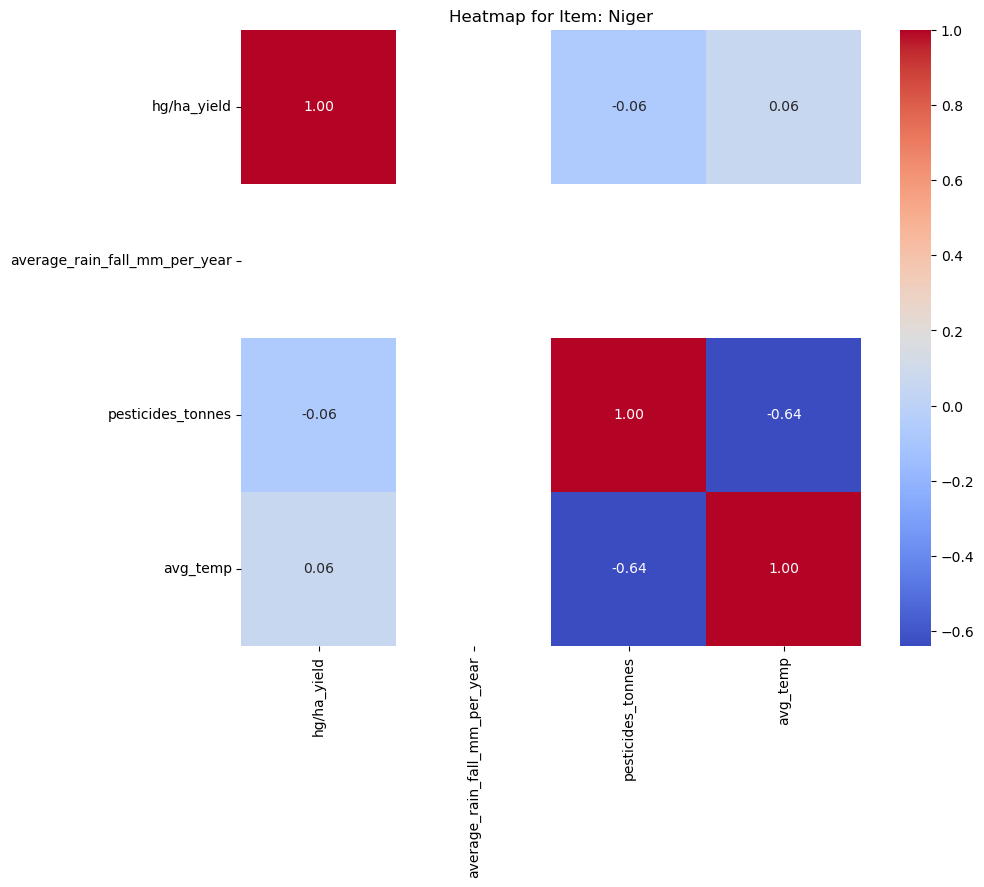

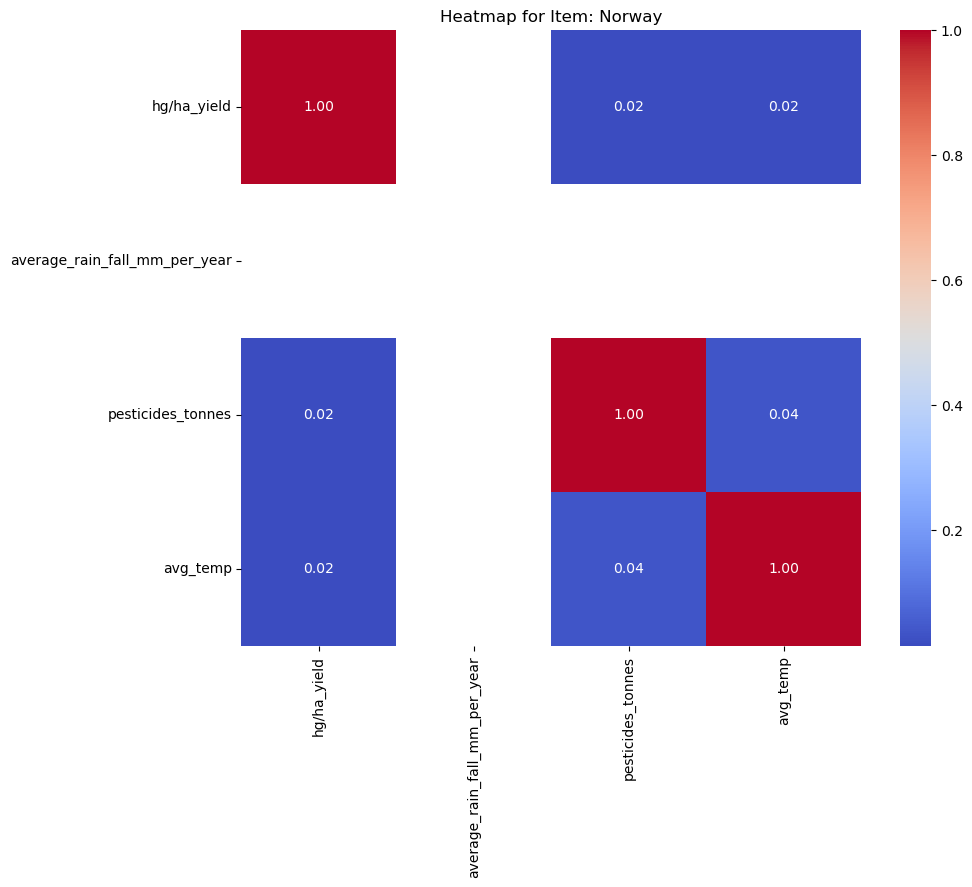

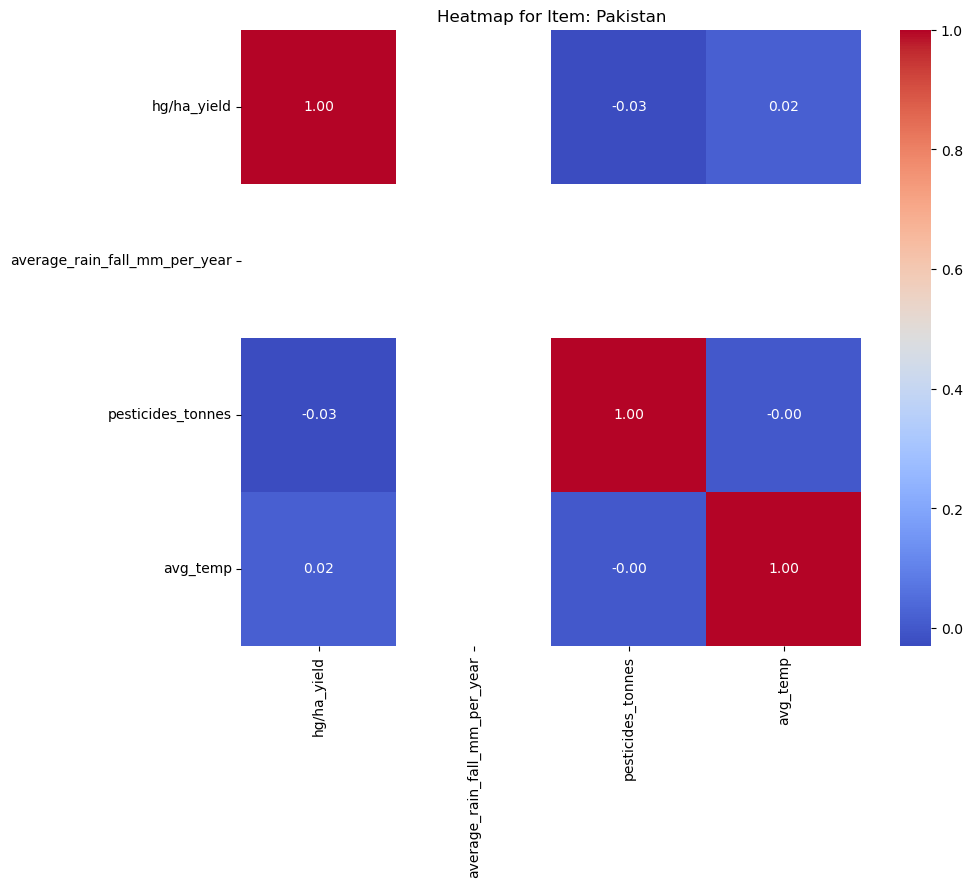

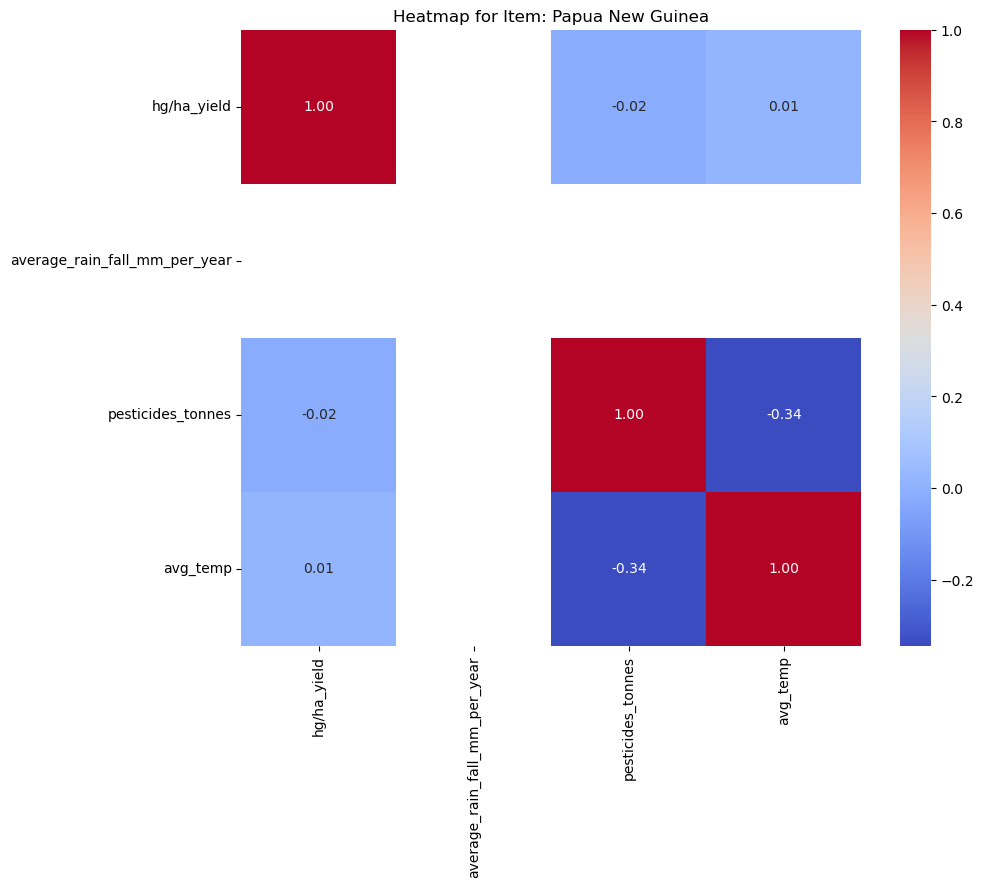

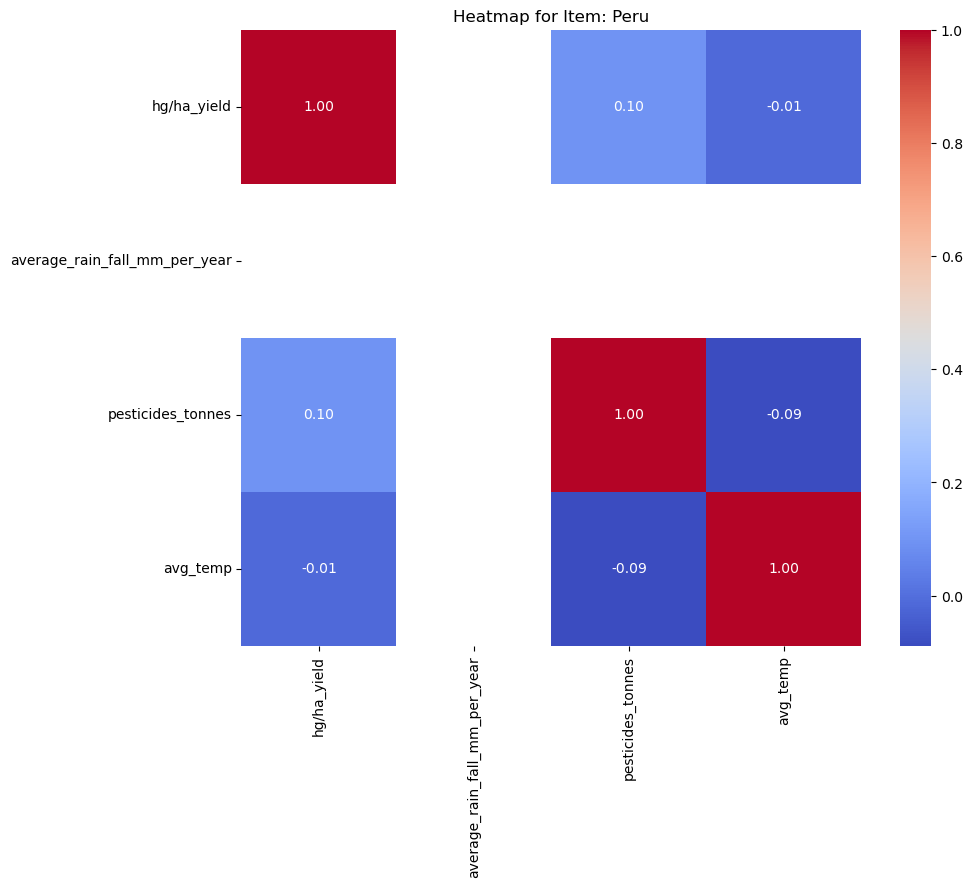

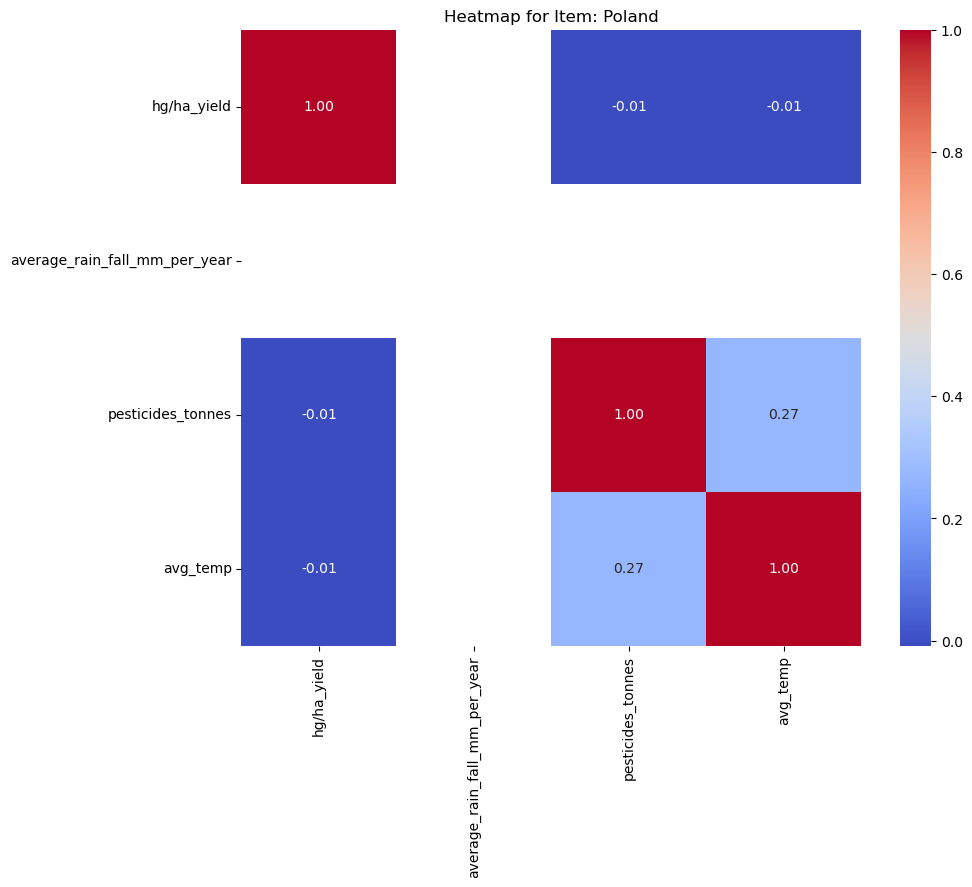

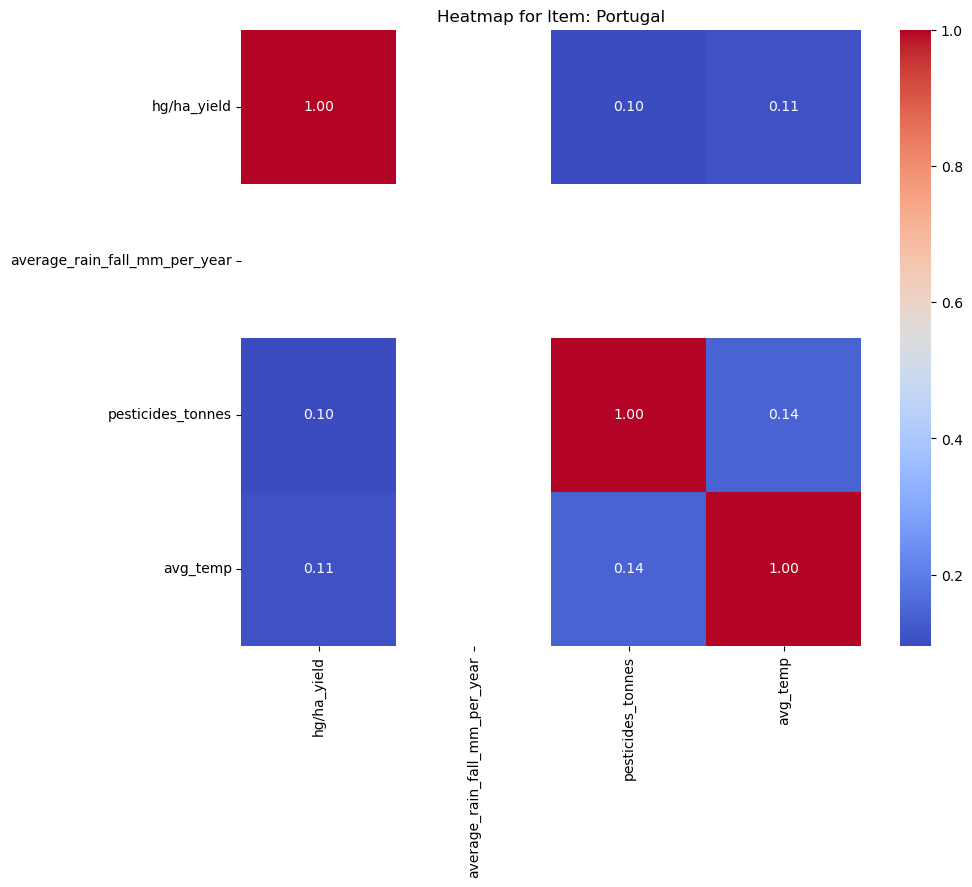

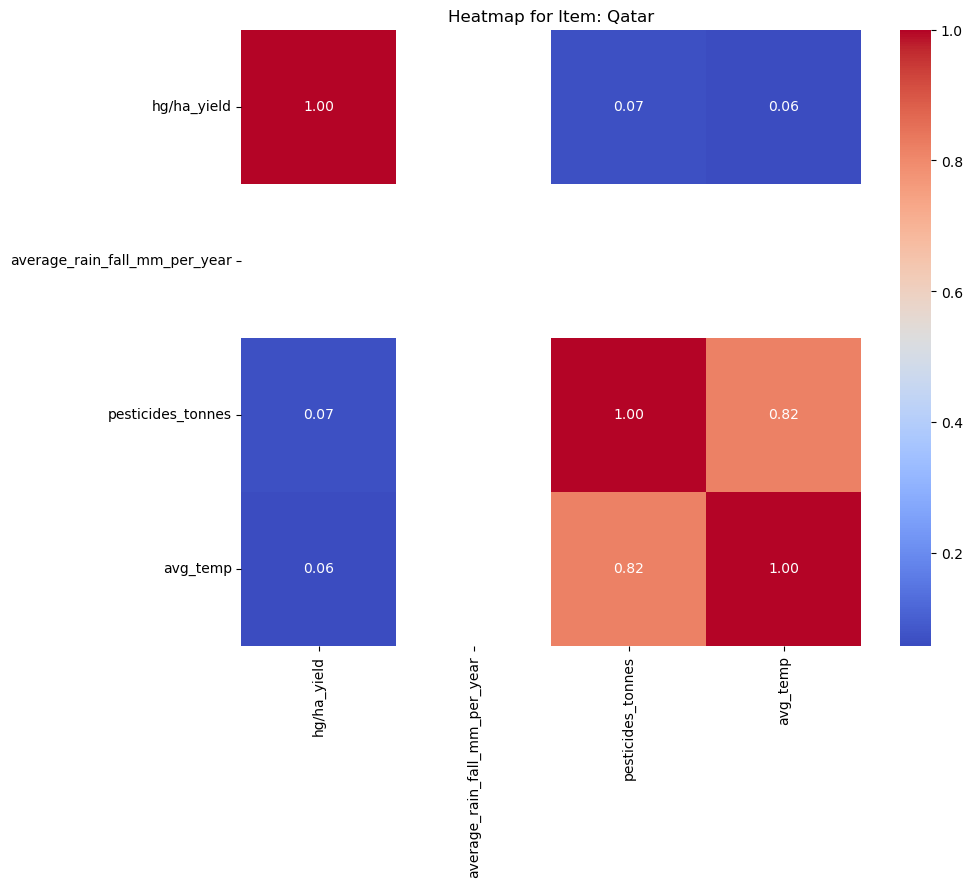

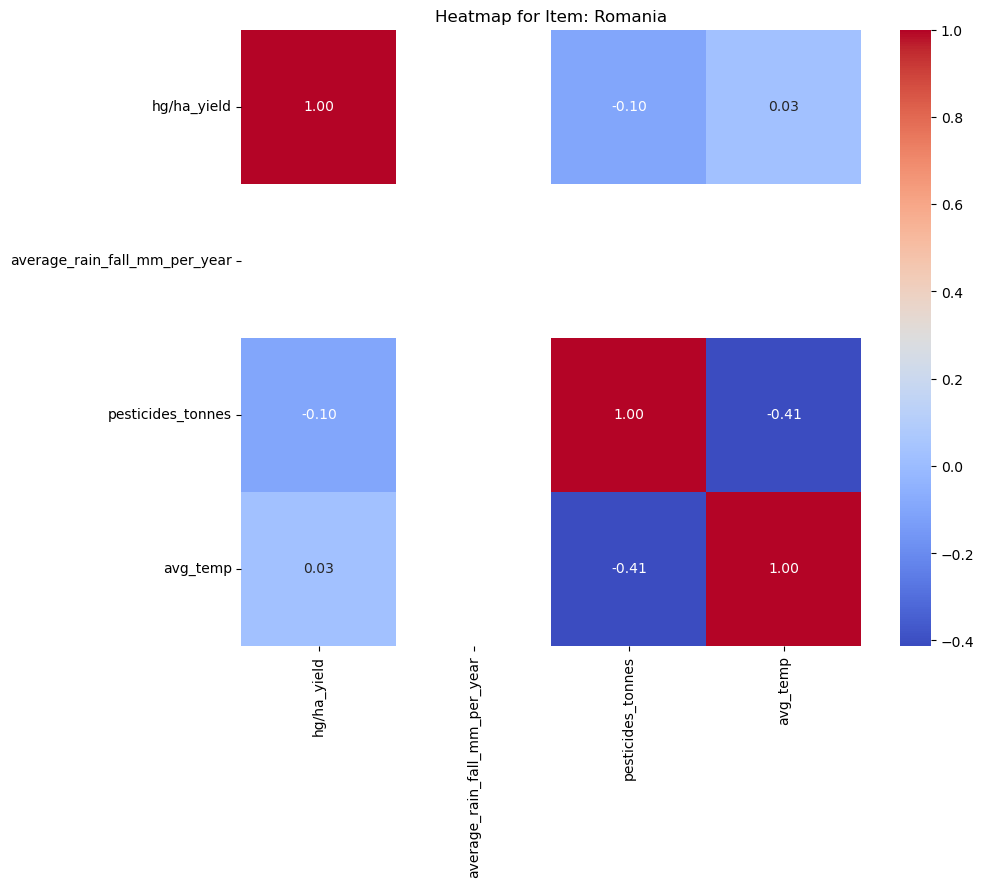

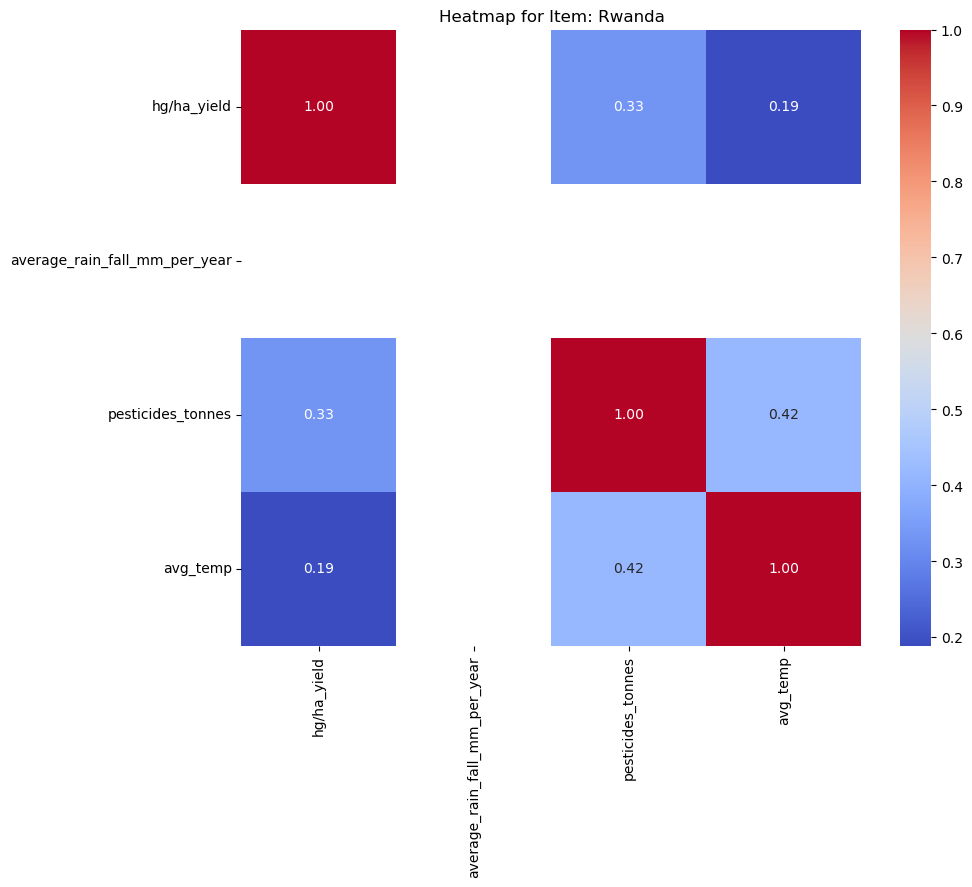

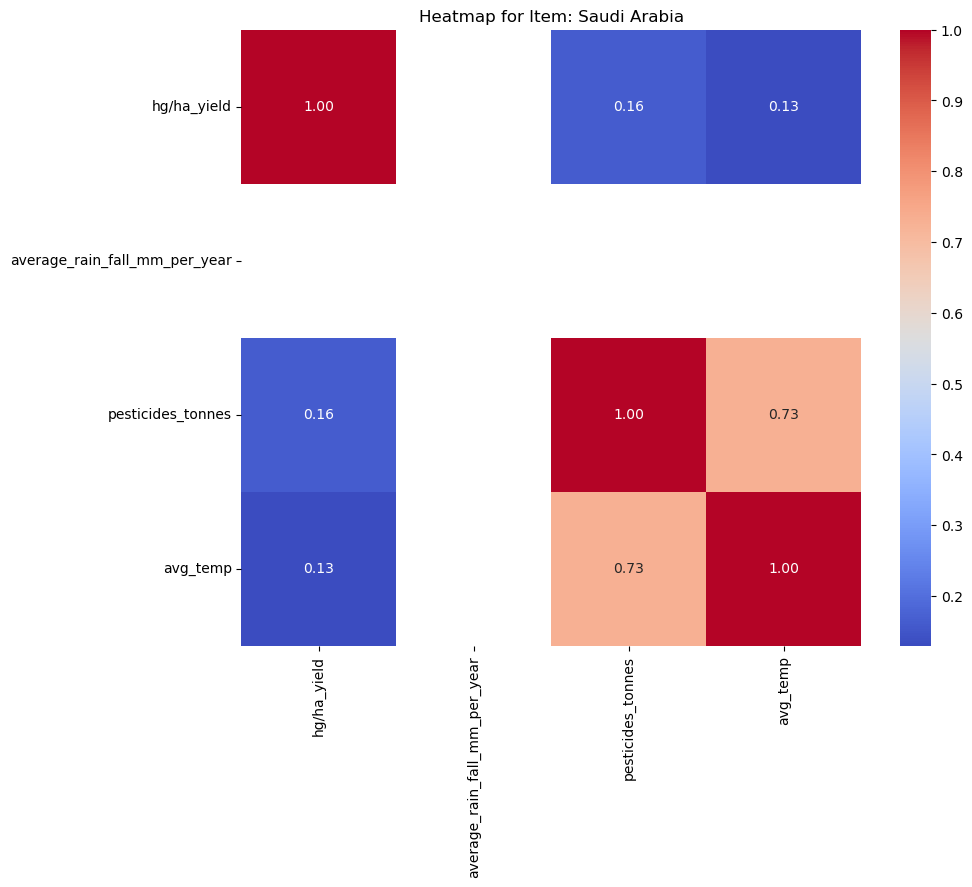

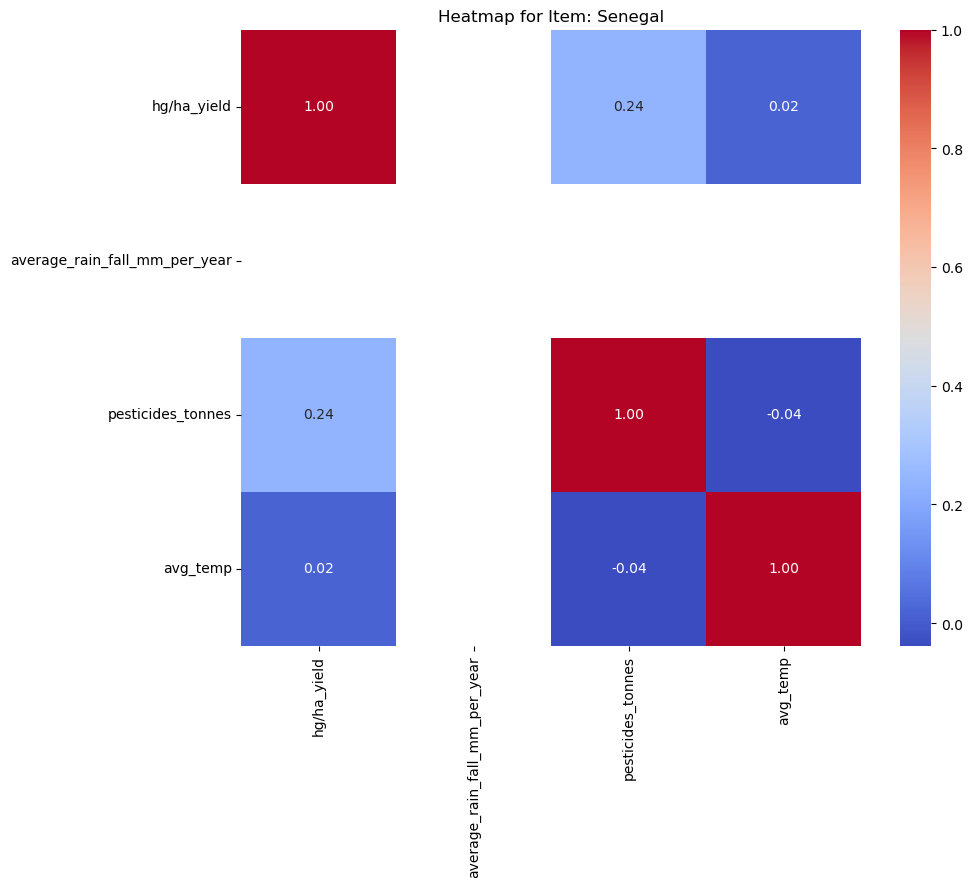

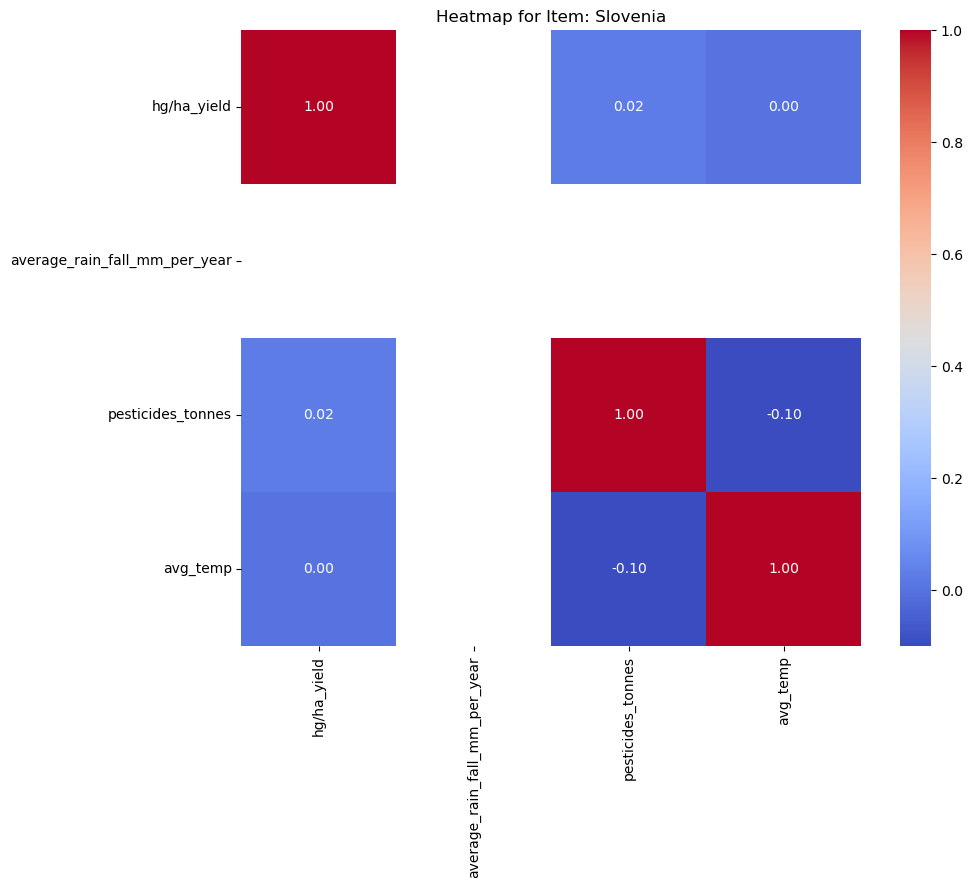

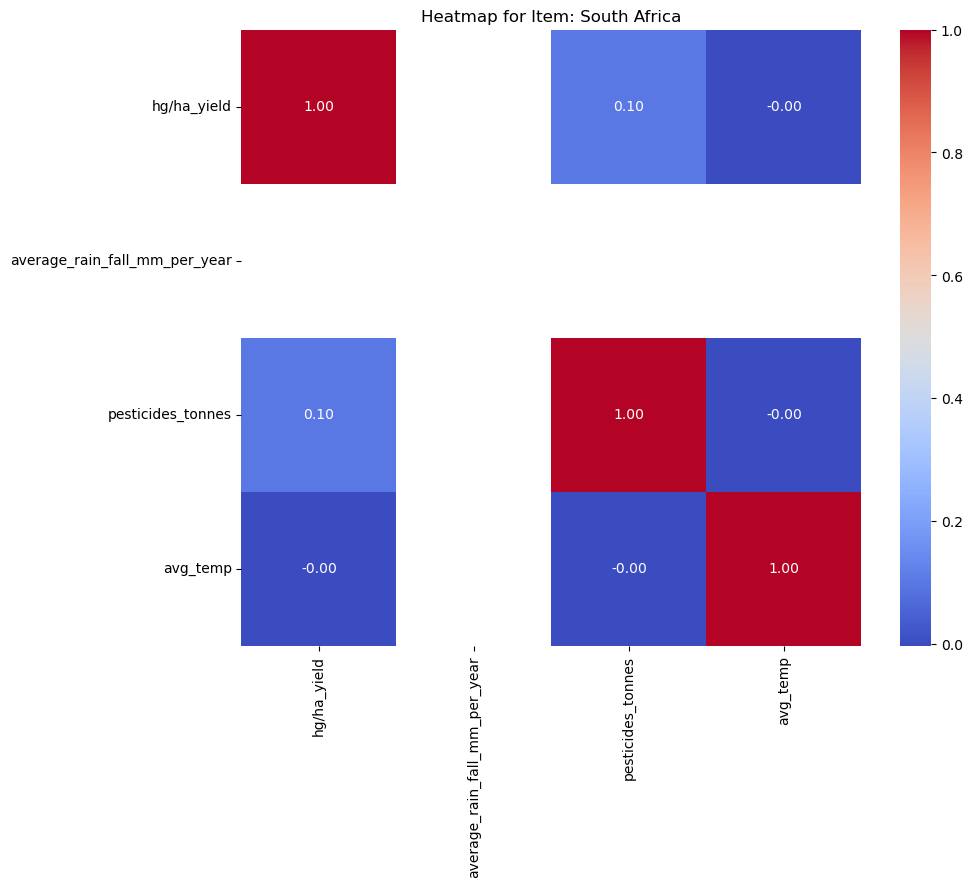

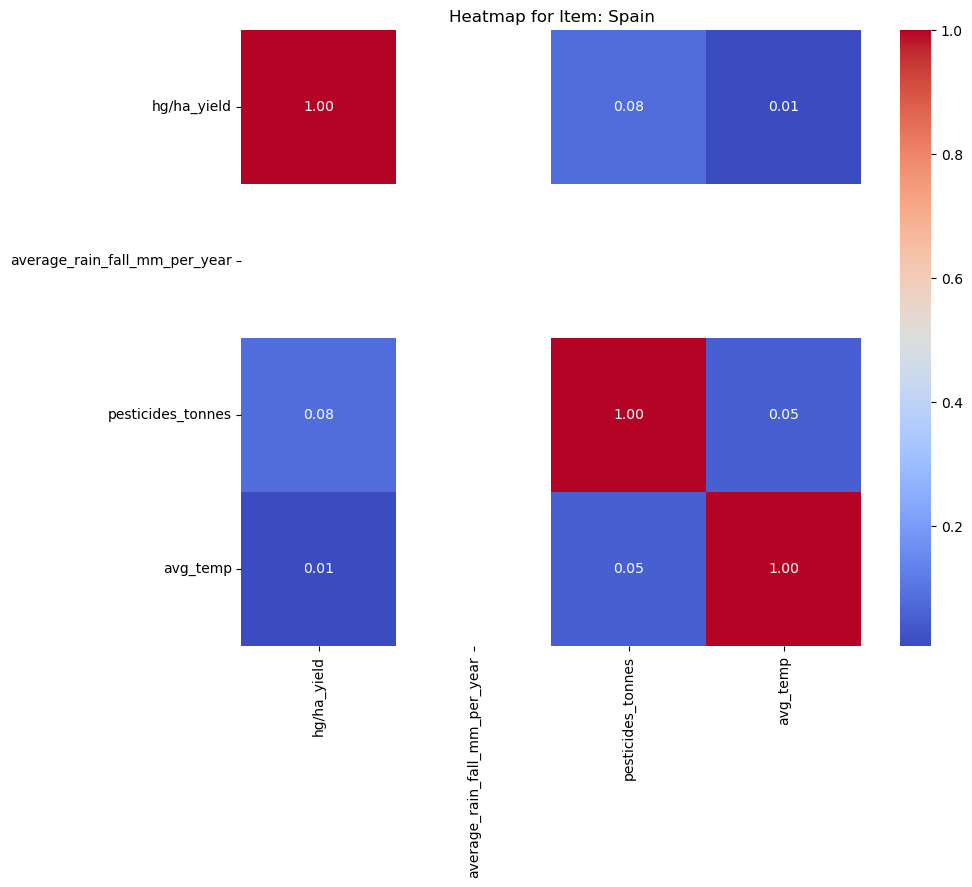

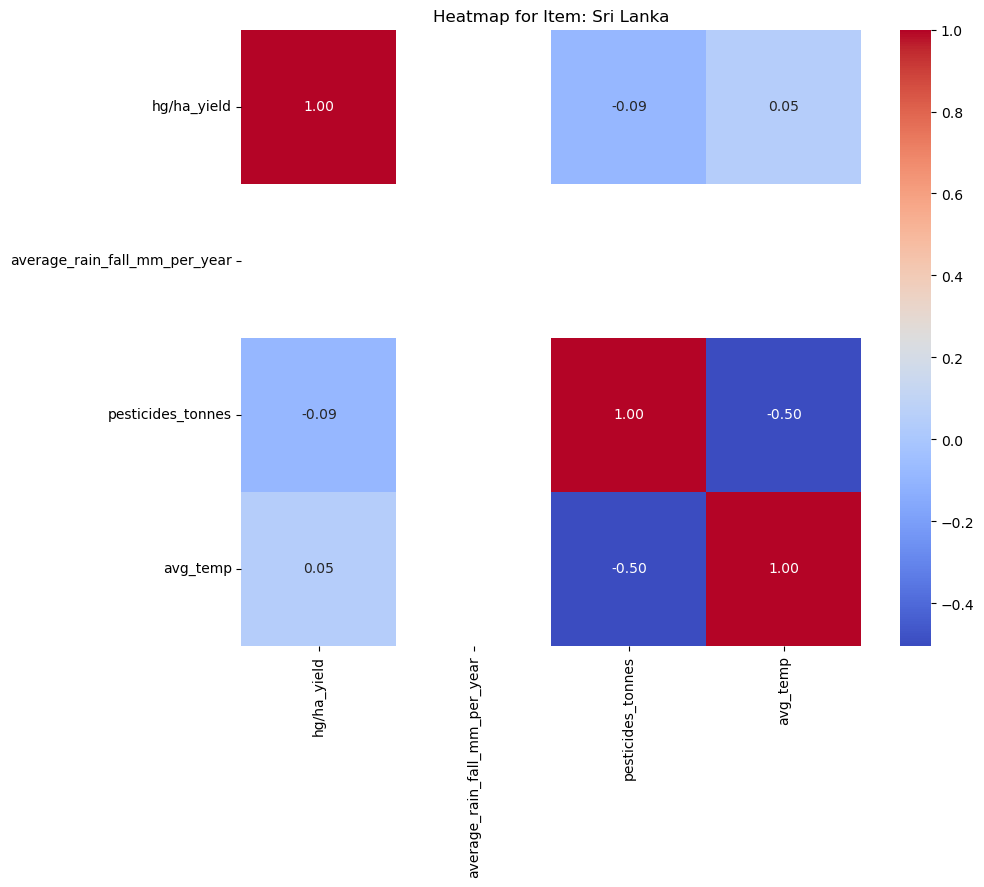

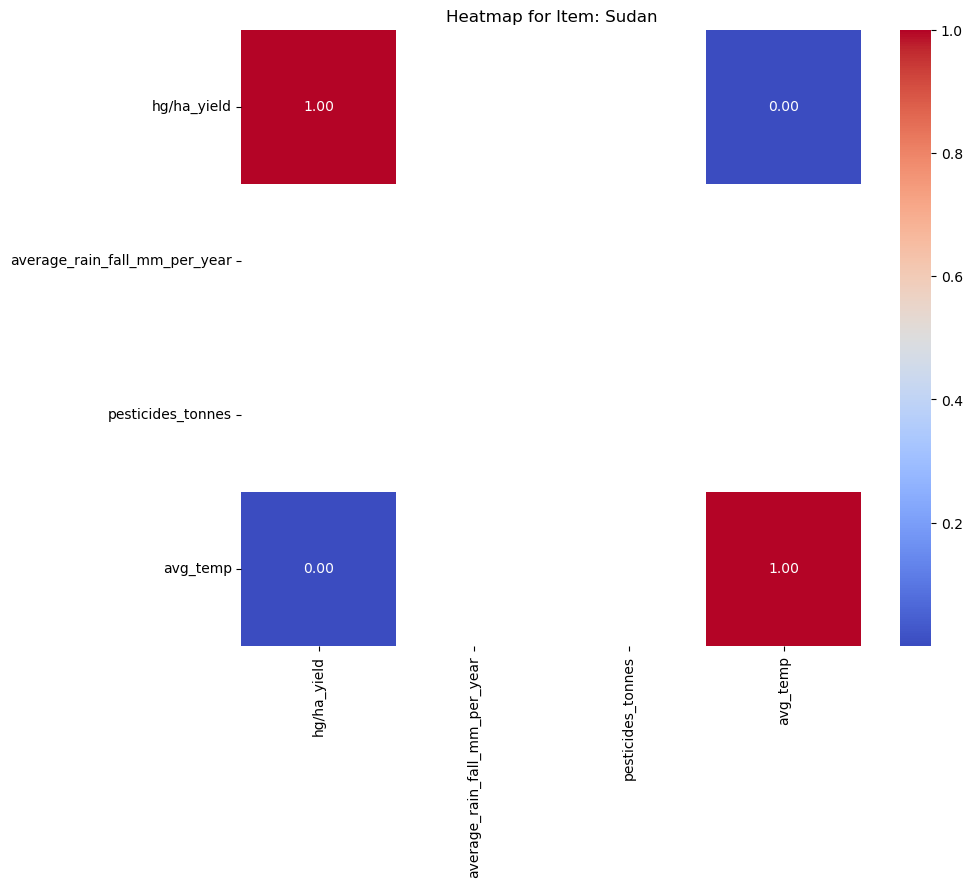

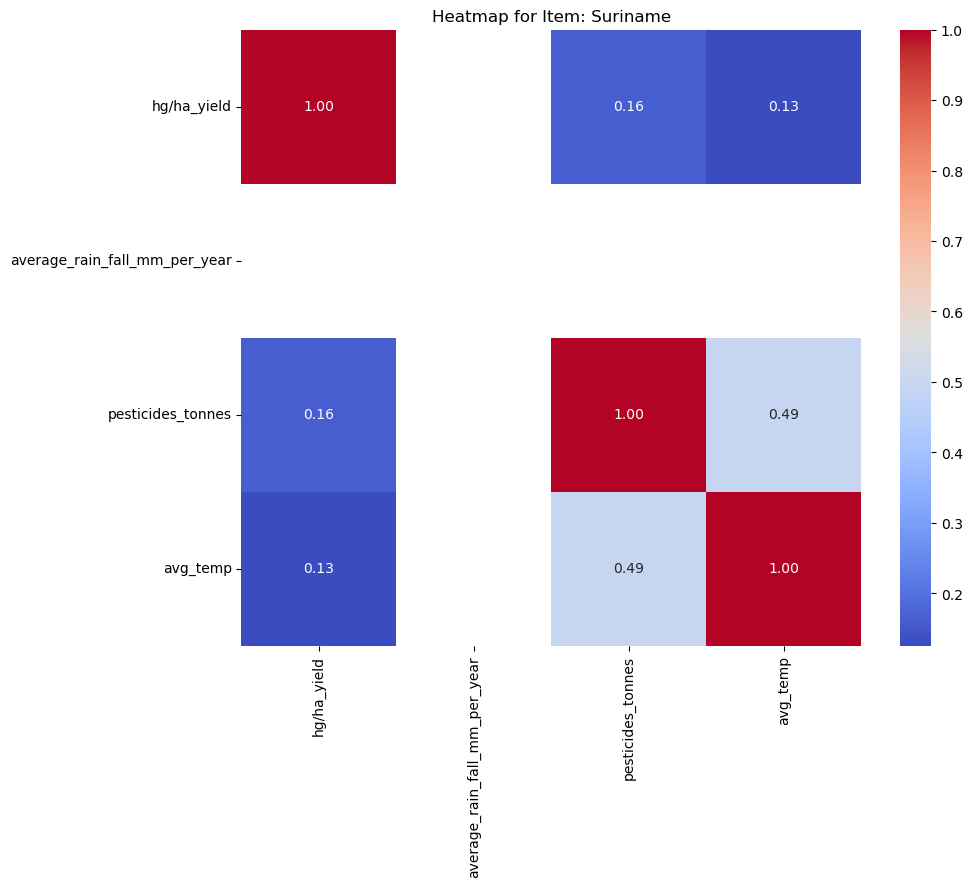

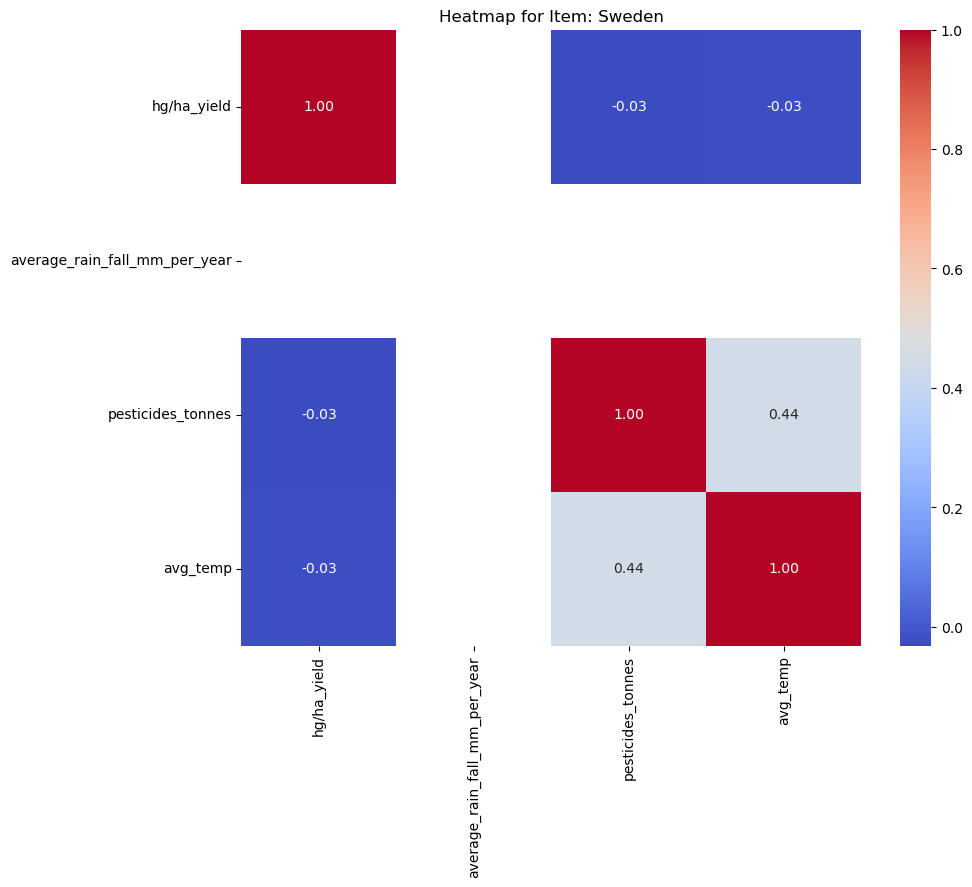

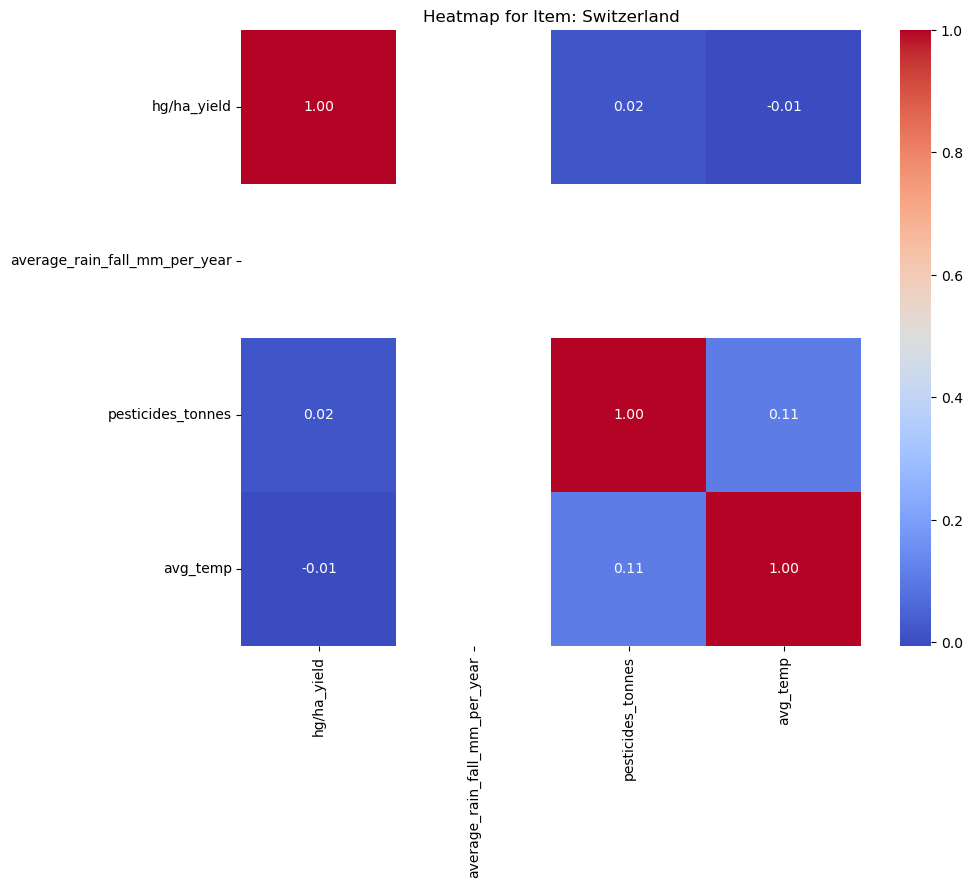

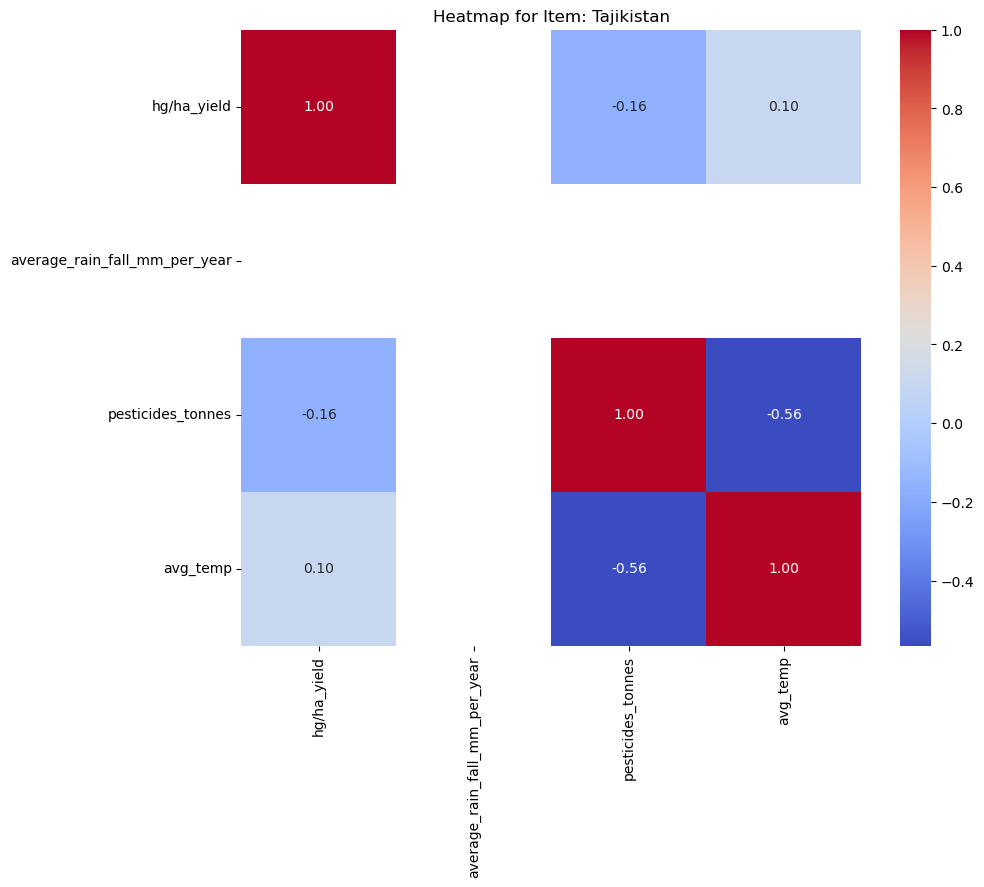

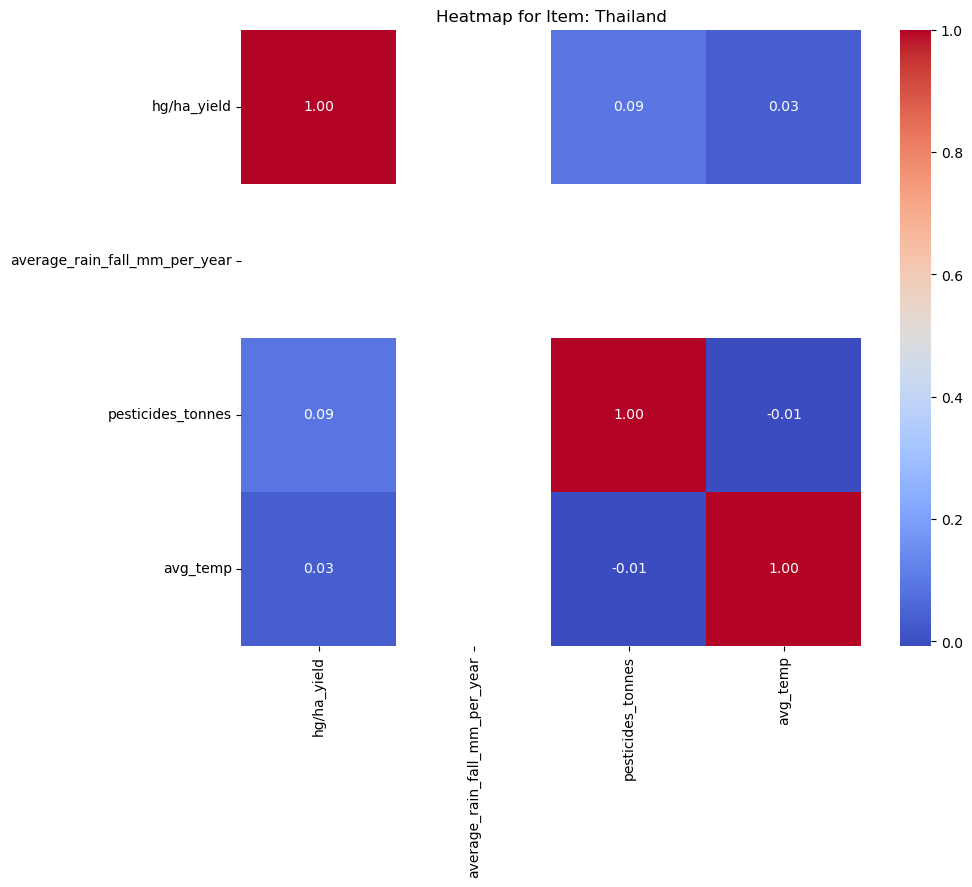

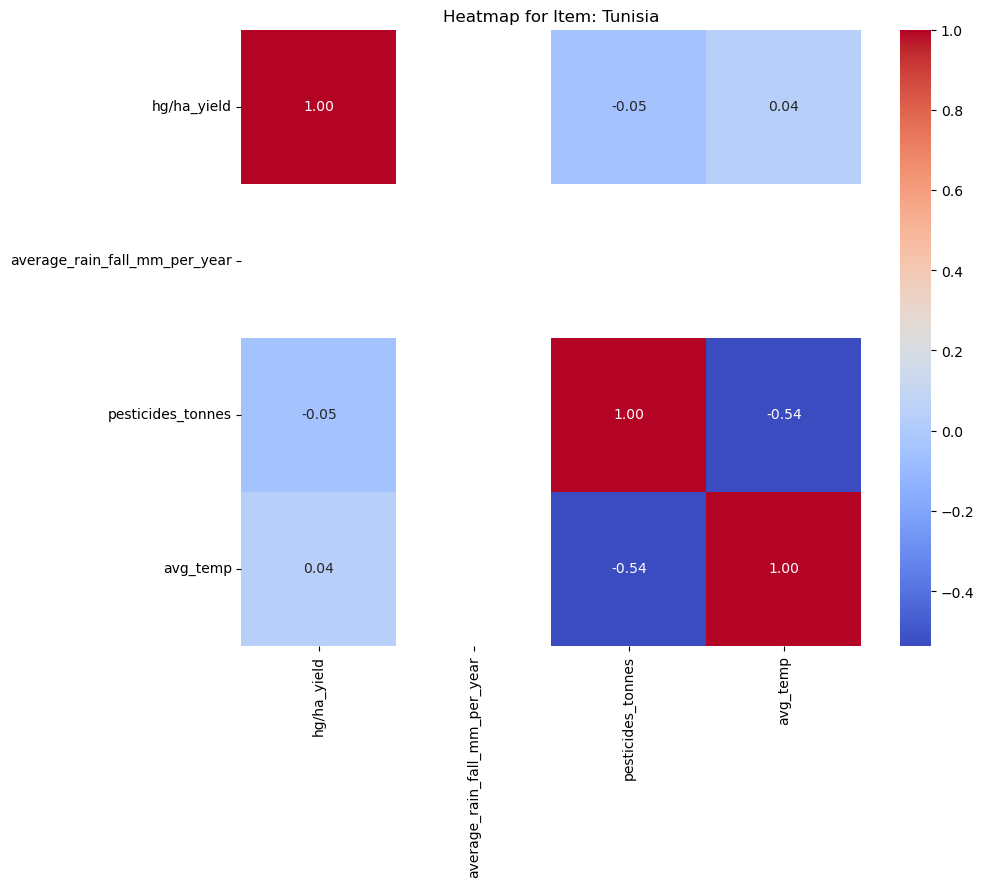

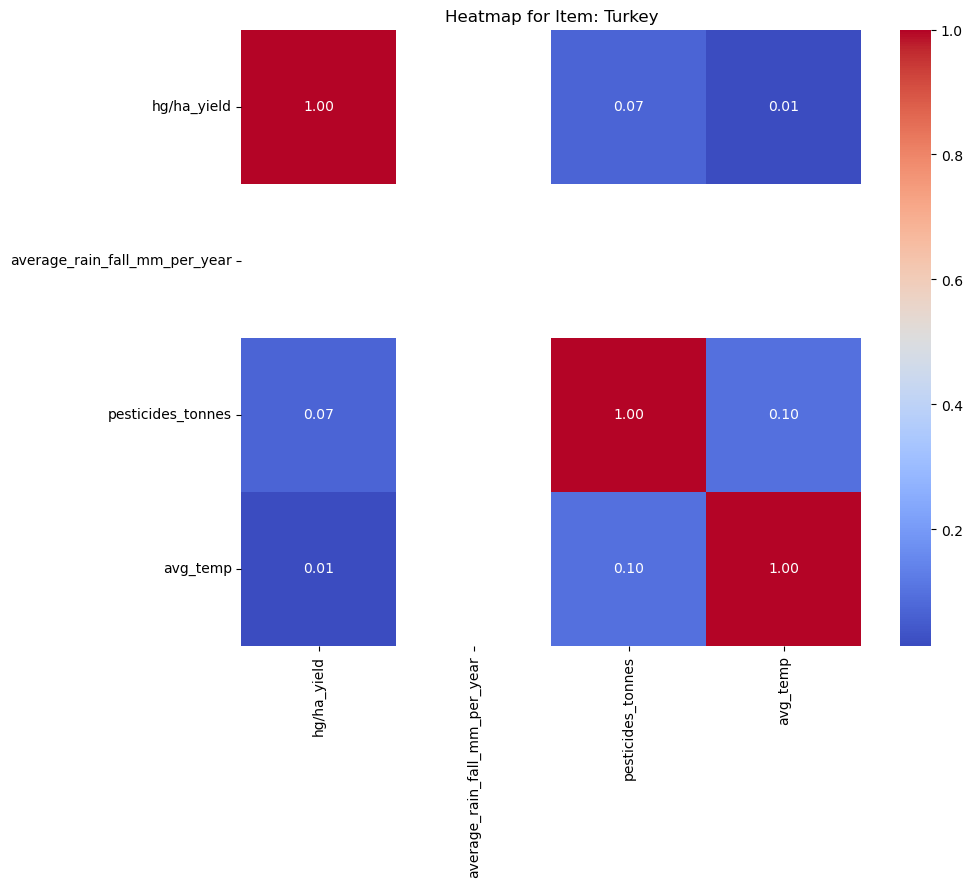

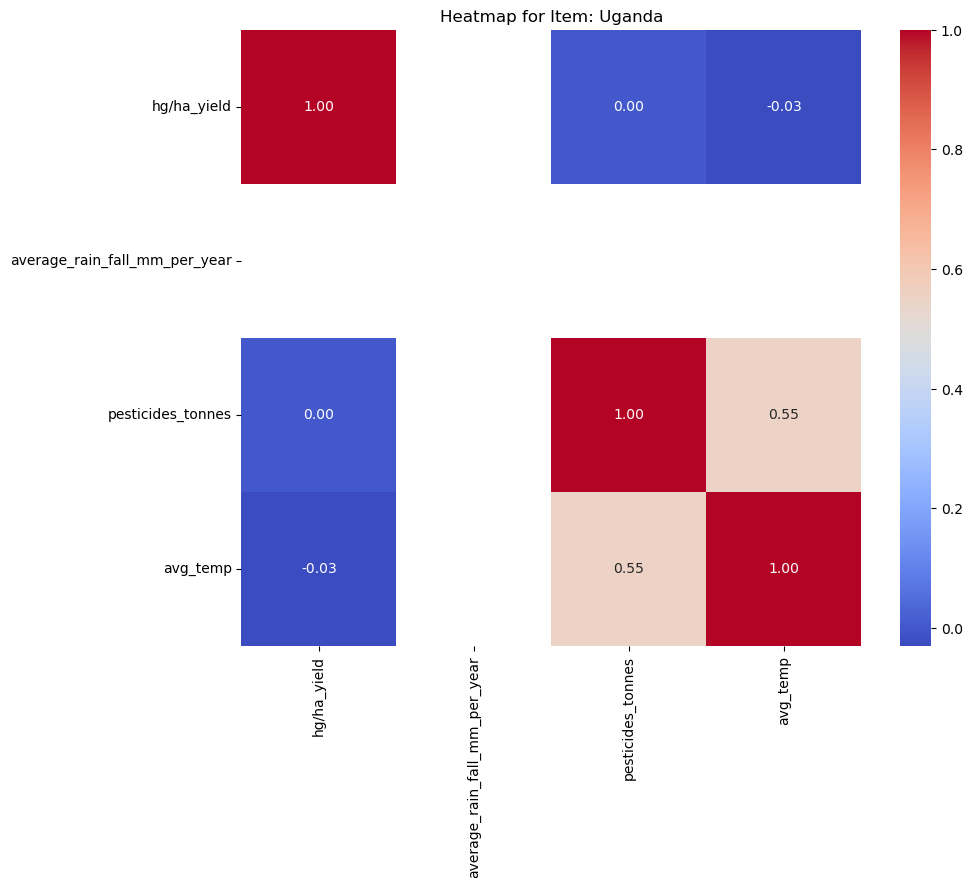

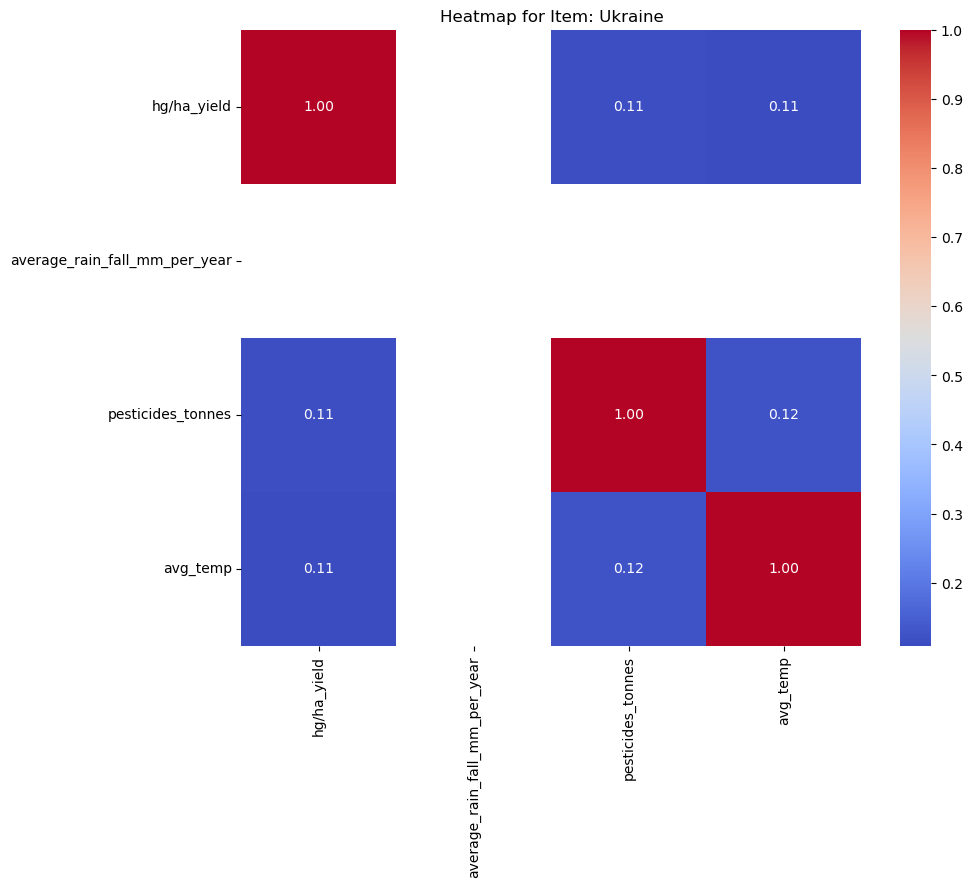

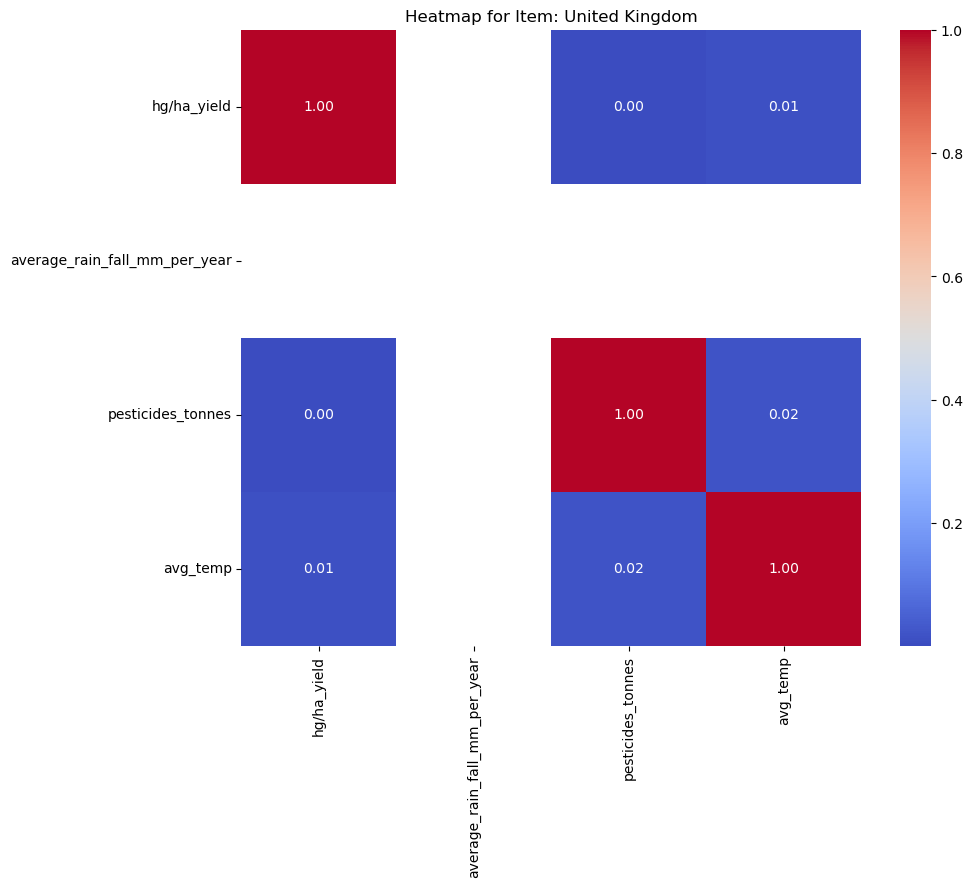

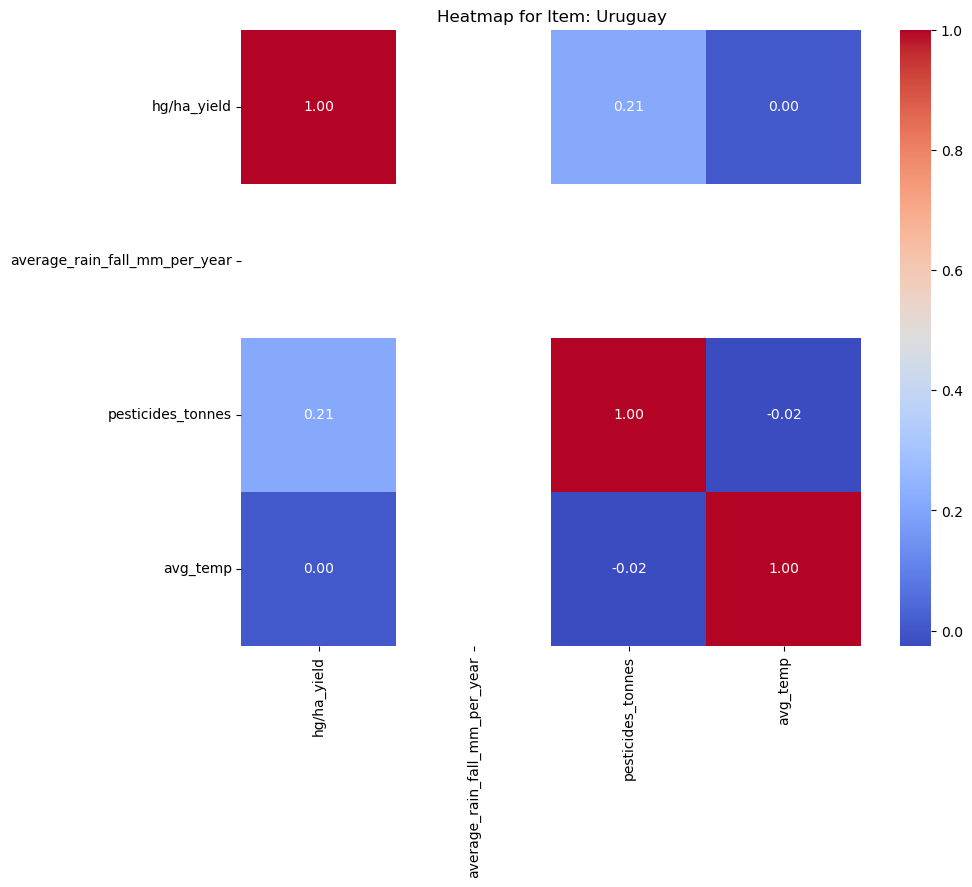

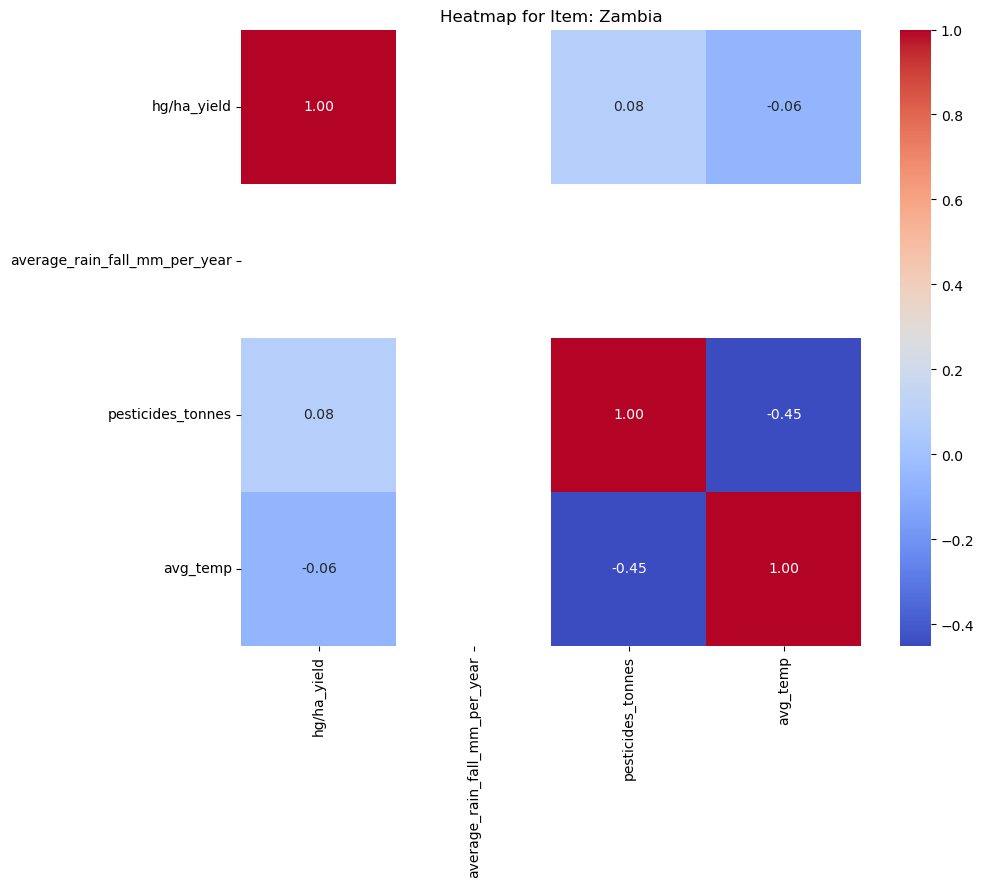

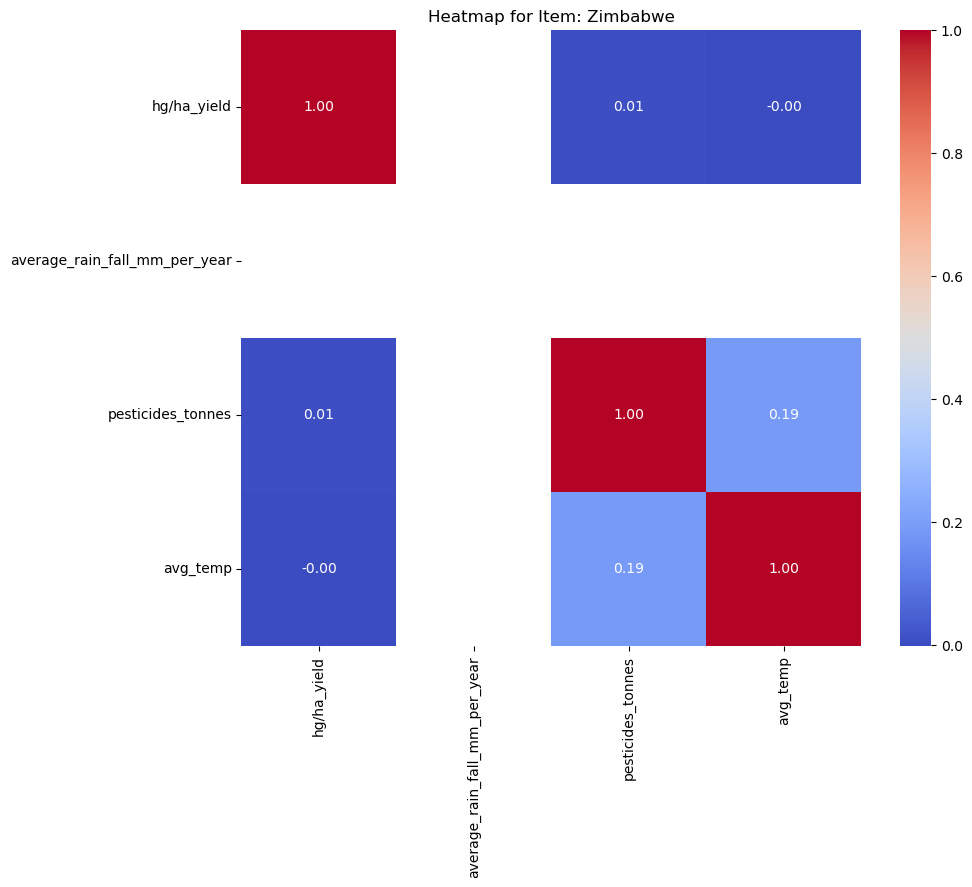

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each unique item in the 'Item' column
for item in df['Area'].unique():
    # Filter the dataframe for the current item
    df_item = df[df['Area'] == item].iloc[:, 4:]
    
    # Calculate the correlation matrix for the subset of the data
    correlation_matrix = df_item.corr()
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f"Heatmap for Item: {item}")
    plt.show()


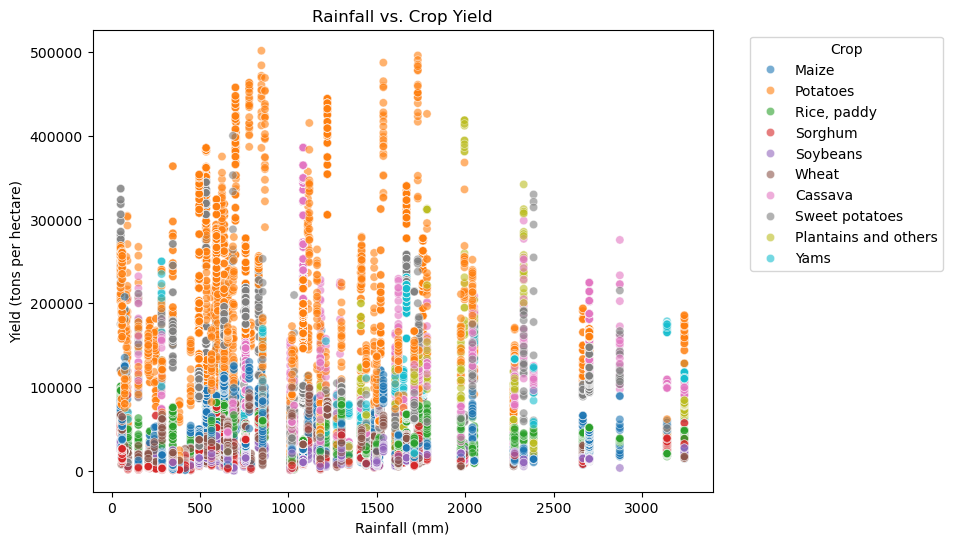

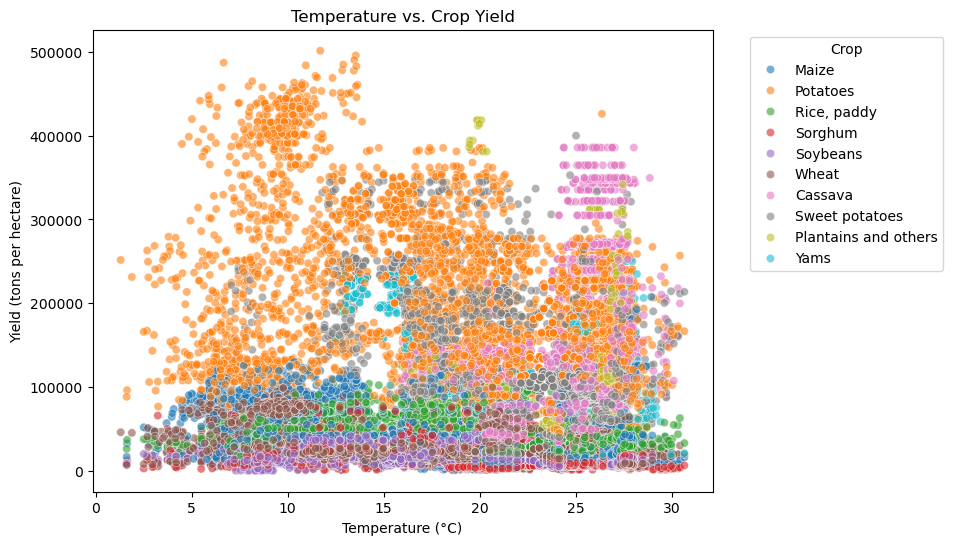

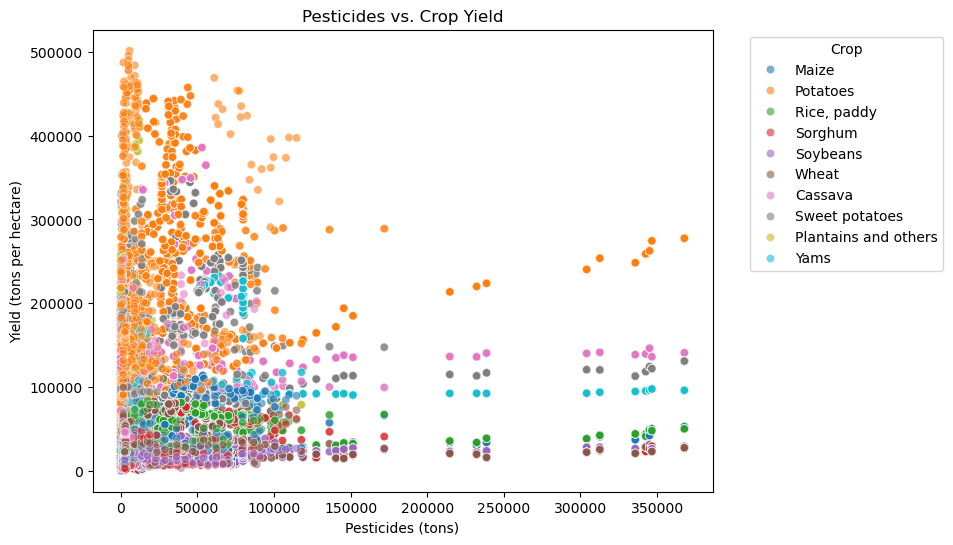

In [5]:
# Scatter plot: Rainfall vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item', alpha=0.6)
plt.title('Rainfall vs. Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot: Temperature vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_temp', y='hg/ha_yield', hue='Item', alpha=0.6)
plt.title('Temperature vs. Crop Yield')
plt.xlabel('Temperature (°C)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot: Pesticides vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield', hue='Item', alpha=0.6)
plt.title('Pesticides vs. Crop Yield')
plt.xlabel('Pesticides (tons)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Auto ML with AutoGluon

In [15]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Load the original dataset
df_original = pd.read_csv("./dataset-2/yield_df.csv") 
# Split into train and test sets
train_data, test_data = train_test_split(df_original, test_size=0.2, random_state=42)

# Train the AutoGluon model on the full dataset
predictor_full = TabularPredictor(label='hg/ha_yield').fit(train_data)

# Evaluate the model
performance_full = predictor_full.evaluate(test_data)

# Print performance metrics
print("Model Performance (Full Dataset):", performance_full)


No path specified. Models will be saved in: "AutogluonModels\ag-20250123_042710"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          32
Memory Avail:       16.98 GB / 31.77 GB (53.5%)
Disk Space Avail:   292.62 GB / 1862.20 GB (15.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'      

[1000]	valid_set's rmse: 11346.7
[2000]	valid_set's rmse: 10183.4
[3000]	valid_set's rmse: 9762.65
[4000]	valid_set's rmse: 9553.24
[5000]	valid_set's rmse: 9423.3
[6000]	valid_set's rmse: 9366.78
[7000]	valid_set's rmse: 9309.72
[8000]	valid_set's rmse: 9266.64
[9000]	valid_set's rmse: 9242.55
[10000]	valid_set's rmse: 9217.09


	-9216.7923	 = Validation score   (-root_mean_squared_error)
	7.69s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 10206.4
[2000]	valid_set's rmse: 9768.71
[3000]	valid_set's rmse: 9550.23
[4000]	valid_set's rmse: 9406.58
[5000]	valid_set's rmse: 9327.42
[6000]	valid_set's rmse: 9283.47
[7000]	valid_set's rmse: 9237.76
[8000]	valid_set's rmse: 9205
[9000]	valid_set's rmse: 9185.18
[10000]	valid_set's rmse: 9170.32


	-9169.8105	 = Validation score   (-root_mean_squared_error)
	5.42s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-10754.8032	 = Validation score   (-root_mean_squared_error)
	0.94s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-11012.958	 = Validation score   (-root_mean_squared_error)
	255.61s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-9320.1626	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-12204.3346	 = Validation score   (-root_mean_squared_error)
	14.59s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-10036.1777	 = Validation score   (-root_mean_squared_error)
	11.99s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-11570.0398	 = Validation score   (-root_mean_squared_error)
	112.91s	 = Training   ru

[1000]	valid_set's rmse: 9583.36
[2000]	valid_set's rmse: 9351.42
[3000]	valid_set's rmse: 9303.73
[4000]	valid_set's rmse: 9264.29
[5000]	valid_set's rmse: 9243.4
[6000]	valid_set's rmse: 9230.75
[7000]	valid_set's rmse: 9226.04
[8000]	valid_set's rmse: 9221.9
[9000]	valid_set's rmse: 9216.94
[10000]	valid_set's rmse: 9214.29


	-9214.2861	 = Validation score   (-root_mean_squared_error)
	17.21s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.333, 'LightGBM': 0.278, 'NeuralNetTorch': 0.167, 'ExtraTreesMSE': 0.111, 'RandomForestMSE': 0.056, 'XGBoost': 0.056}
	-8752.2567	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 432.14s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 5706.7 rows/s (2260 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("C:\Users\Gregor\iCloudDrive\Bildung\Data Science\AutogluonModels\ag-20250123_042710")


Model Performance (Full Dataset): {'root_mean_squared_error': -8338.14653340368, 'mean_squared_error': -69524687.61251181, 'mean_absolute_error': -3591.364314666278, 'r2': 0.9904152154922485, 'pearsonr': 0.9952494105215144, 'median_absolute_error': -1335.046875}


Computing feature importance via permutation shuffling for 7 features using 5000 rows with 5 shuffle sets...
	74.15s	= Expected runtime (14.83s per shuffle set)
	33.25s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance (Full Dataset):
                                   importance       stddev       p_value  n  \
Item                           100011.150059  1029.183201  1.345541e-09  5   
Area                            42133.766123   906.803441  2.573028e-08  5   
Year                            13321.824283   352.325931  5.865431e-08  5   
pesticides_tonnes                7421.846696   217.628377  8.861305e-08  5   
average_rain_fall_mm_per_year    7149.668630    90.862991  3.129624e-09  5   
avg_temp                         7110.476102   369.755164  8.743378e-07  5   
Unnamed: 0                       5850.247940   269.540734  5.392046e-07  5   

                                    p99_high       p99_low  
Item                           102130.252495  97892.047622  
Area                            44000.886941  40266.645306  
Year                            14047.268245  12596.380321  
pesticides_tonnes                7869.946532   6973.746859  
average_rain_fall_mm_per_year    7

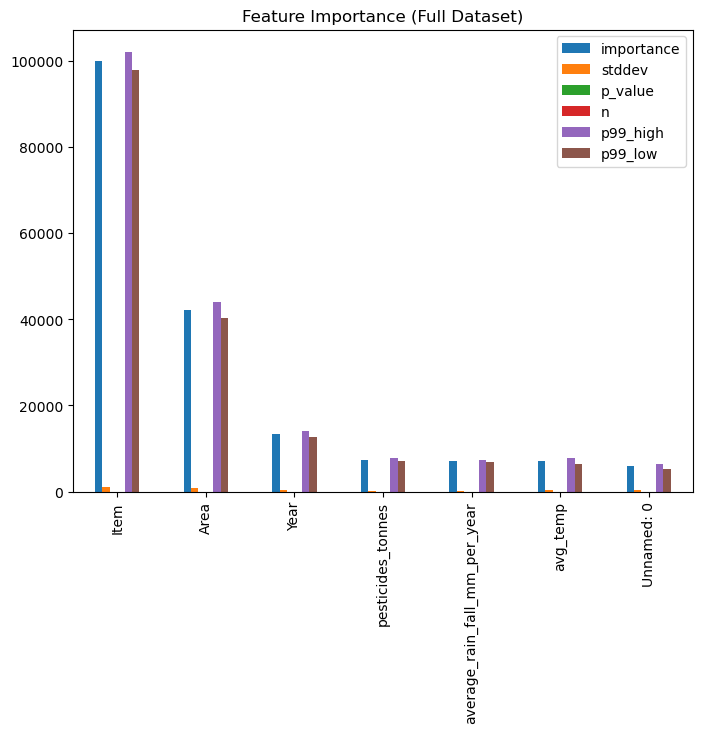

In [16]:
# Feature importance for the full dataset
feature_importance_full = predictor_full.feature_importance(test_data)
print("Feature Importance (Full Dataset):\n", feature_importance_full)

# Plot feature importance
feature_importance_full.plot(kind='bar', figsize=(8, 6), title="Feature Importance (Full Dataset)")
plt.show()


In [23]:
# View the leaderboard for the Custom HPO Model
leaderboard_full = predictor_full.leaderboard(test_data, silent=True)
print(leaderboard_full)

# Get the name of the best model
best_model_full = predictor_full.model_best
print("Best Model (Full):", best_model_full)

# Retrieve details of the best model
best_model_full_details = predictor_full.info()['model_info'][best_model_full]
print("Best Model Details (Full):\n", best_model_full_details)

                  model    score_test     score_val              eval_metric  \
0   WeightedEnsemble_L2  -8338.146533  -8752.256682  root_mean_squared_error   
1              LightGBM  -8551.567180  -9169.810478  root_mean_squared_error   
2         ExtraTreesMSE  -8647.712500  -9320.162612  root_mean_squared_error   
3            LightGBMXT  -8685.626162  -9216.792321  root_mean_squared_error   
4               XGBoost  -8837.404370 -10036.177726  root_mean_squared_error   
5         LightGBMLarge  -8953.664353  -9214.286129  root_mean_squared_error   
6       RandomForestMSE  -9841.920757 -10754.803185  root_mean_squared_error   
7              CatBoost -10146.334341 -11012.957976  root_mean_squared_error   
8        NeuralNetTorch -11380.378007 -11570.039787  root_mean_squared_error   
9       NeuralNetFastAI -12419.101042 -12204.334647  root_mean_squared_error   
10       KNeighborsUnif -67233.164932 -65653.956093  root_mean_squared_error   
11       KNeighborsDist -69381.945947 -6

In [17]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Load the original dataset
df_original = pd.read_csv("./dataset-2/yield_df.csv")

# Drop 'Year' and 'Unnamed: 0' columns
df_filtered = df_original.drop(columns=['Year', 'Unnamed: 0'])

# Split into train and test sets
train_data_filtered, test_data_filtered = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Train the AutoGluon model on the filtered dataset
predictor_filtered = TabularPredictor(label='hg/ha_yield').fit(train_data_filtered)

# Evaluate the model
performance_filtered = predictor_filtered.evaluate(test_data_filtered)

# Print performance metrics
print("Model Performance (Filtered Dataset):", performance_filtered)


No path specified. Models will be saved in: "AutogluonModels\ag-20250123_045122"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          32
Memory Avail:       15.75 GB / 31.77 GB (49.6%)
Disk Space Avail:   291.21 GB / 1862.20 GB (15.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'      

[1000]	valid_set's rmse: 16692.3
[2000]	valid_set's rmse: 15720.2
[3000]	valid_set's rmse: 15177.4
[4000]	valid_set's rmse: 14786.6
[5000]	valid_set's rmse: 14546.7
[6000]	valid_set's rmse: 14388.1
[7000]	valid_set's rmse: 14245
[8000]	valid_set's rmse: 14124.5
[9000]	valid_set's rmse: 14034.1
[10000]	valid_set's rmse: 13960.8


	-13960.8092	 = Validation score   (-root_mean_squared_error)
	6.72s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 13725.8
[2000]	valid_set's rmse: 13512.6
[3000]	valid_set's rmse: 13497.8


	-13485.5302	 = Validation score   (-root_mean_squared_error)
	1.73s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-13960.7492	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-14538.6862	 = Validation score   (-root_mean_squared_error)
	280.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-13870.6562	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-18890.194	 = Validation score   (-root_mean_squared_error)
	14.22s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-14159.8707	 = Validation score   (-root_mean_squared_error)
	2.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-15303.1407	 = Validation score   (-root_mean_squared_error)
	451.34s	 = Training   r

Model Performance (Filtered Dataset): {'root_mean_squared_error': -13505.66621418797, 'mean_squared_error': -182403019.8890584, 'mean_absolute_error': -6060.614850228435, 'r2': 0.9748536944389343, 'pearsonr': 0.9873797695079257, 'median_absolute_error': -2213.66015625}


Computing feature importance via permutation shuffling for 5 features using 5000 rows with 5 shuffle sets...
	14.79s	= Expected runtime (2.96s per shuffle set)
	6.4s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance (Filtered Dataset):
                                   importance       stddev       p_value  n  \
Item                           100011.150059  1029.183201  1.345541e-09  5   
Area                            42133.766123   906.803441  2.573028e-08  5   
Year                            13321.824283   352.325931  5.865431e-08  5   
pesticides_tonnes                7421.846696   217.628377  8.861305e-08  5   
average_rain_fall_mm_per_year    7149.668630    90.862991  3.129624e-09  5   
avg_temp                         7110.476102   369.755164  8.743378e-07  5   
Unnamed: 0                       5850.247940   269.540734  5.392046e-07  5   

                                    p99_high       p99_low  
Item                           102130.252495  97892.047622  
Area                            44000.886941  40266.645306  
Year                            14047.268245  12596.380321  
pesticides_tonnes                7869.946532   6973.746859  
average_rain_fall_mm_per_year 

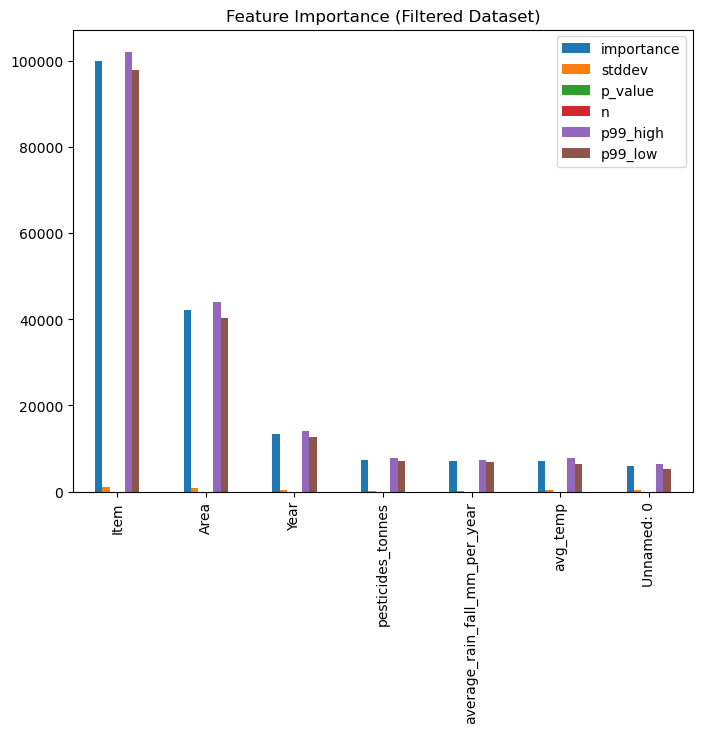

In [18]:
# Feature importance for the full dataset
feature_importance_filtered = predictor_filtered.feature_importance(test_data_filtered)
print("Feature Importance (Filtered Dataset):\n", feature_importance_full)

# Plot feature importance
feature_importance_full.plot(kind='bar', figsize=(8, 6), title="Feature Importance (Filtered Dataset)")
plt.show()

In [22]:
# View the leaderboard for the Custom HPO Model
leaderboard_filtered = predictor_filtered.leaderboard(test_data_filtered, silent=True)
print(leaderboard_filtered)

# Get the name of the best model
best_model_filtered = predictor_filtered.model_best
print("Best Model (Filtered):", best_model_filtered)

# Retrieve details of the best model
best_model_filtered_details = predictor_filtered.info()['model_info'][best_model_filtered]
print("Best Model Details (Filtered):\n", best_model_filtered_details)

                  model    score_test     score_val              eval_metric  \
0   WeightedEnsemble_L2 -13505.666214 -12894.601857  root_mean_squared_error   
1              LightGBM -13747.223339 -13485.530226  root_mean_squared_error   
2         ExtraTreesMSE -13811.370527 -13870.656166  root_mean_squared_error   
3              CatBoost -13858.982204 -14538.686241  root_mean_squared_error   
4            LightGBMXT -14094.908606 -13960.809213  root_mean_squared_error   
5         LightGBMLarge -14120.229869 -13625.734474  root_mean_squared_error   
6       RandomForestMSE -14242.952111 -13960.749175  root_mean_squared_error   
7               XGBoost -14450.964117 -14159.870657  root_mean_squared_error   
8        NeuralNetTorch -16508.218100 -15303.140717  root_mean_squared_error   
9       NeuralNetFastAI -18562.659860 -18890.194050  root_mean_squared_error   
10       KNeighborsUnif -90832.219762 -90519.450397  root_mean_squared_error   
11       KNeighborsDist -97083.009551 -9

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_predictor(predictor, test_data, label_col):
    # Make predictions
    predictions = predictor.predict(test_data)
    true_values = test_data[label_col].values
    
    # Compute metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(true_values, predictions)
    accuracy = 100 - (mae / true_values.mean()) * 100  # Example of a percentage accuracy for regression
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy (%)': accuracy
    }

# Evaluate all predictors
metrics_filtered = evaluate_predictor(predictor_filtered, test_data_filtered, 'hg/ha_yield')
metrics_full = evaluate_predictor(predictor_full, test_data, 'hg/ha_yield')

# Display results
import pandas as pd
metrics_df = pd.DataFrame({
    'Selected Features Model': metrics_filtered,
    'Full Dataset Model': metrics_full,
})

# Display metrics table
print(metrics_df)


              Selected Features Model  Full Dataset Model
MAE                      6.060615e+03        3.591364e+03
MSE                      1.824030e+08        6.952469e+07
RMSE                     1.350567e+04        8.338147e+03
R²                       9.748537e-01        9.904152e-01
Accuracy (%)             9.213539e+01        9.533964e+01
